In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, root_mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("populations-sorted.csv")
columns = ["Region, subregion, country or area *", "Year", "Type", "Total Population, as of 1 January (thousands)", "Total Population, as of 1 July (thousands)", "Male Population, as of 1 July (thousands)", "Female Population, as of 1 July (thousands)", "Median Age, as of 1 July (years)", "Population Change (thousands)", "Births (thousands)","Total Fertility Rate (live births per woman)", "Population Density, as of 1 July (persons per square km)", "Parent code", "Under-Five Mortality (deaths under age 5 per 1,000 live births)","Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)","Net Number of Migrants (thousands)","Live Births Surviving to Age 1 (thousands)","Life Expectancy at Age 80, both sexes (years)","Total Deaths (thousands)","Life Expectancy at Birth, both sexes (years)","Sex Ratio at Birth (males per 100 female births)","Net Reproduction Rate (surviving daughters per woman)","Rate of Natural Change (per 1,000 population)","Population Growth Rate (percentage)","Births by women aged 15 to 19 (thousands)","Crude Birth Rate (births per 1,000 population)"]
data = data[columns]
heatmap_data = data
world_data = data[ data["Type"] == "World"]
region_data = data[data["Type"] == "SDG region"]
data = data[data["Type"] == "Country/Area"]
# data = data[data["Region, subregion, country or area *"] == "Azerbaijan"]
data = data.dropna()

C:\Users\justi\AppData\Local\Temp\ipykernel_30860\1107871778.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("populations-sorted.csv")


In [3]:
# numerical_columns = [
#     "Year", "Total Population, as of 1 January (thousands)", 
#     "Total Population, as of 1 July (thousands)", "Male Population, as of 1 July (thousands)", 
#     "Female Population, as of 1 July (thousands)", "Median Age, as of 1 July (years)", 
#     "Population Change (thousands)", "Births (thousands)", 
#     "Total Fertility Rate (live births per woman)", 
#     "Population Density, as of 1 July (persons per square km)", 
#     "Under-Five Mortality (deaths under age 5 per 1,000 live births)", 
#     "Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)", 
#     "Net Number of Migrants (thousands)", 
#     "Live Births Surviving to Age 1 (thousands)", 
#     "Life Expectancy at Age 80, both sexes (years)", 
#     "Total Deaths (thousands)", 
#     "Life Expectancy at Birth, both sexes (years)", 
#     "Sex Ratio at Birth (males per 100 female births)", 
#     "Net Reproduction Rate (surviving daughters per woman)", 
#     "Rate of Natural Change (per 1,000 population)", 
#     "Population Growth Rate (percentage)", 
#     "Births by women aged 15 to 19 (thousands)", 
#     "Crude Birth Rate (births per 1,000 population)"
# ]

# numerical_data = data[numerical_columns]

# # Standardize the numerical data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(numerical_data)

# # Apply t-SNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=30)
# tsne_results = tsne.fit_transform(numerical_data)

# # Visualize the results
# plt.figure(figsize=(10, 6))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.7)
# plt.title("t-SNE Visualization of Population Data")
# plt.xlabel("t-SNE Component 1")
# plt.ylabel("t-SNE Component 2")
# plt.show()

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import LSTM, Dense
# from keras.callbacks import EarlyStopping

# # Assuming 'data' is a pandas DataFrame
# y = data["Total Population, as of 1 January (thousands)"].values
# X = data.drop(["Region, subregion, country or area *", "Type", "Total Population, as of 1 January (thousands)", "Total Population, as of 1 July (thousands)", "Male Population, as of 1 July (thousands)", "Female Population, as of 1 July (thousands)"], axis=1).values

# # Standardize the numerical data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Reshape data for LSTM [samples, time steps, features]
# X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=476, shuffle=False)
# X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=476, shuffle=False)

# # Define the LSTM model
# def create_model(units):
#     model = Sequential()
#     model.add(LSTM(units, input_shape=(X_subtrain.shape[1], X_subtrain.shape[2])))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mean_squared_error')
#     return model

# units_list = [10, 50, 100, 200]
# best_score = float('inf')
# best_units = None

# for units in units_list:
#     model = create_model(units)
#     early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#     model.fit(X_subtrain, y_subtrain, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)
#     y_val_predict = model.predict(X_val)
#     score = root_mean_squared_error(y_val, y_val_predict)
#     print(f"Units: {units}, Validation RMSE: {score}")
#     if score < best_score:
#         best_score = score
#         best_units = units

# # Output the best result
# print("Best units:", best_units)
# print("Best Validation RMSE:", best_score)

# # Refit the best model on the entire training set and evaluate on the test set
# best_model = create_model(best_units)
# best_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)
# y_test_predict = best_model.predict(X_test)
# test_score = root_mean_squared_error(y_test, y_test_predict)

# print("Test RMSE:", test_score)


C:\Users\justi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Units: 10, Validation RMSE: 117031.3379266018


C:\Users\justi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Units: 50, Validation RMSE: 116826.49476742603


C:\Users\justi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Units: 100, Validation RMSE: 116578.60716057425


C:\Users\justi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Units: 200, Validation RMSE: 116107.06112887095
Best units: 200
Best Validation RMSE: 116107.06112887095


C:\Users\justi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test RMSE: 133514.7160872608


In [5]:
depths = [2, 5, 10,25, 50, 100, 200, 500]
n_estimators = [5, 10, 50, 100, 200, 500]
max_features = ["sqrt", "log2", None]
criteria = ['squared_error', "friedman_mse", "poisson"]
y = data["Total Population, as of 1 January (thousands)"]
X = data.drop(["Region, subregion, country or area *", "Type","Total Population, as of 1 January (thousands)", "Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)", "Female Population, as of 1 July (thousands)"], axis=1)

# Standardize the numerical data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=476, shuffle=False)
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X, y, test_size=0.125, random_state=476, shuffle=False)


best_score = float('inf')
best_params = None


for depth in depths:
    for estimators in n_estimators:
        for features in max_features:
            for criterion in criteria: 
                clf = RandomForestRegressor(criterion=criterion, n_estimators=estimators, max_features=features, n_jobs=-1, max_depth=depth)
                clf.fit(X_subtrain, y_subtrain)
                y_predict = clf.predict(X_val)
                score = root_mean_squared_error(y_val, y_predict)
                print(depth, estimators, features,criterion, score)
                # Update the best score and parameters if the current score is better
                if score < best_score:
                    best_score = score
                    best_params = (depth, estimators, features, criterion)

# Output the best result
print("Best parameters:", best_params)
print("Best RMSE:", best_score)

# Refit the best model on the entire training set and evaluate on the test set
best_depth, best_estimators, best_features, best_criterion = best_params
best_model = RandomForestRegressor(criterion=best_criterion, n_estimators=best_estimators, max_features=best_features, n_jobs=-1, max_depth=best_depth)
best_model.fit(X_train, y_train)
y_test_predict = best_model.predict(X_test)
test_score = root_mean_squared_error(y_test, y_test_predict)

print("Test RMSE:", test_score)

2 5 sqrt squared_error 73545.49183614552
2 5 sqrt friedman_mse 81778.89259879309
2 5 sqrt poisson 78231.70071940364
2 5 log2 squared_error 80945.08256863916
2 5 log2 friedman_mse 74503.9098984536
2 5 log2 poisson 93222.1272778215
2 5 None squared_error 71465.23419966153
2 5 None friedman_mse 72716.76447974467
2 5 None poisson 76053.47386399348
2 10 sqrt squared_error 72575.74970496743
2 10 sqrt friedman_mse 74072.9862199525
2 10 sqrt poisson 83649.60013522838
2 10 log2 squared_error 72997.7062599975
2 10 log2 friedman_mse 67839.85073530026
2 10 log2 poisson 82899.4025313987
2 10 None squared_error 71823.4198216867
2 10 None friedman_mse 73402.38446548274
2 10 None poisson 77096.97269822747
2 50 sqrt squared_error 66978.33200424041
2 50 sqrt friedman_mse 74750.94557031117
2 50 sqrt poisson 78254.31075364456
2 50 log2 squared_error 72640.94016596665
2 50 log2 friedman_mse 72540.89214125417
2 50 log2 poisson 82973.49862373823
2 50 None squared_error 73125.21334458182
2 50 None friedman_ms

In [6]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# import numpy as np



# y = data["Total Population, as of 1 January (thousands)"]
# X = data.drop(["Region, subregion, country or area *", "Type", "Total Population, as of 1 January (thousands)", "Total Population, as of 1 July (thousands)", "Male Population, as of 1 July (thousands)", "Female Population, as of 1 July (thousands)"], axis=1)

# # Standardize the numerical data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=476, shuffle=False)
# X_subtrain, X_val, y_subtrain, y_val = train_test_split(X, y, test_size=0.125, random_state=476, shuffle=False)

# best_score = float('inf')
# best_params = None

# for depth in depths:
#     for criterion in criteria:
#         clf = DecisionTreeRegressor(criterion=criterion, max_depth=depth)
#         clf.fit(X_subtrain, y_subtrain)
#         y_predict = clf.predict(X_val)
#         score = np.sqrt(mean_squared_error(y_val, y_predict))
#         print(depth, criterion, score)
#         # Update the best score and parameters if the current score is better
#         if score < best_score:
#             best_score = score
#             best_params = (depth, criterion)

# # Output the best result
# print("Best parameters:", best_params)
# print("Best RMSE:", best_score)


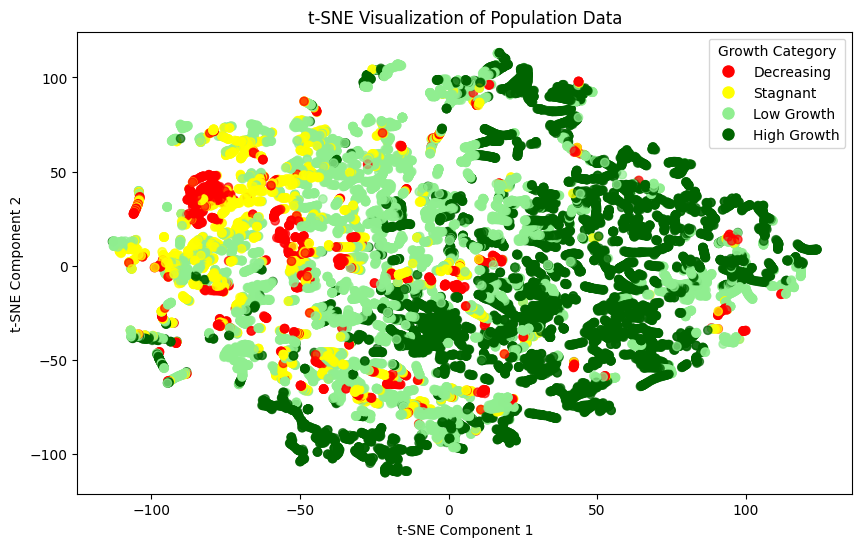

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Assuming 'X' is your DataFrame
# Categorize based on 'Population Growth Rate (percentage)'
def categorize_growth_rate(row):
    growth_rate = row['Population Growth Rate (percentage)']
    if growth_rate > 2:
        return 'High Growth'
    elif 0.5 < growth_rate <= 2:
        return 'Low Growth'
    elif -0.2 <= growth_rate <= 0.5:
        return 'Stagnant'
    else:
        return 'Decreasing'

# Filter the DataFrame for the year 2023
# X_subtrain = X[X['Year].copy()

# Apply the categorization function
X_subtrain['Growth Category'] = X_subtrain.apply(categorize_growth_rate, axis=1)

# Define the numerical columns
numerical_columns = [
    "Population Density, as of 1 July (persons per square km)",
    "Population Sex Ratio, as of 1 July (males per 100 females)",
    "Median Age, as of 1 July (years)",
    "Natural Change, Births minus Deaths (thousands)",
    "Rate of Natural Change (per 1,000 population)",
    "Population Change (thousands)",
    "Population Growth Rate (percentage)",
    "Births (thousands)",
    "Births by women aged 15 to 19 (thousands)",
    "Crude Birth Rate (births per 1,000 population)",
    "Total Fertility Rate (live births per woman)",
    "Net Reproduction Rate (surviving daughters per woman)",
    "Mean Age Childbearing (years)",
    "Sex Ratio at Birth (males per 100 female births)",
    "Total Deaths (thousands)",
    "Male Deaths (thousands)",
    "Female Deaths (thousands)",
    "Crude Death Rate (deaths per 1,000 population)",
    "Life Expectancy at Birth, both sexes (years)",
    "Male Life Expectancy at Birth (years)",
    "Female Life Expectancy at Birth (years)",
    "Life Expectancy at Age 15, both sexes (years)",
    "Male Life Expectancy at Age 15 (years)",
    "Female Life Expectancy at Age 15 (years)",
    "Life Expectancy at Age 65, both sexes (years)",
    "Male Life Expectancy at Age 65 (years)",
    "Female Life Expectancy at Age 65 (years)",
    "Life Expectancy at Age 80, both sexes (years)",
    "Male Life Expectancy at Age 80 (years)",
    "Female Life Expectancy at Age 80 (years)",
    "Infant Deaths, under age 1 (thousands)",
    "Infant Mortality Rate (infant deaths per 1,000 live births)",
    "Live Births Surviving to Age 1 (thousands)",
    "Under-Five Deaths, under age 5 (thousands)",
    "Under-Five Mortality (deaths under age 5 per 1,000 live births)",
    "Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)",
    "Male Mortality before Age 40 (deaths under age 40 per 1,000 male live births)",
    "Female Mortality before Age 40 (deaths under age 40 per 1,000 female live births)",
    "Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)",
    "Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)",
    "Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)",
    "Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)",
    "Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)",
    "Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)",
    "Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)",
    "Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)",
    "Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",
    "Net Number of Migrants (thousands)",
    "Net Migration Rate (per 1,000 population)"
]

# Extract the numerical data
numerical_data = X_subtrain.drop(['Growth Category'], axis=1)

# Standardize the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(scaled_data)

# Add the t-SNE results to the DataFrame
X_subtrain.loc[:, 'tsne-2d-one'] = tsne_results[:, 0]
X_subtrain.loc[:, 'tsne-2d-two'] = tsne_results[:, 1]

# Define the color map
category_colors = {
    'Decreasing': 'red',
    'Stagnant': 'yellow',
    'Low Growth': 'lightgreen',
    'High Growth': 'darkgreen'
}

# Map the colors to the growth categories
colors = X_subtrain['Growth Category'].map(category_colors)

# Visualize the results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_subtrain['tsne-2d-one'], X_subtrain['tsne-2d-two'], 
    c=colors, alpha=0.7
)
# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in category_colors.values()]
labels = category_colors.keys()
plt.legend(handles, labels, title="Growth Category")

plt.title("t-SNE Visualization of Population Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


Text(0.5, 1.0, 'Error At Predicting Future Population by Cutoff Year')

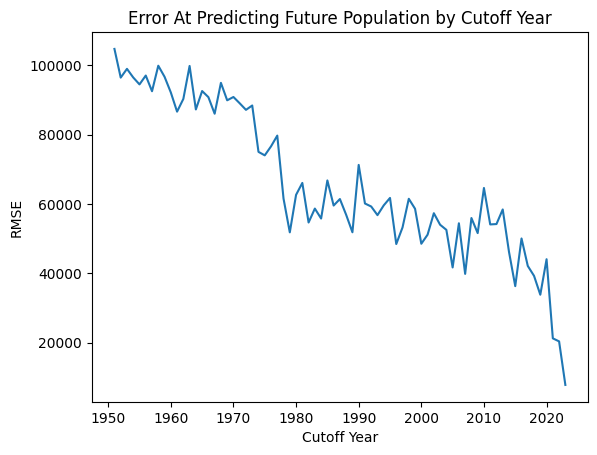

In [8]:
errors = []
years = []
# data = data[data["Region, subregion, country or area *"] == "Azerbaijan"]
for i in range(1951, 2024):
    train = data[data['Year'] < i]
    test = data[data['Year'] >= i]

    y_train = train["Total Population, as of 1 January (thousands)"]
    X_train = train.drop(["Region, subregion, country or area *", "Type","Total Population, as of 1 January (thousands)", "Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)", "Female Population, as of 1 July (thousands)"], axis=1)
    y_test = test["Total Population, as of 1 January (thousands)"]
    X_test = test.drop(["Region, subregion, country or area *", "Type","Total Population, as of 1 January (thousands)", "Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)", "Female Population, as of 1 July (thousands)"], axis=1)

    clf = RandomForestRegressor(n_estimators=10, max_features="sqrt", n_jobs=-1, max_depth=10)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_val)
    score = root_mean_squared_error(y_val, y_predict)
    errors.append(score)
    years.append(i)


plt.plot(years, errors)
plt.xlabel("Cutoff Year")
plt.ylabel("RMSE")
plt.title("Error At Predicting Future Population by Cutoff Year")

237
Burundi
2590     1950
2827     1951
3064     1952
3301     1953
3538     1954
3775     1955
4012     1956
4323     1957
4560     1958
4797     1959
5108     1960
5345     1961
5656     1962
5967     1963
6204     1964
6441     1965
6678     1966
6915     1967
7152     1968
7537     1969
7848     1970
8085     1971
8322     1972
8633     1973
8870     1974
9181     1975
9418     1976
9655     1977
9892     1978
10203    1979
10440    1980
10677    1981
10914    1982
11151    1983
11388    1984
11773    1985
12010    1986
12247    1987
12558    1988
12795    1989
13032    1990
13269    1991
13580    1992
13817    1993
14054    1994
14291    1995
14528    1996
14839    1997
15076    1998
15313    1999
15698    2000
15935    2001
Name: Year, dtype: int64
Burundi Linear RMSE: 2186.270073266402
Burundi RF RMSE: 1712.2181395138812


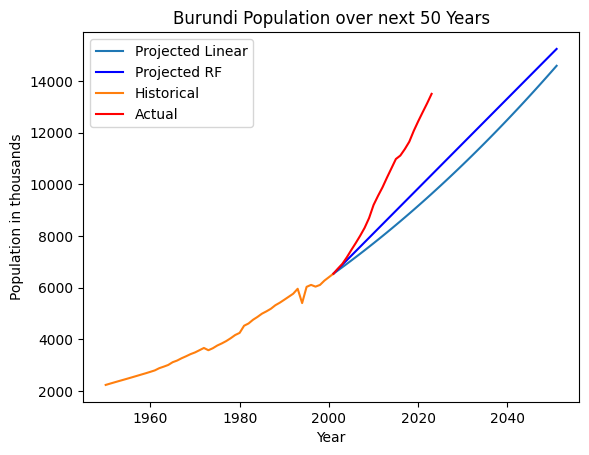

Comoros
2591     1950
2828     1951
3065     1952
3302     1953
3539     1954
3776     1955
4013     1956
4324     1957
4561     1958
4798     1959
5109     1960
5346     1961
5657     1962
5968     1963
6205     1964
6442     1965
6679     1966
6916     1967
7153     1968
7538     1969
7849     1970
8086     1971
8323     1972
8634     1973
8871     1974
9182     1975
9419     1976
9656     1977
9893     1978
10204    1979
10441    1980
10678    1981
10915    1982
11152    1983
11389    1984
11774    1985
12011    1986
12248    1987
12559    1988
12796    1989
13033    1990
13270    1991
13581    1992
13818    1993
14055    1994
14292    1995
14529    1996
14840    1997
15077    1998
15314    1999
15699    2000
15936    2001
Name: Year, dtype: int64
Comoros Linear RMSE: 5.602970481855869
Comoros RF RMSE: 25.518517020254748


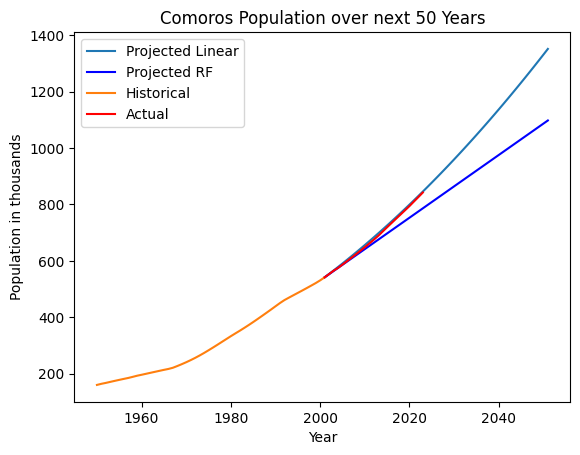

Djibouti
2592     1950
2829     1951
3066     1952
3303     1953
3540     1954
3777     1955
4014     1956
4325     1957
4562     1958
4799     1959
5110     1960
5347     1961
5658     1962
5969     1963
6206     1964
6443     1965
6680     1966
6917     1967
7154     1968
7539     1969
7850     1970
8087     1971
8324     1972
8635     1973
8872     1974
9183     1975
9420     1976
9657     1977
9894     1978
10205    1979
10442    1980
10679    1981
10916    1982
11153    1983
11390    1984
11775    1985
12012    1986
12249    1987
12560    1988
12797    1989
13034    1990
13271    1991
13582    1992
13819    1993
14056    1994
14293    1995
14530    1996
14841    1997
15078    1998
15315    1999
15700    2000
15937    2001
Name: Year, dtype: int64
Djibouti Linear RMSE: 177.0163421804848
Djibouti RF RMSE: 86.40200271589782


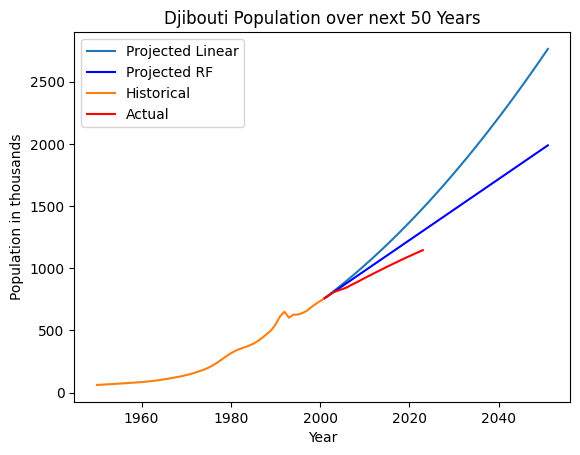

Eritrea
2593     1950
2830     1951
3067     1952
3304     1953
3541     1954
3778     1955
4015     1956
4326     1957
4563     1958
4800     1959
5111     1960
5348     1961
5659     1962
5970     1963
6207     1964
6444     1965
6681     1966
6918     1967
7155     1968
7540     1969
7851     1970
8088     1971
8325     1972
8636     1973
8873     1974
9184     1975
9421     1976
9658     1977
9895     1978
10206    1979
10443    1980
10680    1981
10917    1982
11154    1983
11391    1984
11776    1985
12013    1986
12250    1987
12561    1988
12798    1989
13035    1990
13272    1991
13583    1992
13820    1993
14057    1994
14294    1995
14531    1996
14842    1997
15079    1998
15316    1999
15701    2000
15938    2001
Name: Year, dtype: int64
Eritrea Linear RMSE: 167.22044491452985
Eritrea RF RMSE: 274.84015747987416


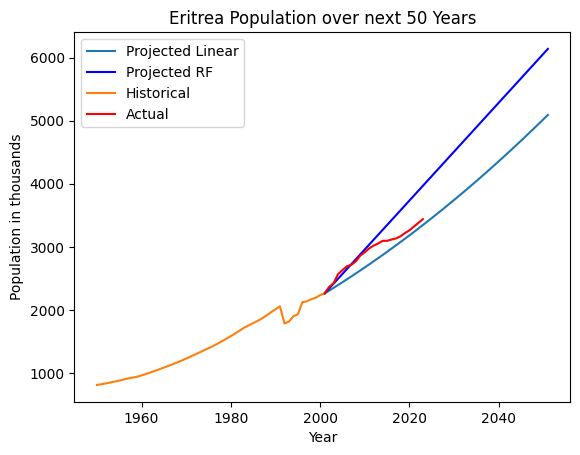

Ethiopia
2594     1950
2831     1951
3068     1952
3305     1953
3542     1954
3779     1955
4016     1956
4327     1957
4564     1958
4801     1959
5112     1960
5349     1961
5660     1962
5971     1963
6208     1964
6445     1965
6682     1966
6919     1967
7156     1968
7541     1969
7852     1970
8089     1971
8326     1972
8637     1973
8874     1974
9185     1975
9422     1976
9659     1977
9896     1978
10207    1979
10444    1980
10681    1981
10918    1982
11155    1983
11392    1984
11777    1985
12014    1986
12251    1987
12562    1988
12799    1989
13036    1990
13273    1991
13584    1992
13821    1993
14058    1994
14295    1995
14532    1996
14843    1997
15080    1998
15317    1999
15702    2000
15939    2001
Name: Year, dtype: int64
Ethiopia Linear RMSE: 2468.3501264201923
Ethiopia RF RMSE: 5720.297316238492


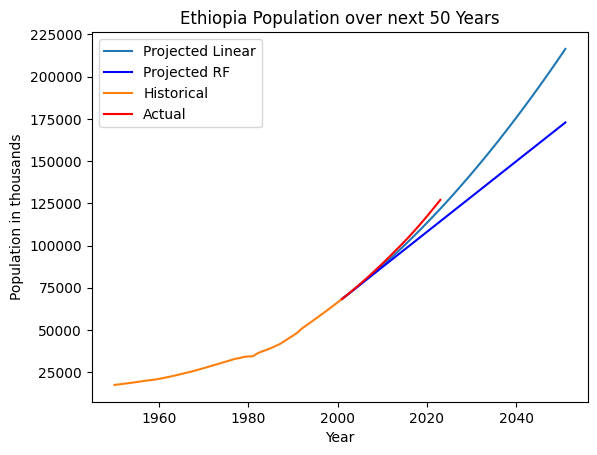

Kenya
2595     1950
2832     1951
3069     1952
3306     1953
3543     1954
3780     1955
4017     1956
4328     1957
4565     1958
4802     1959
5113     1960
5350     1961
5661     1962
5972     1963
6209     1964
6446     1965
6683     1966
6920     1967
7157     1968
7542     1969
7853     1970
8090     1971
8327     1972
8638     1973
8875     1974
9186     1975
9423     1976
9660     1977
9897     1978
10208    1979
10445    1980
10682    1981
10919    1982
11156    1983
11393    1984
11778    1985
12015    1986
12252    1987
12563    1988
12800    1989
13037    1990
13274    1991
13585    1992
13822    1993
14059    1994
14296    1995
14533    1996
14844    1997
15081    1998
15318    1999
15703    2000
15940    2001
Name: Year, dtype: int64
Kenya Linear RMSE: 873.7512615318424
Kenya RF RMSE: 1399.3526159267713


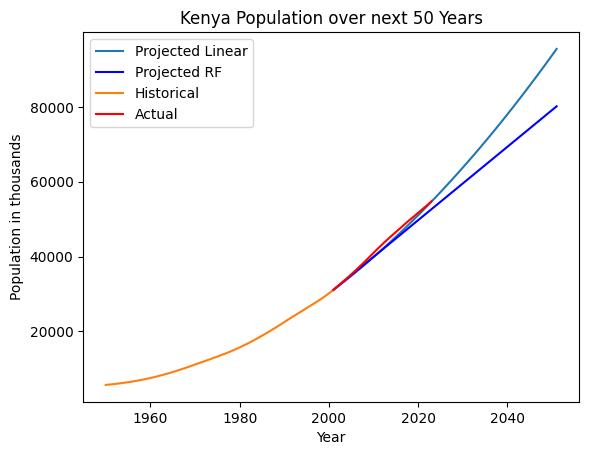

Madagascar
2596     1950
2833     1951
3070     1952
3307     1953
3544     1954
3781     1955
4018     1956
4329     1957
4566     1958
4803     1959
5114     1960
5351     1961
5662     1962
5973     1963
6210     1964
6447     1965
6684     1966
6921     1967
7158     1968
7543     1969
7854     1970
8091     1971
8328     1972
8639     1973
8876     1974
9187     1975
9424     1976
9661     1977
9898     1978
10209    1979
10446    1980
10683    1981
10920    1982
11157    1983
11394    1984
11779    1985
12016    1986
12253    1987
12564    1988
12801    1989
13038    1990
13275    1991
13586    1992
13823    1993
14060    1994
14297    1995
14534    1996
14845    1997
15082    1998
15319    1999
15704    2000
15941    2001
Name: Year, dtype: int64
Madagascar Linear RMSE: 876.4105012580826
Madagascar RF RMSE: 1238.981619906634


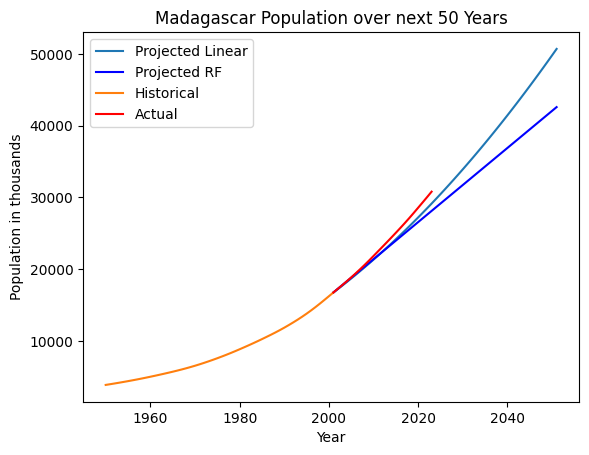

Malawi
2597     1950
2834     1951
3071     1952
3308     1953
3545     1954
3782     1955
4019     1956
4330     1957
4567     1958
4804     1959
5115     1960
5352     1961
5663     1962
5974     1963
6211     1964
6448     1965
6685     1966
6922     1967
7159     1968
7544     1969
7855     1970
8092     1971
8329     1972
8640     1973
8877     1974
9188     1975
9425     1976
9662     1977
9899     1978
10210    1979
10447    1980
10684    1981
10921    1982
11158    1983
11395    1984
11780    1985
12017    1986
12254    1987
12565    1988
12802    1989
13039    1990
13276    1991
13587    1992
13824    1993
14061    1994
14298    1995
14535    1996
14846    1997
15083    1998
15320    1999
15705    2000
15942    2001
Name: Year, dtype: int64
Malawi Linear RMSE: 924.9832880283088
Malawi RF RMSE: 1601.785634014515


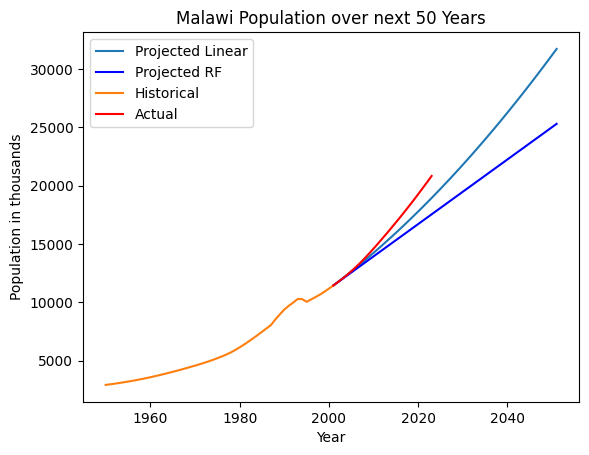

Mauritius
2598     1950
2835     1951
3072     1952
3309     1953
3546     1954
3783     1955
4020     1956
4331     1957
4568     1958
4805     1959
5116     1960
5353     1961
5664     1962
5975     1963
6212     1964
6449     1965
6686     1966
6923     1967
7160     1968
7545     1969
7856     1970
8093     1971
8330     1972
8641     1973
8878     1974
9189     1975
9426     1976
9663     1977
9900     1978
10211    1979
10448    1980
10685    1981
10922    1982
11159    1983
11544    1984
11781    1985
12018    1986
12255    1987
12566    1988
12803    1989
13040    1990
13277    1991
13588    1992
13825    1993
14062    1994
14299    1995
14536    1996
14847    1997
15084    1998
15321    1999
15706    2000
15943    2001
Name: Year, dtype: int64
Mauritius Linear RMSE: 91.47590402315471
Mauritius RF RMSE: 66.3504267565903


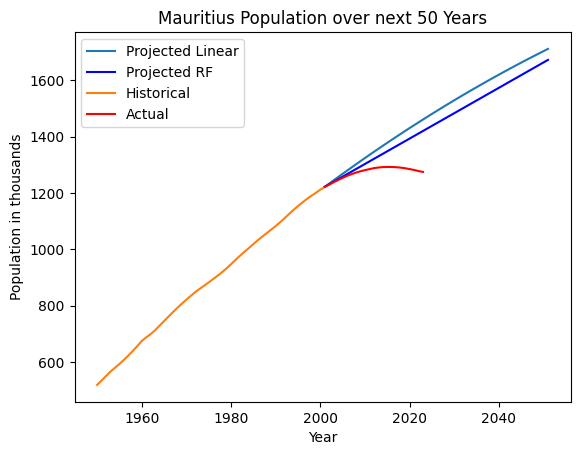

Mayotte
2599     1950
2836     1951
3073     1952
3310     1953
3547     1954
3784     1955
4021     1956
4332     1957
4569     1958
4806     1959
5117     1960
5354     1961
5665     1962
5976     1963
6213     1964
6450     1965
6687     1966
6924     1967
7161     1968
7546     1969
7857     1970
8094     1971
8331     1972
8642     1973
8879     1974
9190     1975
9427     1976
9664     1977
9901     1978
10212    1979
10449    1980
10686    1981
10923    1982
11160    1983
11545    1984
11782    1985
12019    1986
12256    1987
12567    1988
12804    1989
13041    1990
13278    1991
13589    1992
13826    1993
14063    1994
14300    1995
14537    1996
14848    1997
15085    1998
15322    1999
15707    2000
15944    2001
Name: Year, dtype: int64
Mayotte Linear RMSE: 23.190220463246174
Mayotte RF RMSE: 7.943369661404255


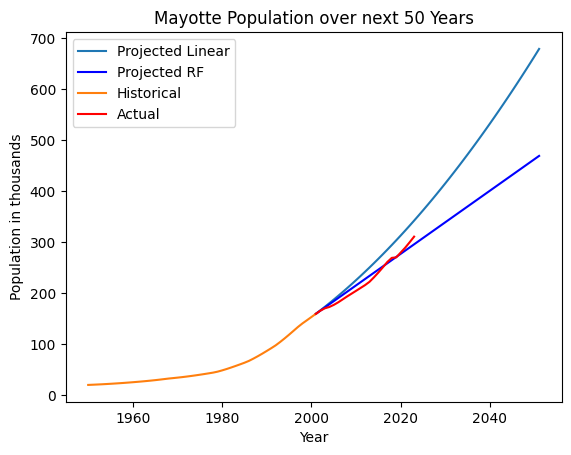

Mozambique
2600     1950
2837     1951
3074     1952
3311     1953
3548     1954
3785     1955
4022     1956
4333     1957
4570     1958
4807     1959
5118     1960
5355     1961
5666     1962
5977     1963
6214     1964
6451     1965
6688     1966
6925     1967
7162     1968
7547     1969
7858     1970
8095     1971
8332     1972
8643     1973
8880     1974
9191     1975
9428     1976
9665     1977
9902     1978
10213    1979
10450    1980
10687    1981
10924    1982
11161    1983
11546    1984
11783    1985
12020    1986
12257    1987
12568    1988
12805    1989
13042    1990
13279    1991
13590    1992
13827    1993
14064    1994
14301    1995
14538    1996
14849    1997
15086    1998
15323    1999
15708    2000
15945    2001
Name: Year, dtype: int64
Mozambique Linear RMSE: 1068.5713603483566
Mozambique RF RMSE: 2587.7271846399317


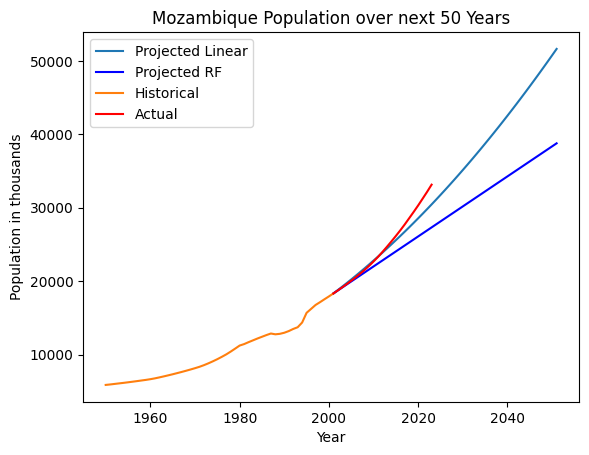

Réunion
2601     1950
2838     1951
3075     1952
3312     1953
3549     1954
3786     1955
4023     1956
4334     1957
4571     1958
4808     1959
5119     1960
5356     1961
5667     1962
5978     1963
6215     1964
6452     1965
6689     1966
6926     1967
7163     1968
7548     1969
7859     1970
8096     1971
8333     1972
8644     1973
8881     1974
9192     1975
9429     1976
9666     1977
9903     1978
10214    1979
10451    1980
10688    1981
10925    1982
11162    1983
11547    1984
11784    1985
12021    1986
12258    1987
12569    1988
12806    1989
13043    1990
13280    1991
13591    1992
13828    1993
14065    1994
14302    1995
14539    1996
14850    1997
15087    1998
15324    1999
15709    2000
15946    2001
Name: Year, dtype: int64
Réunion Linear RMSE: 55.31189915158727
Réunion RF RMSE: 46.549696687744415


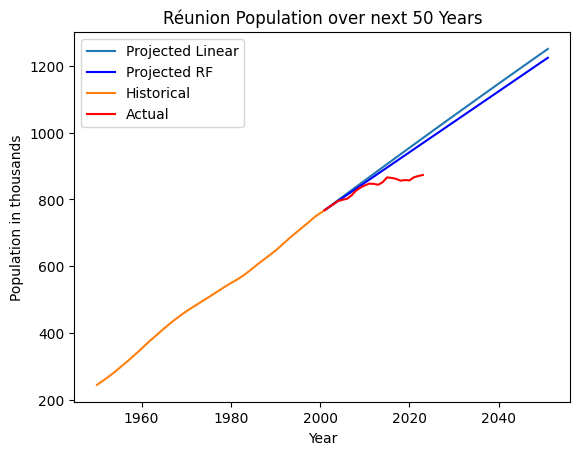

Rwanda
2602     1950
2839     1951
3076     1952
3313     1953
3550     1954
3787     1955
4024     1956
4335     1957
4572     1958
4809     1959
5120     1960
5357     1961
5668     1962
5979     1963
6216     1964
6453     1965
6690     1966
6927     1967
7164     1968
7549     1969
7860     1970
8097     1971
8334     1972
8645     1973
8882     1974
9193     1975
9430     1976
9667     1977
9904     1978
10215    1979
10452    1980
10689    1981
10926    1982
11163    1983
11548    1984
11785    1985
12022    1986
12259    1987
12570    1988
12807    1989
13044    1990
13281    1991
13592    1992
13829    1993
14066    1994
14303    1995
14540    1996
14851    1997
15088    1998
15325    1999
15710    2000
15947    2001
Name: Year, dtype: int64
Rwanda Linear RMSE: 1018.9781872103549
Rwanda RF RMSE: 2118.3912040738733


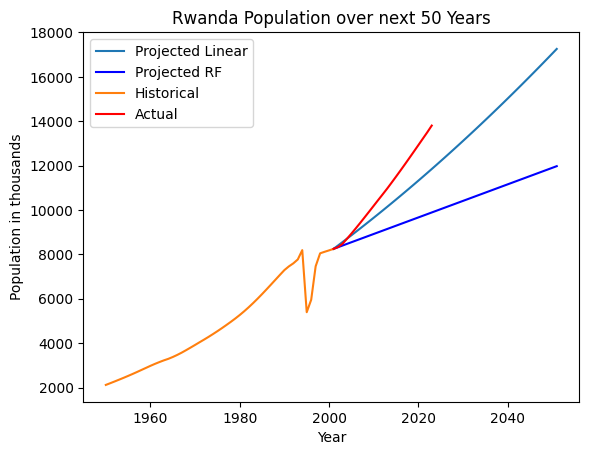

Seychelles
2603     1950
2840     1951
3077     1952
3314     1953
3551     1954
3788     1955
4025     1956
4336     1957
4573     1958
4884     1959
5121     1960
5358     1961
5669     1962
5980     1963
6217     1964
6454     1965
6691     1966
6928     1967
7165     1968
7550     1969
7861     1970
8098     1971
8335     1972
8646     1973
8883     1974
9194     1975
9431     1976
9668     1977
9905     1978
10216    1979
10453    1980
10690    1981
10927    1982
11164    1983
11549    1984
11786    1985
12023    1986
12260    1987
12571    1988
12808    1989
13045    1990
13282    1991
13593    1992
13830    1993
14067    1994
14304    1995
14541    1996
14852    1997
15089    1998
15326    1999
15711    2000
15948    2001
Name: Year, dtype: int64
Seychelles Linear RMSE: 7.747108538662797
Seychelles RF RMSE: 6.234306102310427


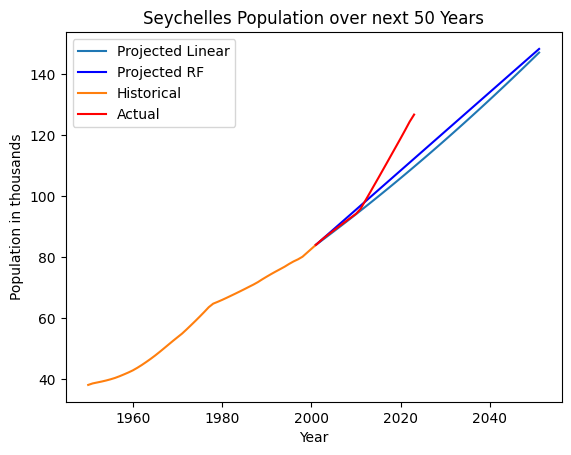

Somalia
2604     1950
2841     1951
3078     1952
3315     1953
3552     1954
3789     1955
4026     1956
4337     1957
4574     1958
4885     1959
5122     1960
5359     1961
5670     1962
5981     1963
6218     1964
6455     1965
6692     1966
6929     1967
7166     1968
7551     1969
7862     1970
8099     1971
8336     1972
8647     1973
8884     1974
9195     1975
9432     1976
9669     1977
9906     1978
10217    1979
10454    1980
10691    1981
10928    1982
11165    1983
11550    1984
11787    1985
12024    1986
12261    1987
12572    1988
12809    1989
13046    1990
13283    1991
13594    1992
13831    1993
14068    1994
14305    1995
14542    1996
14853    1997
15090    1998
15327    1999
15712    2000
15949    2001
Name: Year, dtype: int64
Somalia Linear RMSE: 1387.1104708421192
Somalia RF RMSE: 469.7332344058702


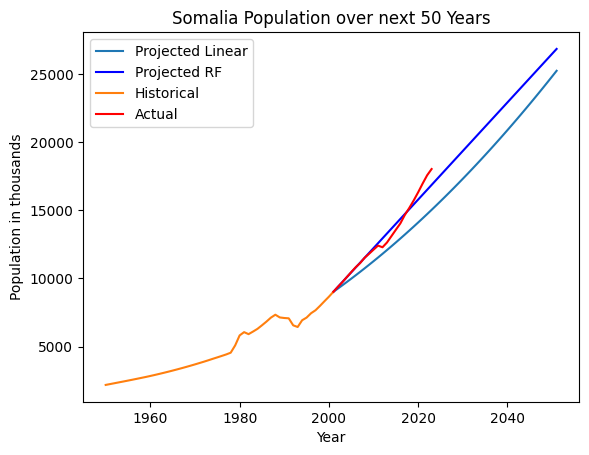

South Sudan
2605     1950
2842     1951
3079     1952
3316     1953
3553     1954
3790     1955
4027     1956
4338     1957
4575     1958
4886     1959
5123     1960
5360     1961
5671     1962
5982     1963
6219     1964
6456     1965
6693     1966
6930     1967
7167     1968
7552     1969
7863     1970
8100     1971
8337     1972
8648     1973
8885     1974
9196     1975
9433     1976
9670     1977
9907     1978
10218    1979
10455    1980
10692    1981
10929    1982
11166    1983
11551    1984
11788    1985
12025    1986
12262    1987
12573    1988
12810    1989
13047    1990
13284    1991
13595    1992
13832    1993
14069    1994
14306    1995
14543    1996
14854    1997
15091    1998
15328    1999
15713    2000
15950    2001
Name: Year, dtype: int64
South Sudan Linear RMSE: 1873.4004318387563
South Sudan RF RMSE: 850.3089251234561


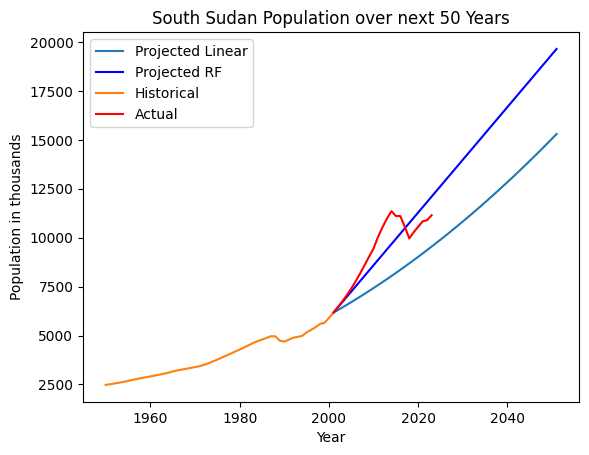

Uganda
2606     1950
2843     1951
3080     1952
3317     1953
3554     1954
3791     1955
4028     1956
4339     1957
4576     1958
4887     1959
5124     1960
5361     1961
5672     1962
5983     1963
6220     1964
6457     1965
6694     1966
6931     1967
7168     1968
7553     1969
7864     1970
8101     1971
8338     1972
8649     1973
8886     1974
9197     1975
9434     1976
9671     1977
9908     1978
10219    1979
10456    1980
10693    1981
10930    1982
11167    1983
11552    1984
11789    1985
12026    1986
12263    1987
12574    1988
12811    1989
13048    1990
13285    1991
13596    1992
13833    1993
14070    1994
14307    1995
14544    1996
14855    1997
15092    1998
15329    1999
15714    2000
15951    2001
Name: Year, dtype: int64
Uganda Linear RMSE: 2914.7462756953623
Uganda RF RMSE: 3147.0262849549854


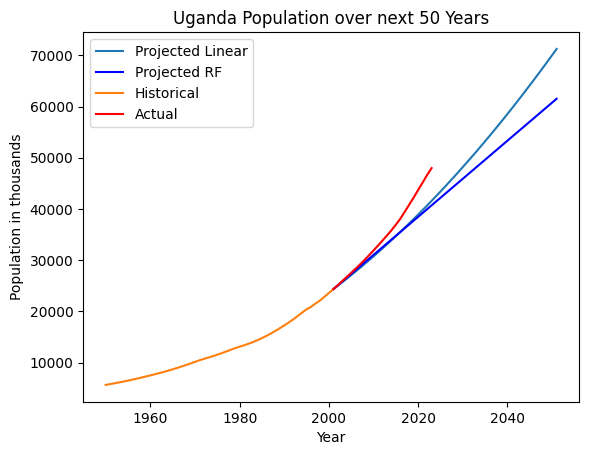

United Republic of Tanzania
2607     1950
2844     1951
3081     1952
3318     1953
3555     1954
3792     1955
4029     1956
4340     1957
4577     1958
4888     1959
5125     1960
5362     1961
5673     1962
5984     1963
6221     1964
6458     1965
6695     1966
6932     1967
7169     1968
7554     1969
7865     1970
8102     1971
8339     1972
8650     1973
8887     1974
9198     1975
9435     1976
9672     1977
9909     1978
10220    1979
10457    1980
10694    1981
10931    1982
11168    1983
11553    1984
11790    1985
12027    1986
12264    1987
12575    1988
12812    1989
13049    1990
13286    1991
13597    1992
13834    1993
14071    1994
14308    1995
14545    1996
14856    1997
15093    1998
15330    1999
15715    2000
15952    2001
Name: Year, dtype: int64
United Republic of Tanzania Linear RMSE: 2934.4199873970288
United Republic of Tanzania RF RMSE: 4735.484911110122


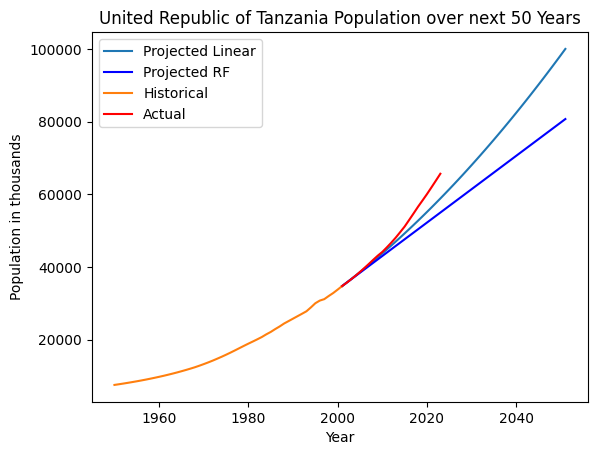

Zambia
2608     1950
2845     1951
3082     1952
3319     1953
3556     1954
3793     1955
4030     1956
4341     1957
4578     1958
4889     1959
5126     1960
5363     1961
5674     1962
5985     1963
6222     1964
6459     1965
6696     1966
6933     1967
7170     1968
7555     1969
7866     1970
8103     1971
8340     1972
8651     1973
8888     1974
9199     1975
9436     1976
9673     1977
9910     1978
10221    1979
10458    1980
10695    1981
10932    1982
11169    1983
11554    1984
11791    1985
12028    1986
12265    1987
12576    1988
12813    1989
13050    1990
13287    1991
13598    1992
13835    1993
14072    1994
14309    1995
14546    1996
14857    1997
15094    1998
15331    1999
15716    2000
15953    2001
Name: Year, dtype: int64
Zambia Linear RMSE: 1944.2370467196474
Zambia RF RMSE: 1711.8699755196742


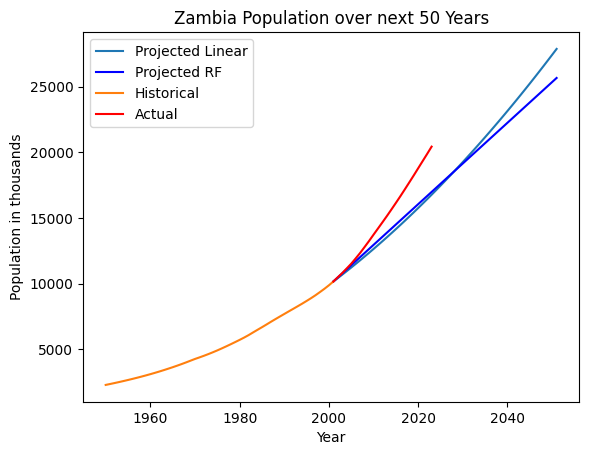

Zimbabwe
2609     1950
2846     1951
3083     1952
3320     1953
3557     1954
3794     1955
4031     1956
4342     1957
4579     1958
4890     1959
5127     1960
5364     1961
5675     1962
5986     1963
6223     1964
6460     1965
6697     1966
6934     1967
7171     1968
7556     1969
7867     1970
8104     1971
8341     1972
8652     1973
8889     1974
9200     1975
9437     1976
9674     1977
9911     1978
10222    1979
10459    1980
10696    1981
10933    1982
11170    1983
11555    1984
11792    1985
12029    1986
12266    1987
12577    1988
12814    1989
13051    1990
13288    1991
13599    1992
13836    1993
14073    1994
14310    1995
14547    1996
14858    1997
15095    1998
15332    1999
15717    2000
15954    2001
Name: Year, dtype: int64
Zimbabwe Linear RMSE: 1115.6119996700775
Zimbabwe RF RMSE: 1078.4384571355865


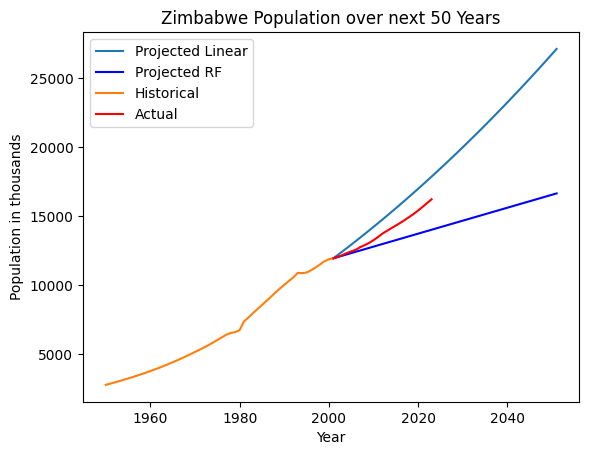

Angola
2610     1950
2847     1951
3084     1952
3321     1953
3558     1954
3795     1955
4032     1956
4343     1957
4580     1958
4891     1959
5128     1960
5365     1961
5676     1962
5987     1963
6224     1964
6461     1965
6698     1966
6935     1967
7172     1968
7557     1969
7868     1970
8105     1971
8342     1972
8653     1973
8890     1974
9201     1975
9438     1976
9675     1977
9912     1978
10223    1979
10460    1980
10697    1981
10934    1982
11171    1983
11556    1984
11793    1985
12030    1986
12267    1987
12578    1988
12815    1989
13052    1990
13289    1991
13600    1992
13837    1993
14074    1994
14311    1995
14548    1996
14859    1997
15096    1998
15333    1999
15718    2000
15955    2001
Name: Year, dtype: int64
Angola Linear RMSE: 2933.893080785932
Angola RF RMSE: 3673.3820114128134


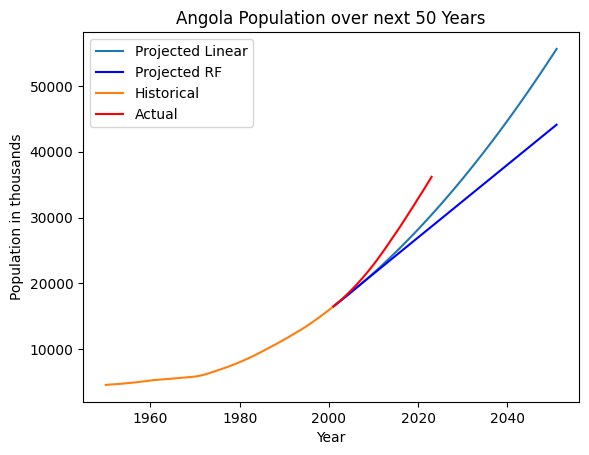

Cameroon
2611     1950
2848     1951
3085     1952
3322     1953
3559     1954
3796     1955
4033     1956
4344     1957
4581     1958
4892     1959
5129     1960
5366     1961
5677     1962
5988     1963
6225     1964
6462     1965
6699     1966
6936     1967
7173     1968
7558     1969
7869     1970
8106     1971
8343     1972
8654     1973
8891     1974
9202     1975
9439     1976
9676     1977
9913     1978
10224    1979
10461    1980
10698    1981
10935    1982
11172    1983
11557    1984
11794    1985
12031    1986
12268    1987
12579    1988
12816    1989
13053    1990
13290    1991
13601    1992
13838    1993
14075    1994
14312    1995
14549    1996
14860    1997
15097    1998
15334    1999
15719    2000
15956    2001
Name: Year, dtype: int64
Cameroon Linear RMSE: 1163.3215654893202
Cameroon RF RMSE: 1956.804802193399


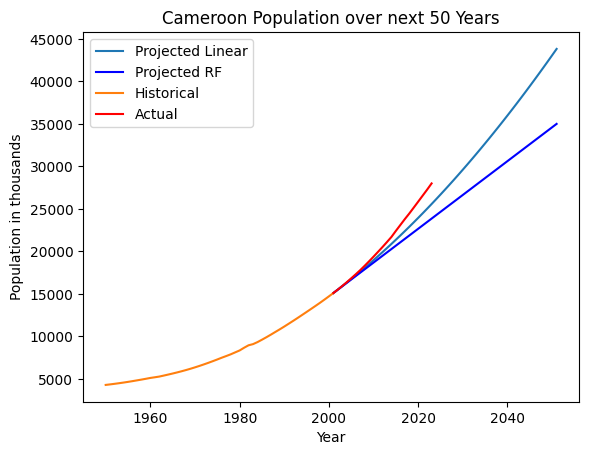

Central African Republic
2612     1950
2849     1951
3086     1952
3323     1953
3560     1954
3797     1955
4034     1956
4345     1957
4582     1958
4893     1959
5130     1960
5367     1961
5678     1962
5989     1963
6226     1964
6463     1965
6700     1966
6937     1967
7174     1968
7559     1969
7870     1970
8107     1971
8344     1972
8655     1973
8892     1974
9203     1975
9440     1976
9677     1977
9914     1978
10225    1979
10462    1980
10699    1981
10936    1982
11173    1983
11558    1984
11795    1985
12032    1986
12269    1987
12580    1988
12817    1989
13054    1990
13291    1991
13602    1992
13839    1993
14076    1994
14313    1995
14550    1996
14861    1997
15098    1998
15335    1999
15720    2000
15957    2001
Name: Year, dtype: int64
Central African Republic Linear RMSE: 498.86041711148107
Central African Republic RF RMSE: 287.5423582436133


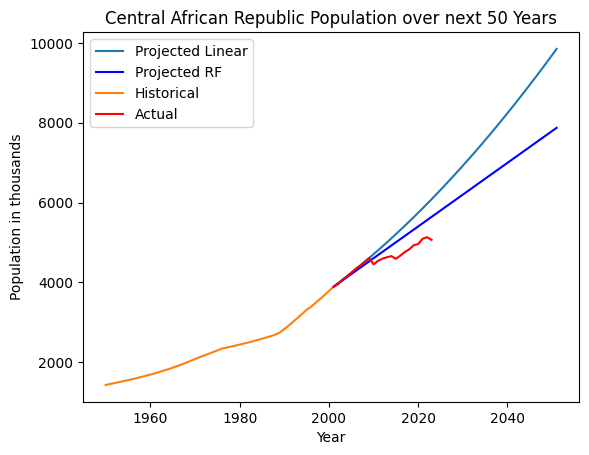

Chad
2613     1950
2850     1951
3087     1952
3324     1953
3561     1954
3798     1955
4035     1956
4346     1957
4583     1958
4894     1959
5131     1960
5368     1961
5679     1962
5990     1963
6227     1964
6464     1965
6701     1966
6938     1967
7175     1968
7560     1969
7871     1970
8108     1971
8345     1972
8656     1973
8893     1974
9204     1975
9441     1976
9678     1977
9915     1978
10226    1979
10463    1980
10700    1981
10937    1982
11174    1983
11559    1984
11796    1985
12033    1986
12270    1987
12581    1988
12818    1989
13055    1990
13292    1991
13603    1992
13840    1993
14077    1994
14314    1995
14551    1996
14862    1997
15099    1998
15336    1999
15721    2000
15958    2001
Name: Year, dtype: int64
Chad Linear RMSE: 1744.2310580548494
Chad RF RMSE: 1718.6920693746465


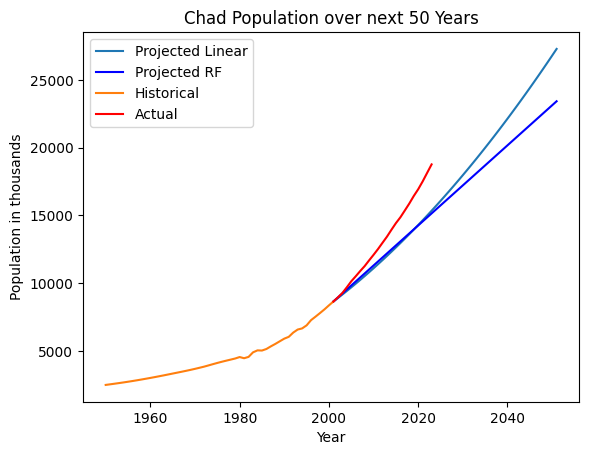

Congo
2614     1950
2851     1951
3088     1952
3325     1953
3562     1954
3799     1955
4036     1956
4347     1957
4584     1958
4895     1959
5132     1960
5369     1961
5680     1962
5991     1963
6228     1964
6465     1965
6702     1966
6939     1967
7176     1968
7561     1969
7872     1970
8109     1971
8346     1972
8657     1973
8894     1974
9205     1975
9442     1976
9679     1977
9916     1978
10227    1979
10464    1980
10701    1981
10938    1982
11175    1983
11560    1984
11797    1985
12034    1986
12271    1987
12582    1988
12819    1989
13056    1990
13293    1991
13604    1992
13841    1993
14078    1994
14315    1995
14552    1996
14863    1997
15100    1998
15337    1999
15722    2000
15959    2001
Name: Year, dtype: int64
Congo Linear RMSE: 418.8667703167268
Congo RF RMSE: 364.22000288878394


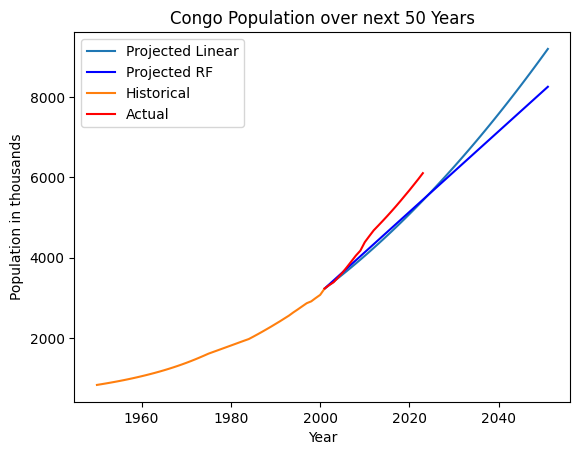

Democratic Republic of the Congo
2615     1950
2852     1951
3089     1952
3326     1953
3563     1954
3800     1955
4037     1956
4348     1957
4585     1958
4896     1959
5133     1960
5370     1961
5681     1962
5992     1963
6229     1964
6466     1965
6703     1966
6940     1967
7177     1968
7562     1969
7873     1970
8110     1971
8347     1972
8658     1973
8895     1974
9206     1975
9443     1976
9680     1977
9917     1978
10228    1979
10465    1980
10702    1981
10939    1982
11176    1983
11561    1984
11798    1985
12035    1986
12272    1987
12583    1988
12820    1989
13057    1990
13294    1991
13605    1992
13842    1993
14079    1994
14316    1995
14553    1996
14864    1997
15101    1998
15338    1999
15723    2000
15960    2001
Name: Year, dtype: int64
Democratic Republic of the Congo Linear RMSE: 6103.499111077336
Democratic Republic of the Congo RF RMSE: 7496.863870136223


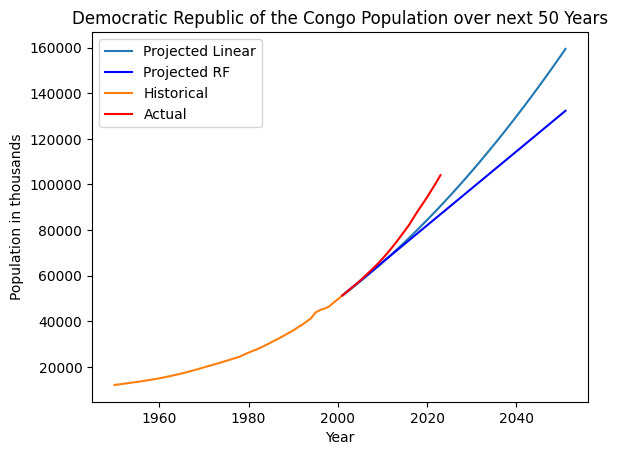

Equatorial Guinea
2616     1950
2853     1951
3090     1952
3327     1953
3564     1954
3801     1955
4038     1956
4349     1957
4586     1958
4897     1959
5134     1960
5371     1961
5682     1962
5993     1963
6230     1964
6467     1965
6704     1966
6941     1967
7326     1968
7563     1969
7874     1970
8111     1971
8348     1972
8659     1973
8896     1974
9207     1975
9444     1976
9681     1977
9918     1978
10229    1979
10466    1980
10703    1981
10940    1982
11177    1983
11562    1984
11799    1985
12036    1986
12273    1987
12584    1988
12821    1989
13058    1990
13295    1991
13606    1992
13843    1993
14080    1994
14317    1995
14554    1996
14865    1997
15102    1998
15339    1999
15724    2000
15961    2001
Name: Year, dtype: int64
Equatorial Guinea Linear RMSE: 253.83767633366224
Equatorial Guinea RF RMSE: 74.65071777964695


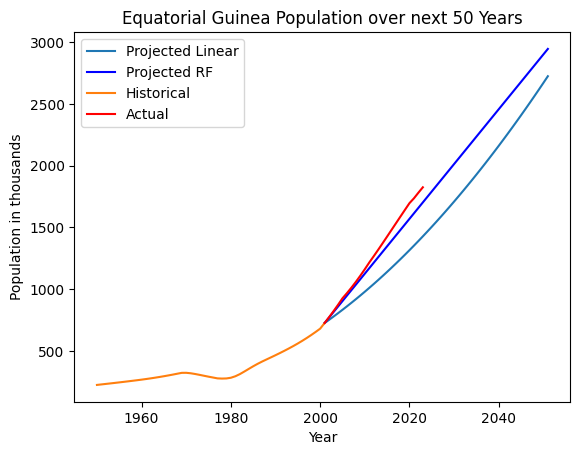

Gabon
2617     1950
2854     1951
3091     1952
3328     1953
3565     1954
3802     1955
4039     1956
4350     1957
4587     1958
4898     1959
5135     1960
5372     1961
5683     1962
5994     1963
6231     1964
6468     1965
6705     1966
6942     1967
7327     1968
7564     1969
7875     1970
8112     1971
8349     1972
8660     1973
8897     1974
9208     1975
9445     1976
9682     1977
9919     1978
10230    1979
10467    1980
10704    1981
10941    1982
11178    1983
11563    1984
11800    1985
12037    1986
12274    1987
12585    1988
12822    1989
13059    1990
13296    1991
13607    1992
13844    1993
14081    1994
14318    1995
14555    1996
14866    1997
15103    1998
15340    1999
15725    2000
15962    2001
Name: Year, dtype: int64
Gabon Linear RMSE: 158.5478356162154
Gabon RF RMSE: 224.47724454561492


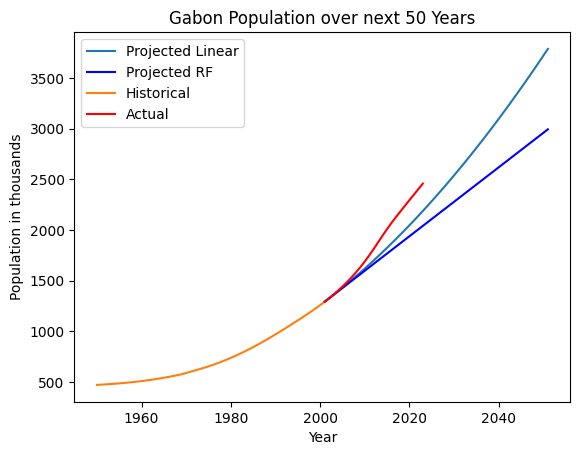

Sao Tome and Principe
2618     1950
2855     1951
3092     1952
3329     1953
3566     1954
3803     1955
4040     1956
4351     1957
4588     1958
4899     1959
5136     1960
5373     1961
5684     1962
5995     1963
6232     1964
6469     1965
6706     1966
6943     1967
7328     1968
7565     1969
7876     1970
8113     1971
8350     1972
8661     1973
8898     1974
9209     1975
9446     1976
9683     1977
9920     1978
10231    1979
10468    1980
10705    1981
10942    1982
11179    1983
11564    1984
11801    1985
12038    1986
12275    1987
12586    1988
12823    1989
13060    1990
13297    1991
13608    1992
13845    1993
14082    1994
14319    1995
14556    1996
14867    1997
15104    1998
15341    1999
15726    2000
15963    2001
Name: Year, dtype: int64
Sao Tome and Principe Linear RMSE: 8.695857232712905
Sao Tome and Principe RF RMSE: 15.035838442571414


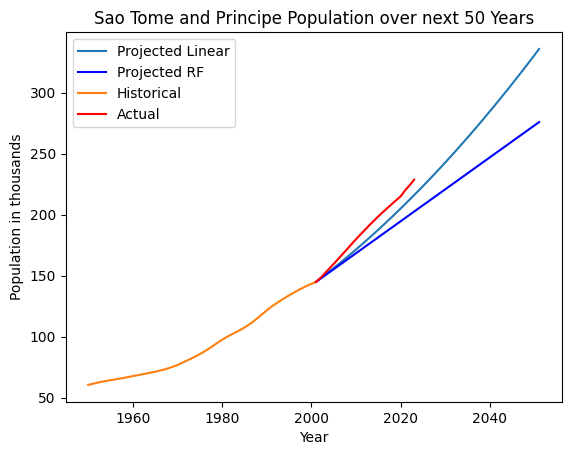

Algeria
2619     1950
2856     1951
3093     1952
3330     1953
3567     1954
3804     1955
4041     1956
4352     1957
4589     1958
4900     1959
5137     1960
5374     1961
5685     1962
5996     1963
6233     1964
6470     1965
6707     1966
6944     1967
7329     1968
7566     1969
7877     1970
8114     1971
8351     1972
8662     1973
8899     1974
9210     1975
9447     1976
9684     1977
9921     1978
10232    1979
10469    1980
10706    1981
10943    1982
11180    1983
11565    1984
11802    1985
12039    1986
12276    1987
12587    1988
12824    1989
13061    1990
13298    1991
13609    1992
13846    1993
14083    1994
14320    1995
14557    1996
14868    1997
15105    1998
15342    1999
15727    2000
15964    2001
Name: Year, dtype: int64
Algeria Linear RMSE: 1737.199251281803
Algeria RF RMSE: 2694.8782239882967


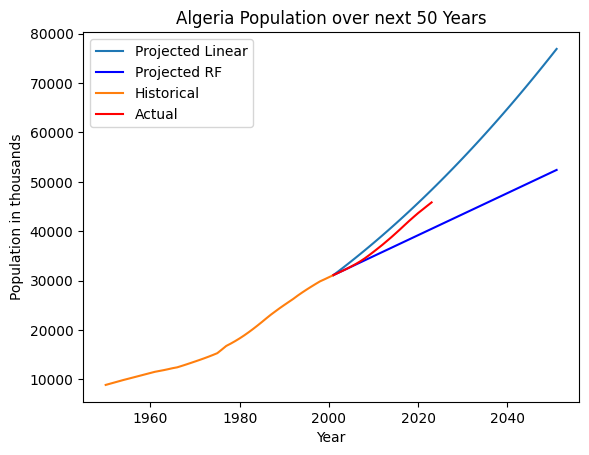

Egypt
2620     1950
2857     1951
3094     1952
3331     1953
3568     1954
3805     1955
4042     1956
4353     1957
4590     1958
4901     1959
5138     1960
5375     1961
5686     1962
5997     1963
6234     1964
6471     1965
6708     1966
6945     1967
7330     1968
7567     1969
7878     1970
8115     1971
8352     1972
8663     1973
8900     1974
9211     1975
9448     1976
9685     1977
9922     1978
10233    1979
10470    1980
10707    1981
10944    1982
11181    1983
11566    1984
11803    1985
12040    1986
12277    1987
12588    1988
12825    1989
13062    1990
13299    1991
13610    1992
13847    1993
14084    1994
14321    1995
14558    1996
14869    1997
15106    1998
15343    1999
15728    2000
15965    2001
Name: Year, dtype: int64
Egypt Linear RMSE: 1438.2920694828179
Egypt RF RMSE: 2766.1261041939233


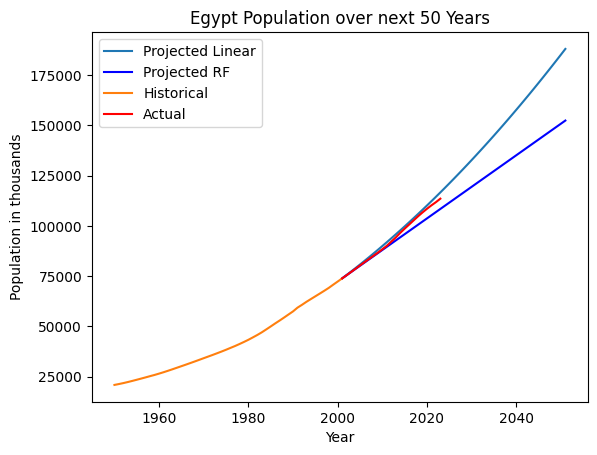

Libya
2621     1950
2858     1951
3095     1952
3332     1953
3569     1954
3806     1955
4043     1956
4354     1957
4591     1958
4902     1959
5139     1960
5376     1961
5687     1962
5998     1963
6235     1964
6472     1965
6709     1966
6946     1967
7331     1968
7568     1969
7879     1970
8116     1971
8353     1972
8664     1973
8901     1974
9212     1975
9449     1976
9686     1977
9923     1978
10234    1979
10471    1980
10708    1981
10945    1982
11182    1983
11567    1984
11804    1985
12041    1986
12278    1987
12589    1988
12826    1989
13063    1990
13300    1991
13611    1992
13848    1993
14085    1994
14322    1995
14559    1996
14870    1997
15107    1998
15344    1999
15729    2000
15966    2001
Name: Year, dtype: int64
Libya Linear RMSE: 615.2955464708853
Libya RF RMSE: 190.6933582578429


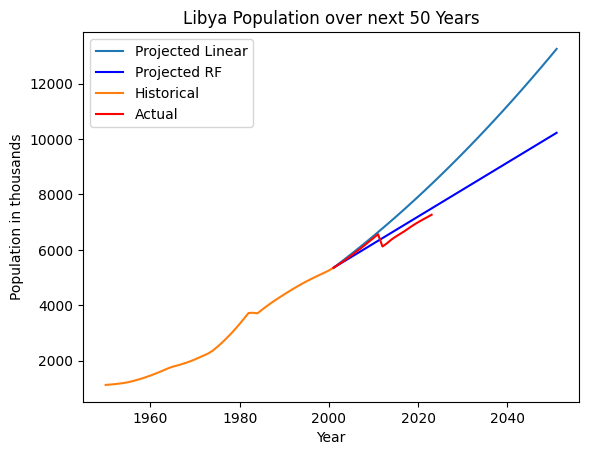

Morocco
2622     1950
2859     1951
3096     1952
3333     1953
3570     1954
3807     1955
4044     1956
4355     1957
4592     1958
4903     1959
5140     1960
5377     1961
5688     1962
5999     1963
6236     1964
6473     1965
6710     1966
6947     1967
7332     1968
7569     1969
7880     1970
8117     1971
8354     1972
8665     1973
8902     1974
9213     1975
9450     1976
9687     1977
9924     1978
10235    1979
10472    1980
10709    1981
10946    1982
11183    1983
11568    1984
11805    1985
12042    1986
12279    1987
12590    1988
12827    1989
13064    1990
13301    1991
13612    1992
13849    1993
14086    1994
14323    1995
14560    1996
14871    1997
15108    1998
15345    1999
15730    2000
15967    2001
Name: Year, dtype: int64
Morocco Linear RMSE: 1438.1829585802907
Morocco RF RMSE: 230.559747959862


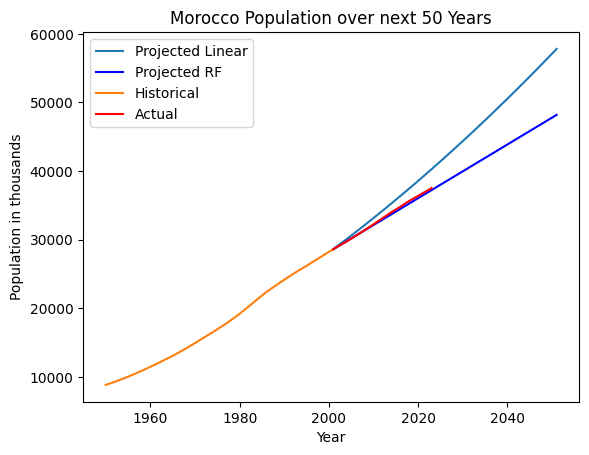

Sudan
2623     1950
2860     1951
3097     1952
3334     1953
3571     1954
3808     1955
4045     1956
4356     1957
4593     1958
4904     1959
5141     1960
5378     1961
5689     1962
6000     1963
6237     1964
6474     1965
6711     1966
6948     1967
7333     1968
7570     1969
7881     1970
8118     1971
8355     1972
8666     1973
8903     1974
9214     1975
9451     1976
9688     1977
9925     1978
10236    1979
10473    1980
10710    1981
10947    1982
11184    1983
11569    1984
11806    1985
12043    1986
12280    1987
12591    1988
12828    1989
13065    1990
13302    1991
13613    1992
13850    1993
14087    1994
14324    1995
14561    1996
14872    1997
15109    1998
15346    1999
15731    2000
15968    2001
Name: Year, dtype: int64
Sudan Linear RMSE: 2050.9521839627987
Sudan RF RMSE: 2725.3715113098806


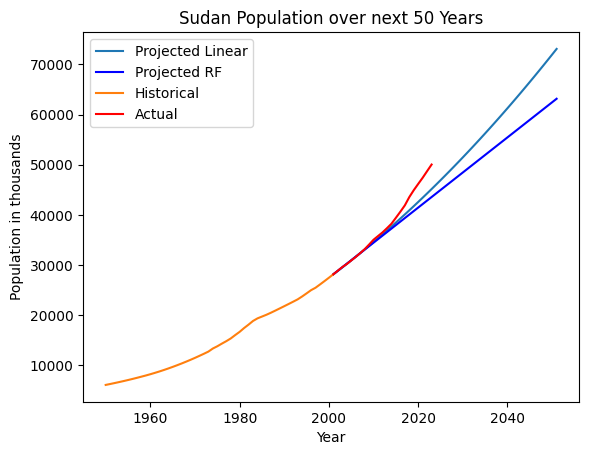

Tunisia
2624     1950
2861     1951
3098     1952
3335     1953
3572     1954
3809     1955
4046     1956
4357     1957
4594     1958
4905     1959
5142     1960
5379     1961
5690     1962
6001     1963
6238     1964
6475     1965
6712     1966
6949     1967
7334     1968
7571     1969
7882     1970
8119     1971
8356     1972
8667     1973
8904     1974
9215     1975
9452     1976
9689     1977
9926     1978
10237    1979
10474    1980
10711    1981
10948    1982
11185    1983
11570    1984
11807    1985
12044    1986
12281    1987
12592    1988
12829    1989
13066    1990
13303    1991
13614    1992
13851    1993
14088    1994
14325    1995
14562    1996
14873    1997
15110    1998
15347    1999
15732    2000
15969    2001
Name: Year, dtype: int64
Tunisia Linear RMSE: 1104.1206695544045
Tunisia RF RMSE: 62.48242580962361


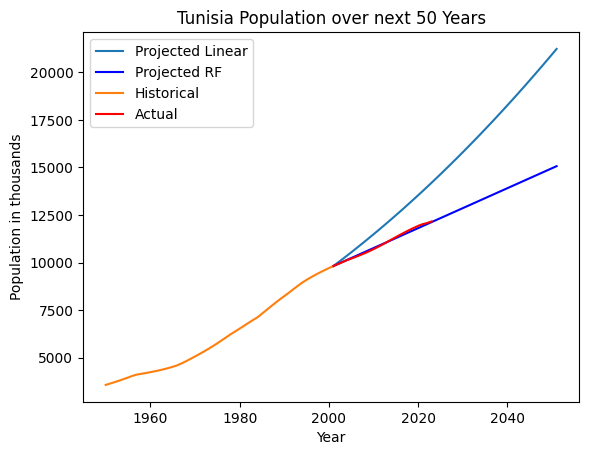

Western Sahara
2625     1950
2862     1951
3099     1952
3336     1953
3573     1954
3810     1955
4047     1956
4358     1957
4595     1958
4906     1959
5143     1960
5380     1961
5691     1962
6002     1963
6239     1964
6476     1965
6713     1966
6950     1967
7335     1968
7572     1969
7883     1970
8120     1971
8357     1972
8668     1973
8905     1974
9216     1975
9453     1976
9690     1977
9927     1978
10238    1979
10475    1980
10712    1981
10949    1982
11186    1983
11571    1984
11808    1985
12045    1986
12282    1987
12593    1988
12830    1989
13067    1990
13304    1991
13615    1992
13852    1993
14089    1994
14326    1995
14563    1996
14874    1997
15111    1998
15348    1999
15733    2000
15970    2001
Name: Year, dtype: int64
Western Sahara Linear RMSE: 23.334354511833265
Western Sahara RF RMSE: 10.264694794928033


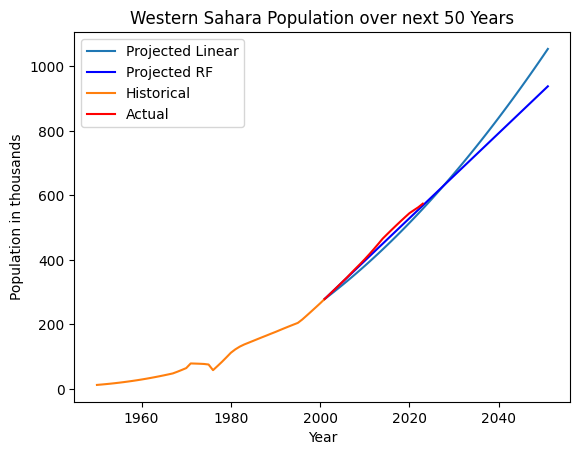

Botswana
2626     1950
2863     1951
3100     1952
3337     1953
3574     1954
3811     1955
4048     1956
4359     1957
4596     1958
4907     1959
5144     1960
5381     1961
5692     1962
6003     1963
6240     1964
6477     1965
6714     1966
6951     1967
7336     1968
7573     1969
7884     1970
8121     1971
8358     1972
8669     1973
8906     1974
9217     1975
9454     1976
9691     1977
9928     1978
10239    1979
10476    1980
10713    1981
10950    1982
11187    1983
11572    1984
11809    1985
12046    1986
12283    1987
12594    1988
12831    1989
13068    1990
13305    1991
13616    1992
13853    1993
14090    1994
14327    1995
14564    1996
14875    1997
15112    1998
15349    1999
15734    2000
15971    2001
Name: Year, dtype: int64
Botswana Linear RMSE: 222.35803005192352
Botswana RF RMSE: 8.025394143651525


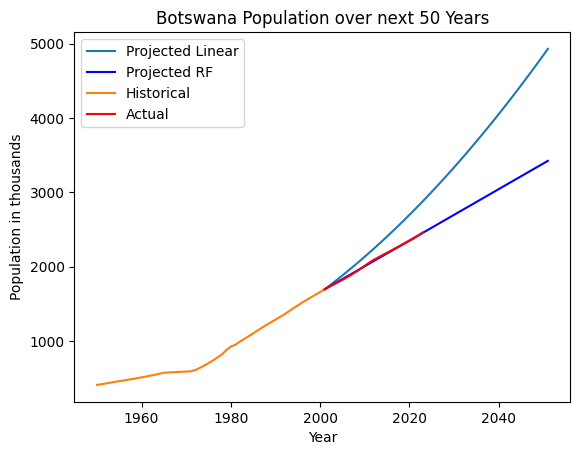

Eswatini
2627     1950
2864     1951
3101     1952
3338     1953
3575     1954
3812     1955
4049     1956
4360     1957
4597     1958
4908     1959
5145     1960
5382     1961
5693     1962
6004     1963
6241     1964
6478     1965
6715     1966
6952     1967
7337     1968
7574     1969
7885     1970
8122     1971
8359     1972
8670     1973
8907     1974
9218     1975
9455     1976
9692     1977
9929     1978
10240    1979
10477    1980
10714    1981
10951    1982
11188    1983
11573    1984
11810    1985
12047    1986
12358    1987
12595    1988
12832    1989
13069    1990
13306    1991
13617    1992
13854    1993
14091    1994
14328    1995
14565    1996
14876    1997
15113    1998
15350    1999
15735    2000
15972    2001
Name: Year, dtype: int64
Eswatini Linear RMSE: 240.36234731023285
Eswatini RF RMSE: 30.61963212846516


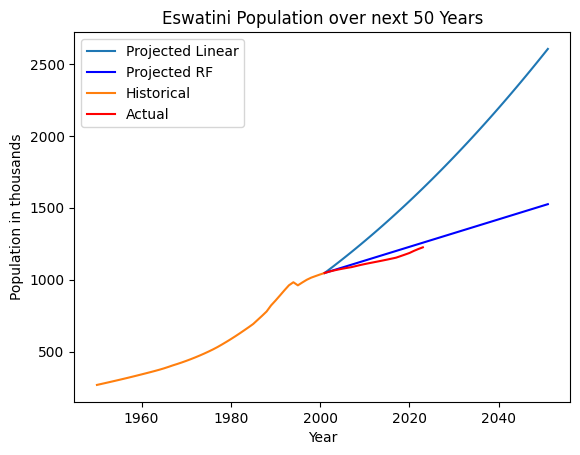

Lesotho
2628     1950
2865     1951
3102     1952
3339     1953
3576     1954
3813     1955
4050     1956
4361     1957
4598     1958
4909     1959
5146     1960
5383     1961
5694     1962
6005     1963
6242     1964
6479     1965
6716     1966
6953     1967
7338     1968
7575     1969
7886     1970
8123     1971
8360     1972
8671     1973
8908     1974
9219     1975
9456     1976
9693     1977
9930     1978
10241    1979
10478    1980
10715    1981
10952    1982
11189    1983
11574    1984
11811    1985
12048    1986
12359    1987
12596    1988
12833    1989
13070    1990
13307    1991
13618    1992
13855    1993
14092    1994
14329    1995
14566    1996
14877    1997
15114    1998
15351    1999
15736    2000
15973    2001
Name: Year, dtype: int64
Lesotho Linear RMSE: 280.68917668398797
Lesotho RF RMSE: 163.65156495667475


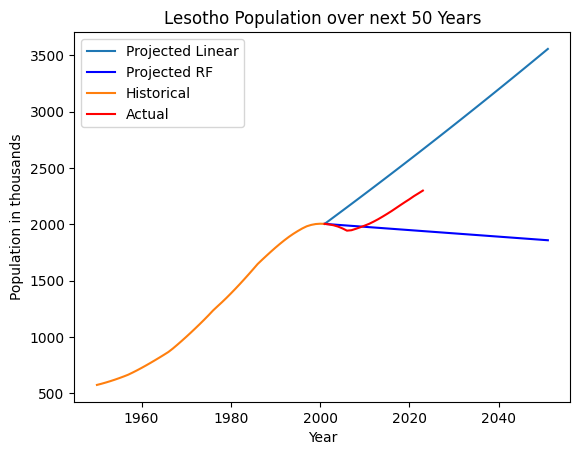

Namibia
2629     1950
2866     1951
3103     1952
3340     1953
3577     1954
3814     1955
4051     1956
4362     1957
4599     1958
4910     1959
5147     1960
5384     1961
5695     1962
6006     1963
6243     1964
6480     1965
6717     1966
6954     1967
7339     1968
7576     1969
7887     1970
8124     1971
8361     1972
8672     1973
8909     1974
9220     1975
9457     1976
9694     1977
9931     1978
10242    1979
10479    1980
10716    1981
10953    1982
11190    1983
11575    1984
11812    1985
12049    1986
12360    1987
12597    1988
12834    1989
13071    1990
13308    1991
13619    1992
13856    1993
14093    1994
14330    1995
14567    1996
14878    1997
15115    1998
15352    1999
15737    2000
15974    2001
Name: Year, dtype: int64
Namibia Linear RMSE: 230.3893220414932
Namibia RF RMSE: 98.23487697756791


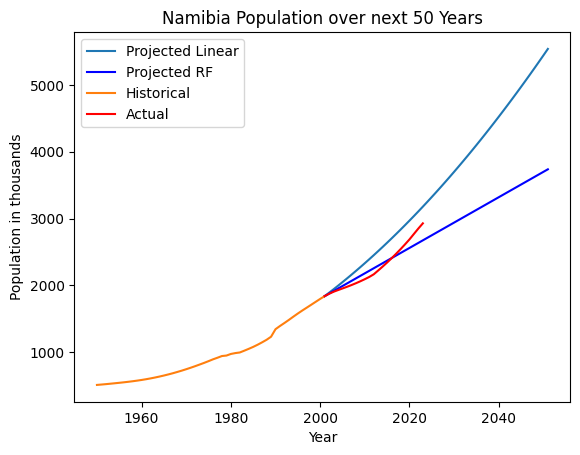

South Africa
2630     1950
2867     1951
3104     1952
3341     1953
3578     1954
3815     1955
4052     1956
4363     1957
4600     1958
4911     1959
5148     1960
5385     1961
5696     1962
6007     1963
6244     1964
6481     1965
6718     1966
6955     1967
7340     1968
7577     1969
7888     1970
8125     1971
8436     1972
8673     1973
8910     1974
9221     1975
9458     1976
9695     1977
9932     1978
10243    1979
10480    1980
10717    1981
10954    1982
11191    1983
11576    1984
11813    1985
12050    1986
12361    1987
12598    1988
12835    1989
13072    1990
13309    1991
13620    1992
13857    1993
14094    1994
14331    1995
14568    1996
14879    1997
15116    1998
15353    1999
15738    2000
15975    2001
Name: Year, dtype: int64
South Africa Linear RMSE: 4597.893233668744
South Africa RF RMSE: 2886.7760009794843


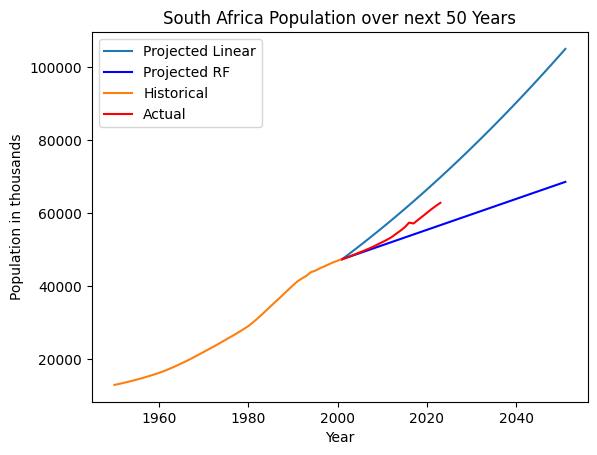

Benin
2631     1950
2868     1951
3105     1952
3342     1953
3579     1954
3816     1955
4053     1956
4364     1957
4601     1958
4912     1959
5149     1960
5386     1961
5697     1962
6008     1963
6245     1964
6482     1965
6719     1966
6956     1967
7341     1968
7578     1969
7889     1970
8126     1971
8437     1972
8674     1973
8911     1974
9222     1975
9459     1976
9696     1977
9933     1978
10244    1979
10481    1980
10718    1981
10955    1982
11192    1983
11577    1984
11814    1985
12051    1986
12362    1987
12599    1988
12836    1989
13073    1990
13310    1991
13621    1992
13858    1993
14095    1994
14332    1995
14569    1996
14880    1997
15117    1998
15354    1999
15739    2000
15976    2001
Name: Year, dtype: int64
Benin Linear RMSE: 508.2609312539689
Benin RF RMSE: 804.7184341215266


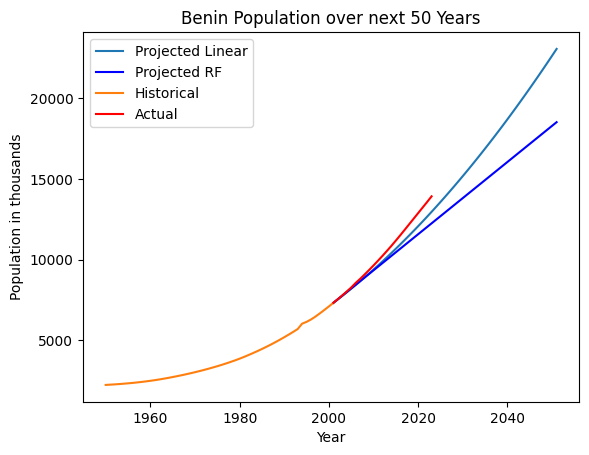

Burkina Faso
2632     1950
2869     1951
3106     1952
3343     1953
3580     1954
3817     1955
4054     1956
4365     1957
4602     1958
4913     1959
5150     1960
5387     1961
5698     1962
6009     1963
6246     1964
6483     1965
6720     1966
6957     1967
7342     1968
7579     1969
7890     1970
8127     1971
8438     1972
8675     1973
8912     1974
9223     1975
9460     1976
9697     1977
9934     1978
10245    1979
10482    1980
10719    1981
10956    1982
11193    1983
11578    1984
11815    1985
12052    1986
12363    1987
12600    1988
12837    1989
13074    1990
13311    1991
13622    1992
13859    1993
14096    1994
14333    1995
14570    1996
14881    1997
15118    1998
15355    1999
15740    2000
15977    2001
Name: Year, dtype: int64
Burkina Faso Linear RMSE: 1307.2682134975582
Burkina Faso RF RMSE: 1287.4755286514546


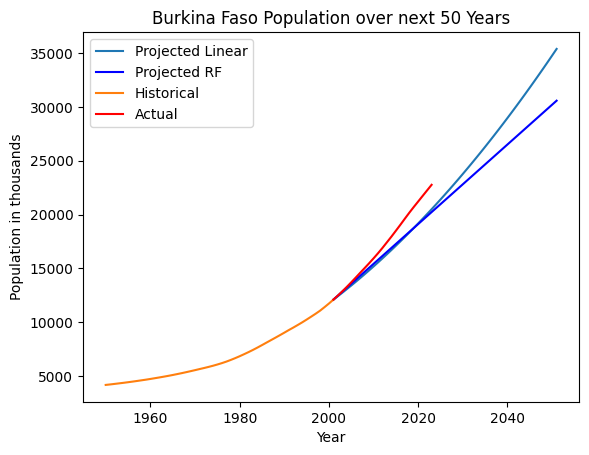

Cabo Verde
2633     1950
2870     1951
3107     1952
3344     1953
3581     1954
3818     1955
4055     1956
4366     1957
4603     1958
4914     1959
5151     1960
5388     1961
5699     1962
6010     1963
6247     1964
6484     1965
6721     1966
6958     1967
7343     1968
7580     1969
7891     1970
8128     1971
8439     1972
8676     1973
8913     1974
9224     1975
9461     1976
9698     1977
9935     1978
10246    1979
10483    1980
10720    1981
10957    1982
11194    1983
11579    1984
11816    1985
12053    1986
12364    1987
12601    1988
12838    1989
13075    1990
13312    1991
13623    1992
13860    1993
14097    1994
14334    1995
14571    1996
14882    1997
15119    1998
15356    1999
15741    2000
15978    2001
Name: Year, dtype: int64
Cabo Verde Linear RMSE: 59.55881392671893
Cabo Verde RF RMSE: 44.41510060543302


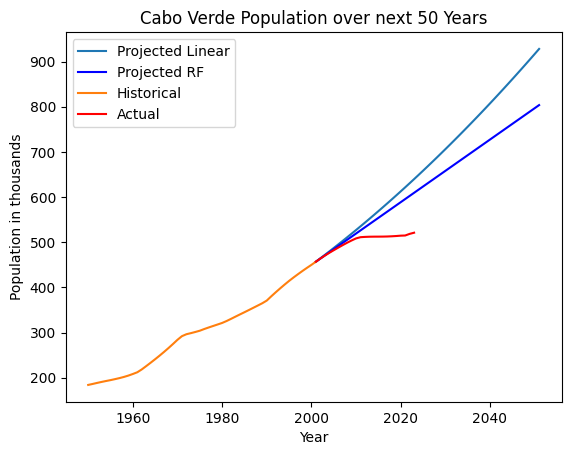

Côte d'Ivoire
2634     1950
2871     1951
3108     1952
3345     1953
3582     1954
3819     1955
4056     1956
4367     1957
4604     1958
4915     1959
5152     1960
5389     1961
5700     1962
6011     1963
6248     1964
6485     1965
6722     1966
6959     1967
7344     1968
7581     1969
7892     1970
8129     1971
8440     1972
8677     1973
8914     1974
9225     1975
9462     1976
9699     1977
9936     1978
10247    1979
10484    1980
10721    1981
10958    1982
11195    1983
11580    1984
11817    1985
12054    1986
12365    1987
12602    1988
12839    1989
13076    1990
13313    1991
13624    1992
13861    1993
14098    1994
14335    1995
14572    1996
14883    1997
15120    1998
15357    1999
15742    2000
15979    2001
Name: Year, dtype: int64
Côte d'Ivoire Linear RMSE: 1781.9593291288168
Côte d'Ivoire RF RMSE: 838.3223282910659


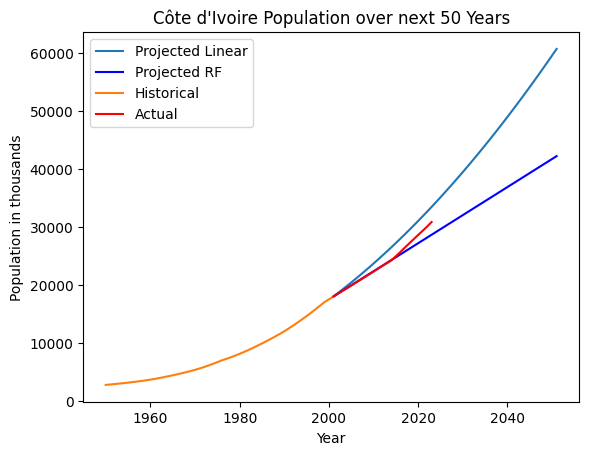

Gambia
2635     1950
2872     1951
3109     1952
3346     1953
3583     1954
3820     1955
4057     1956
4368     1957
4605     1958
4916     1959
5153     1960
5390     1961
5701     1962
6012     1963
6249     1964
6486     1965
6723     1966
6960     1967
7345     1968
7582     1969
7893     1970
8130     1971
8441     1972
8678     1973
8915     1974
9226     1975
9463     1976
9700     1977
9937     1978
10248    1979
10485    1980
10722    1981
10959    1982
11196    1983
11581    1984
11818    1985
12055    1986
12366    1987
12603    1988
12840    1989
13077    1990
13314    1991
13625    1992
13862    1993
14099    1994
14336    1995
14573    1996
14884    1997
15121    1998
15358    1999
15743    2000
15980    2001
Name: Year, dtype: int64
Gambia Linear RMSE: 18.145052158893673
Gambia RF RMSE: 158.70604345725604


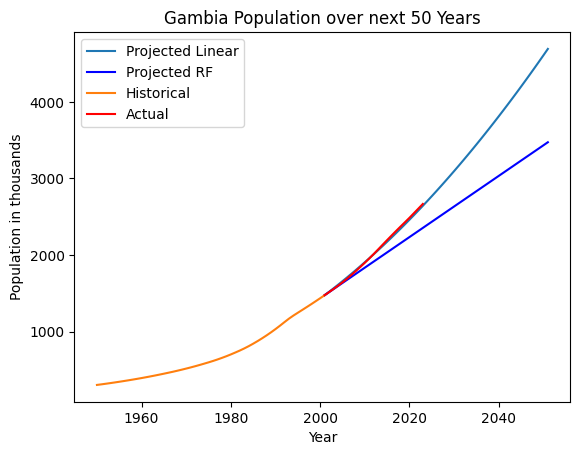

Ghana
2636     1950
2873     1951
3110     1952
3347     1953
3584     1954
3821     1955
4058     1956
4369     1957
4606     1958
4917     1959
5154     1960
5391     1961
5702     1962
6013     1963
6250     1964
6487     1965
6724     1966
6961     1967
7346     1968
7583     1969
7894     1970
8131     1971
8442     1972
8679     1973
8916     1974
9227     1975
9464     1976
9701     1977
9938     1978
10249    1979
10486    1980
10723    1981
10960    1982
11197    1983
11582    1984
11819    1985
12056    1986
12367    1987
12604    1988
12841    1989
13078    1990
13315    1991
13626    1992
13863    1993
14100    1994
14337    1995
14574    1996
14885    1997
15122    1998
15359    1999
15744    2000
15981    2001
Name: Year, dtype: int64
Ghana Linear RMSE: 1127.5381938437445
Ghana RF RMSE: 987.4934040787181


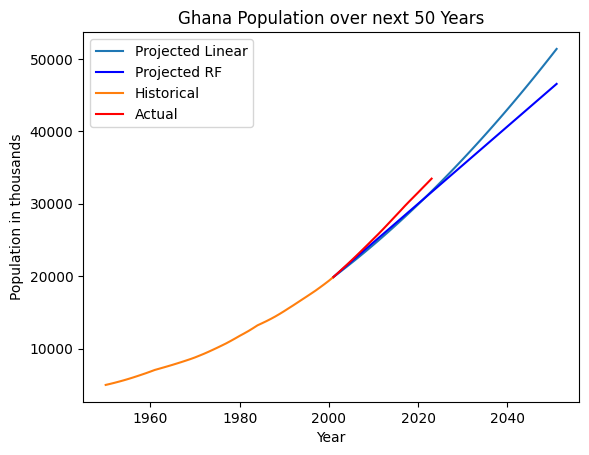

Guinea
2637     1950
2874     1951
3111     1952
3348     1953
3585     1954
3822     1955
4059     1956
4370     1957
4607     1958
4918     1959
5155     1960
5392     1961
5703     1962
6014     1963
6251     1964
6488     1965
6725     1966
6962     1967
7347     1968
7584     1969
7895     1970
8132     1971
8443     1972
8680     1973
8917     1974
9228     1975
9465     1976
9702     1977
9939     1978
10250    1979
10487    1980
10724    1981
10961    1982
11198    1983
11583    1984
11820    1985
12057    1986
12368    1987
12605    1988
12842    1989
13079    1990
13316    1991
13627    1992
13864    1993
14101    1994
14338    1995
14575    1996
14886    1997
15123    1998
15360    1999
15745    2000
15982    2001
Name: Year, dtype: int64
Guinea Linear RMSE: 337.5745850274903
Guinea RF RMSE: 1727.3930464094838


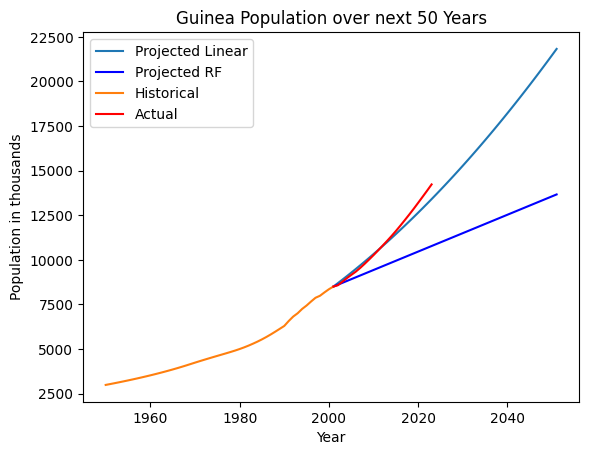

Guinea-Bissau
2638     1950
2875     1951
3112     1952
3349     1953
3586     1954
3823     1955
4060     1956
4371     1957
4608     1958
4919     1959
5156     1960
5393     1961
5704     1962
6015     1963
6252     1964
6489     1965
6726     1966
6963     1967
7348     1968
7585     1969
7896     1970
8133     1971
8444     1972
8681     1973
8918     1974
9229     1975
9466     1976
9703     1977
9940     1978
10251    1979
10488    1980
10725    1981
10962    1982
11199    1983
11584    1984
11821    1985
12058    1986
12369    1987
12606    1988
12843    1989
13080    1990
13317    1991
13628    1992
13865    1993
14102    1994
14339    1995
14576    1996
14887    1997
15124    1998
15361    1999
15746    2000
15983    2001
Name: Year, dtype: int64
Guinea-Bissau Linear RMSE: 53.11235211069197
Guinea-Bissau RF RMSE: 150.2137869427642


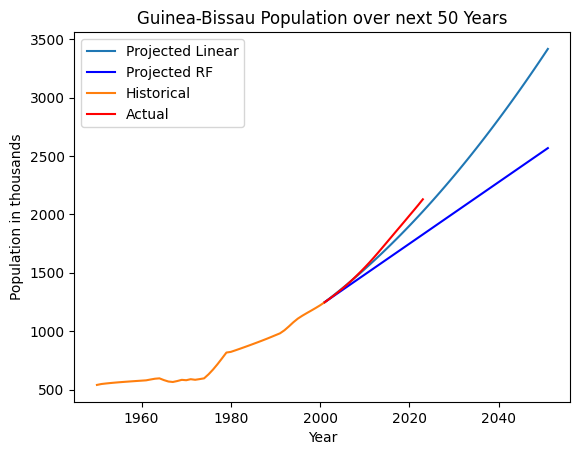

Liberia
2639     1950
2876     1951
3113     1952
3350     1953
3587     1954
3824     1955
4061     1956
4372     1957
4609     1958
4920     1959
5157     1960
5394     1961
5705     1962
6016     1963
6253     1964
6490     1965
6727     1966
6964     1967
7349     1968
7586     1969
7897     1970
8134     1971
8445     1972
8682     1973
8919     1974
9230     1975
9467     1976
9704     1977
9941     1978
10252    1979
10489    1980
10726    1981
10963    1982
11200    1983
11585    1984
11822    1985
12059    1986
12370    1987
12607    1988
12844    1989
13081    1990
13318    1991
13629    1992
13866    1993
14103    1994
14340    1995
14577    1996
14888    1997
15125    1998
15362    1999
15747    2000
15984    2001
Name: Year, dtype: int64
Liberia Linear RMSE: 445.34839570882707
Liberia RF RMSE: 232.41180582699909


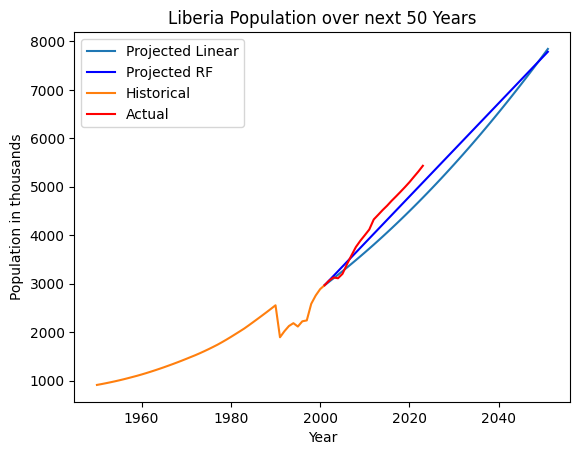

Mali
2640     1950
2877     1951
3114     1952
3351     1953
3588     1954
3825     1955
4062     1956
4373     1957
4610     1958
4921     1959
5158     1960
5395     1961
5706     1962
6017     1963
6254     1964
6491     1965
6728     1966
6965     1967
7350     1968
7587     1969
7898     1970
8135     1971
8446     1972
8683     1973
8920     1974
9231     1975
9468     1976
9705     1977
9942     1978
10253    1979
10490    1980
10727    1981
10964    1982
11201    1983
11586    1984
11823    1985
12060    1986
12371    1987
12608    1988
12845    1989
13082    1990
13319    1991
13630    1992
13867    1993
14104    1994
14341    1995
14578    1996
14889    1997
15126    1998
15363    1999
15748    2000
15985    2001
Name: Year, dtype: int64
Mali Linear RMSE: 2532.7545565885503
Mali RF RMSE: 1843.3663420074058


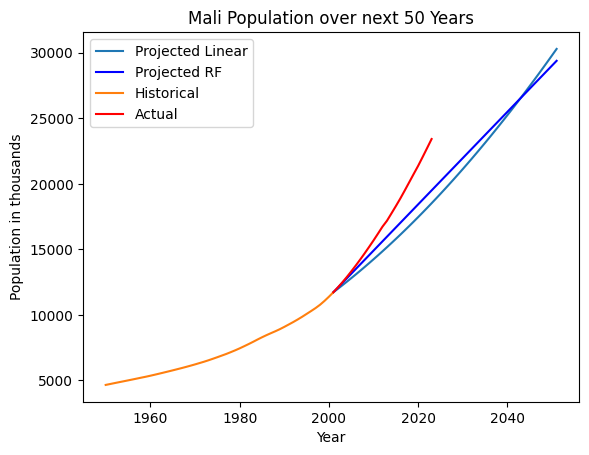

Mauritania
2641     1950
2878     1951
3115     1952
3352     1953
3589     1954
3826     1955
4063     1956
4374     1957
4611     1958
4922     1959
5159     1960
5396     1961
5707     1962
6018     1963
6255     1964
6492     1965
6729     1966
6966     1967
7351     1968
7588     1969
7899     1970
8136     1971
8447     1972
8684     1973
8921     1974
9232     1975
9469     1976
9706     1977
9943     1978
10254    1979
10491    1980
10728    1981
10965    1982
11202    1983
11587    1984
11824    1985
12061    1986
12372    1987
12609    1988
12846    1989
13083    1990
13320    1991
13631    1992
13868    1993
14105    1994
14342    1995
14579    1996
14890    1997
15127    1998
15364    1999
15749    2000
15986    2001
Name: Year, dtype: int64
Mauritania Linear RMSE: 219.04663866674497
Mauritania RF RMSE: 427.6096855872591


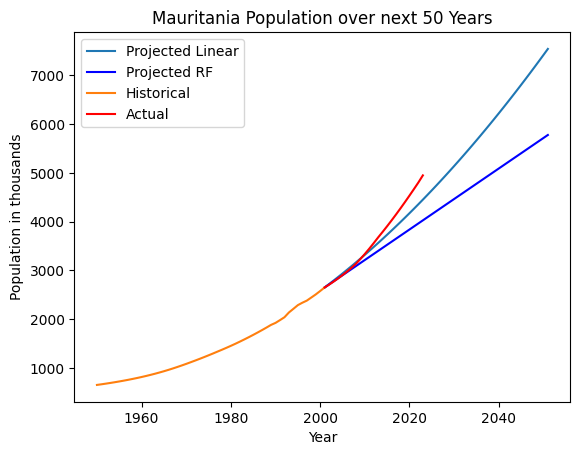

Niger
2642     1950
2879     1951
3116     1952
3353     1953
3590     1954
3827     1955
4064     1956
4375     1957
4612     1958
4923     1959
5160     1960
5397     1961
5708     1962
6019     1963
6256     1964
6493     1965
6730     1966
6967     1967
7352     1968
7589     1969
7900     1970
8137     1971
8448     1972
8685     1973
8922     1974
9233     1975
9470     1976
9707     1977
9944     1978
10255    1979
10492    1980
10729    1981
10966    1982
11203    1983
11588    1984
11825    1985
12062    1986
12373    1987
12610    1988
12847    1989
13084    1990
13321    1991
13632    1992
13869    1993
14106    1994
14343    1995
14580    1996
14891    1997
15128    1998
15365    1999
15750    2000
15987    2001
Name: Year, dtype: int64
Niger Linear RMSE: 2613.699710551216
Niger RF RMSE: 2351.5348557704483


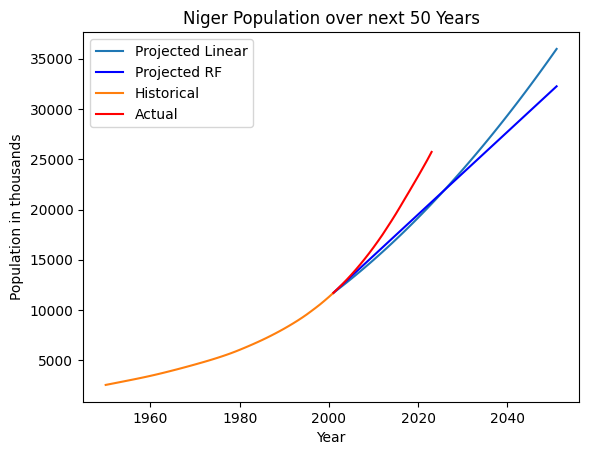

Nigeria
2643     1950
2880     1951
3117     1952
3354     1953
3591     1954
3828     1955
4065     1956
4376     1957
4613     1958
4924     1959
5161     1960
5398     1961
5709     1962
6020     1963
6257     1964
6494     1965
6731     1966
6968     1967
7353     1968
7590     1969
7901     1970
8138     1971
8449     1972
8686     1973
8923     1974
9234     1975
9471     1976
9708     1977
9945     1978
10256    1979
10493    1980
10730    1981
10967    1982
11204    1983
11589    1984
11826    1985
12063    1986
12374    1987
12611    1988
12848    1989
13085    1990
13322    1991
13633    1992
13870    1993
14107    1994
14344    1995
14581    1996
14892    1997
15129    1998
15366    1999
15751    2000
15988    2001
Name: Year, dtype: int64
Nigeria Linear RMSE: 7394.657129621576
Nigeria RF RMSE: 11089.102700611558


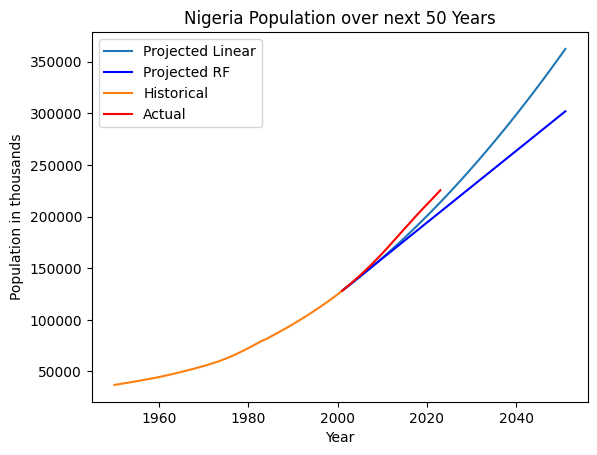

Saint Helena
2644     1950
2881     1951
3118     1952
3355     1953
3592     1954
3829     1955
4066     1956
4377     1957
4614     1958
4925     1959
5162     1960
5399     1961
5710     1962
6021     1963
6258     1964
6495     1965
6732     1966
6969     1967
7354     1968
7591     1969
7902     1970
8139     1971
8450     1972
8687     1973
8924     1974
9235     1975
9472     1976
9709     1977
9946     1978
10257    1979
10494    1980
10731    1981
10968    1982
11205    1983
11590    1984
11827    1985
12064    1986
12375    1987
12612    1988
12849    1989
13086    1990
13323    1991
13634    1992
13871    1993
14108    1994
14345    1995
14582    1996
14893    1997
15130    1998
15367    1999
15752    2000
15989    2001
Name: Year, dtype: int64
Saint Helena Linear RMSE: 0.3225975927670953
Saint Helena RF RMSE: 0.5855777139231587


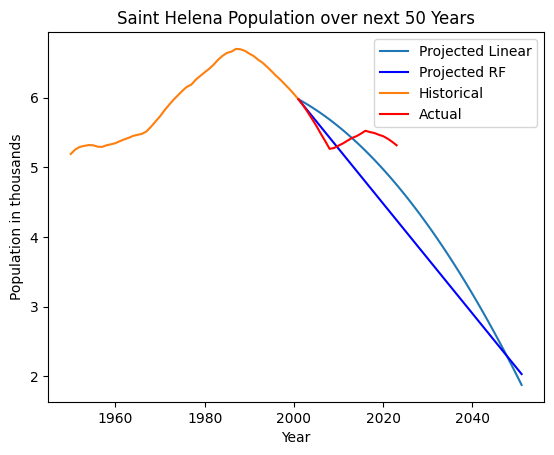

Senegal
2645     1950
2882     1951
3119     1952
3356     1953
3593     1954
3830     1955
4067     1956
4378     1957
4615     1958
4926     1959
5163     1960
5400     1961
5711     1962
6022     1963
6259     1964
6496     1965
6733     1966
6970     1967
7355     1968
7592     1969
7903     1970
8140     1971
8451     1972
8688     1973
8925     1974
9236     1975
9473     1976
9710     1977
9947     1978
10258    1979
10495    1980
10732    1981
10969    1982
11206    1983
11591    1984
11828    1985
12065    1986
12376    1987
12613    1988
12850    1989
13087    1990
13324    1991
13635    1992
13872    1993
14109    1994
14346    1995
14583    1996
14894    1997
15131    1998
15368    1999
15753    2000
15990    2001
Name: Year, dtype: int64
Senegal Linear RMSE: 676.0735045093621
Senegal RF RMSE: 1089.2832166784522


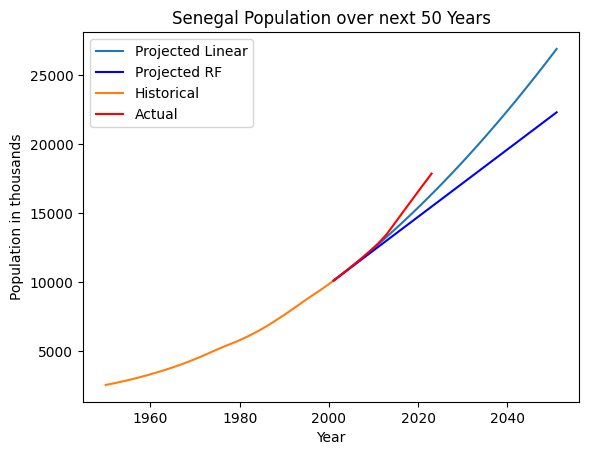

Sierra Leone
2646     1950
2883     1951
3120     1952
3357     1953
3594     1954
3831     1955
4068     1956
4379     1957
4616     1958
4927     1959
5164     1960
5401     1961
5712     1962
6023     1963
6260     1964
6497     1965
6734     1966
6971     1967
7356     1968
7593     1969
7904     1970
8141     1971
8452     1972
8689     1973
8926     1974
9237     1975
9474     1976
9711     1977
9948     1978
10259    1979
10496    1980
10733    1981
10970    1982
11207    1983
11592    1984
11829    1985
12066    1986
12377    1987
12614    1988
12851    1989
13088    1990
13325    1991
13636    1992
13873    1993
14110    1994
14347    1995
14584    1996
14895    1997
15132    1998
15369    1999
15754    2000
15991    2001
Name: Year, dtype: int64
Sierra Leone Linear RMSE: 969.8279893437629
Sierra Leone RF RMSE: 1226.0659649307943


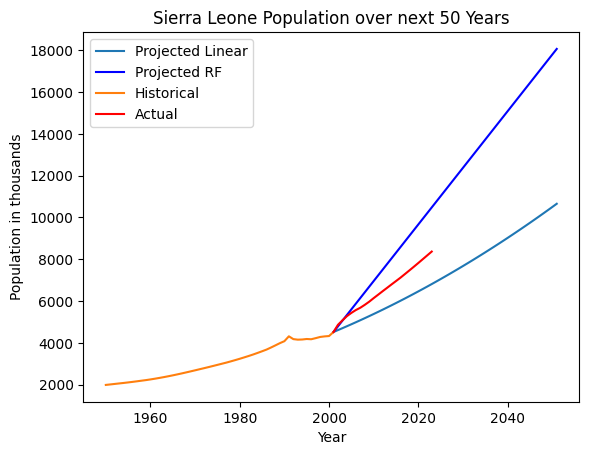

Togo
2647     1950
2884     1951
3121     1952
3358     1953
3595     1954
3832     1955
4069     1956
4380     1957
4617     1958
4928     1959
5165     1960
5476     1961
5713     1962
6024     1963
6261     1964
6498     1965
6735     1966
6972     1967
7357     1968
7594     1969
7905     1970
8142     1971
8453     1972
8690     1973
8927     1974
9238     1975
9475     1976
9712     1977
9949     1978
10260    1979
10497    1980
10734    1981
10971    1982
11208    1983
11593    1984
11830    1985
12067    1986
12378    1987
12615    1988
12852    1989
13089    1990
13326    1991
13637    1992
13874    1993
14111    1994
14348    1995
14585    1996
14896    1997
15133    1998
15370    1999
15755    2000
15992    2001
Name: Year, dtype: int64
Togo Linear RMSE: 222.52494663021426
Togo RF RMSE: 468.38228230656284


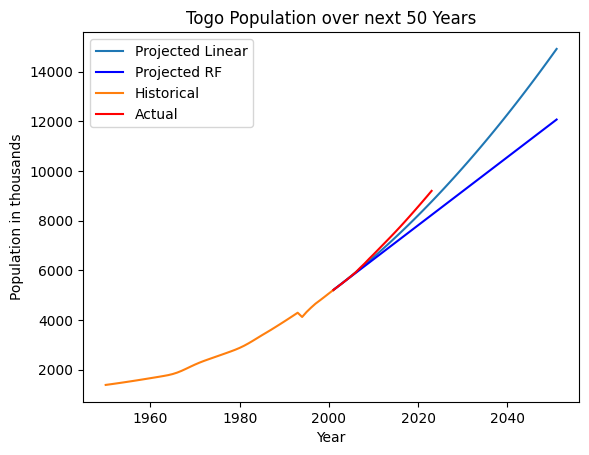

Kazakhstan
2648     1950
2885     1951
3122     1952
3359     1953
3596     1954
3833     1955
4144     1956
4381     1957
4618     1958
4929     1959
5166     1960
5477     1961
5714     1962
6025     1963
6262     1964
6499     1965
6736     1966
6973     1967
7358     1968
7595     1969
7906     1970
8143     1971
8454     1972
8691     1973
8928     1974
9239     1975
9476     1976
9713     1977
9950     1978
10261    1979
10498    1980
10735    1981
10972    1982
11209    1983
11594    1984
11831    1985
12068    1986
12379    1987
12616    1988
12853    1989
13090    1990
13327    1991
13638    1992
13875    1993
14112    1994
14349    1995
14586    1996
14897    1997
15134    1998
15371    1999
15756    2000
15993    2001
Name: Year, dtype: int64
Kazakhstan Linear RMSE: 4061.110883760804
Kazakhstan RF RMSE: 1697.69272053242


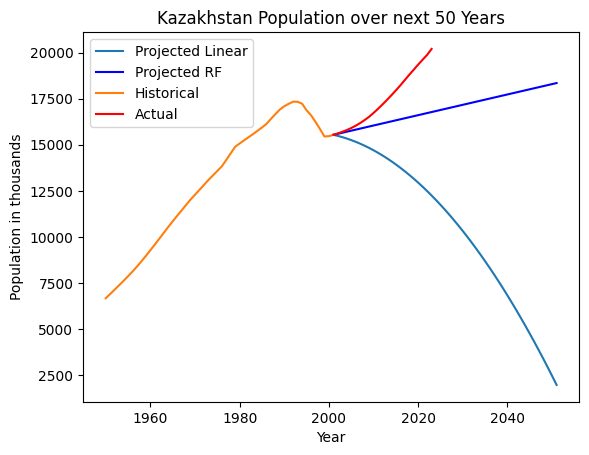

Kyrgyzstan
2649     1950
2886     1951
3123     1952
3360     1953
3597     1954
3834     1955
4145     1956
4382     1957
4619     1958
4930     1959
5167     1960
5478     1961
5715     1962
6026     1963
6263     1964
6500     1965
6737     1966
6974     1967
7359     1968
7596     1969
7907     1970
8144     1971
8455     1972
8692     1973
8929     1974
9240     1975
9477     1976
9714     1977
9951     1978
10262    1979
10499    1980
10736    1981
10973    1982
11210    1983
11595    1984
11832    1985
12069    1986
12380    1987
12617    1988
12854    1989
13091    1990
13328    1991
13639    1992
13876    1993
14113    1994
14350    1995
14587    1996
14898    1997
15135    1998
15372    1999
15757    2000
15994    2001
Name: Year, dtype: int64
Kyrgyzstan Linear RMSE: 191.9744353409519
Kyrgyzstan RF RMSE: 371.96055797824454


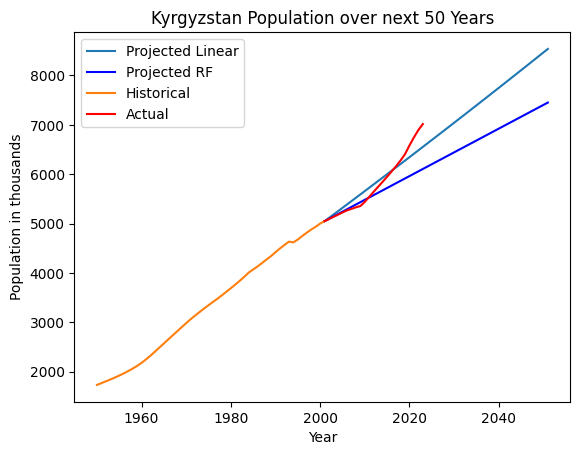

Tajikistan
2650     1950
2887     1951
3124     1952
3361     1953
3598     1954
3835     1955
4146     1956
4383     1957
4620     1958
4931     1959
5168     1960
5479     1961
5716     1962
6027     1963
6264     1964
6501     1965
6738     1966
6975     1967
7360     1968
7597     1969
7908     1970
8145     1971
8456     1972
8693     1973
8930     1974
9241     1975
9478     1976
9715     1977
9952     1978
10263    1979
10500    1980
10737    1981
10974    1982
11211    1983
11596    1984
11833    1985
12070    1986
12381    1987
12618    1988
12855    1989
13092    1990
13329    1991
13640    1992
13877    1993
14114    1994
14351    1995
14588    1996
14899    1997
15136    1998
15373    1999
15758    2000
15995    2001
Name: Year, dtype: int64
Tajikistan Linear RMSE: 411.22744626472416
Tajikistan RF RMSE: 709.8188753113657


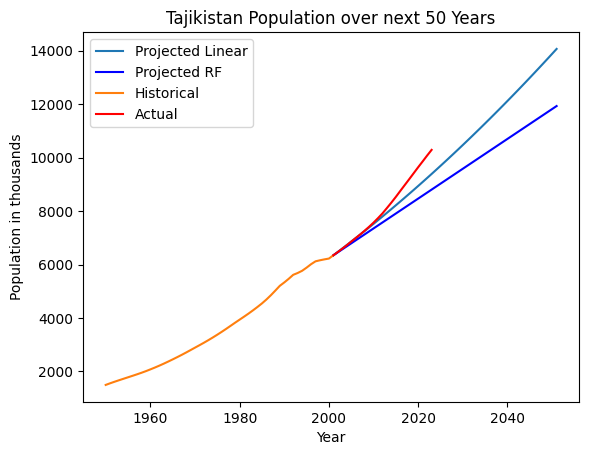

Turkmenistan
2651     1950
2888     1951
3125     1952
3362     1953
3599     1954
3836     1955
4147     1956
4384     1957
4621     1958
4932     1959
5169     1960
5480     1961
5717     1962
6028     1963
6265     1964
6502     1965
6739     1966
6976     1967
7361     1968
7598     1969
7909     1970
8146     1971
8457     1972
8694     1973
8931     1974
9242     1975
9479     1976
9716     1977
9953     1978
10264    1979
10501    1980
10738    1981
10975    1982
11212    1983
11597    1984
11834    1985
12071    1986
12382    1987
12619    1988
12856    1989
13093    1990
13330    1991
13641    1992
13878    1993
14115    1994
14352    1995
14589    1996
14900    1997
15137    1998
15374    1999
15759    2000
15996    2001
Name: Year, dtype: int64
Turkmenistan Linear RMSE: 78.43938249363363
Turkmenistan RF RMSE: 291.75274510469774


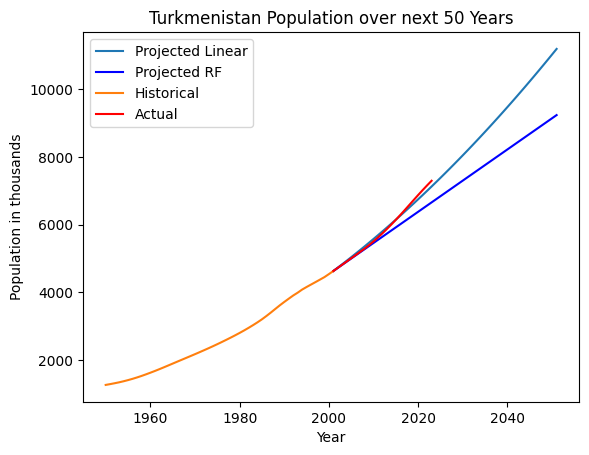

Uzbekistan
2652     1950
2889     1951
3126     1952
3363     1953
3600     1954
3837     1955
4148     1956
4385     1957
4622     1958
4933     1959
5170     1960
5481     1961
5718     1962
6029     1963
6266     1964
6503     1965
6740     1966
6977     1967
7362     1968
7599     1969
7910     1970
8147     1971
8458     1972
8695     1973
8932     1974
9243     1975
9480     1976
9717     1977
9954     1978
10265    1979
10502    1980
10739    1981
10976    1982
11213    1983
11598    1984
11835    1985
12072    1986
12383    1987
12620    1988
12857    1989
13094    1990
13331    1991
13642    1992
13879    1993
14116    1994
14353    1995
14590    1996
14901    1997
15138    1998
15375    1999
15760    2000
15997    2001
Name: Year, dtype: int64
Uzbekistan Linear RMSE: 1652.8383853160226
Uzbekistan RF RMSE: 1536.6257863356482


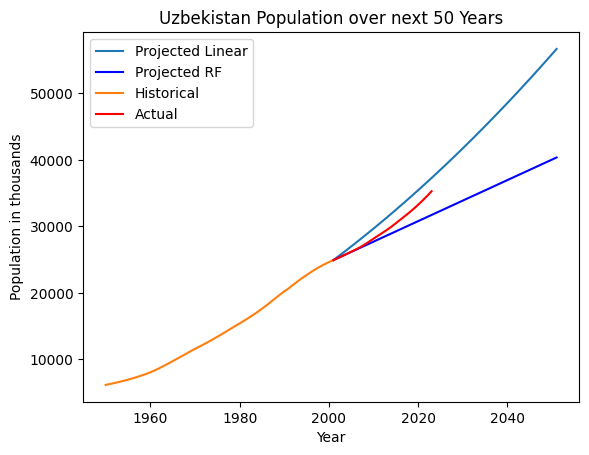

China
2653     1950
2890     1951
3127     1952
3364     1953
3601     1954
3838     1955
4149     1956
4386     1957
4623     1958
4934     1959
5171     1960
5482     1961
5719     1962
6030     1963
6267     1964
6504     1965
6741     1966
6978     1967
7363     1968
7600     1969
7911     1970
8148     1971
8459     1972
8696     1973
8933     1974
9244     1975
9481     1976
9718     1977
9955     1978
10266    1979
10503    1980
10740    1981
10977    1982
11214    1983
11599    1984
11836    1985
12073    1986
12384    1987
12621    1988
12858    1989
13095    1990
13332    1991
13643    1992
13880    1993
14117    1994
14354    1995
14591    1996
14902    1997
15139    1998
15376    1999
15761    2000
15998    2001
Name: Year, dtype: int64
China Linear RMSE: 82247.72763272982
China RF RMSE: 15260.96692728354


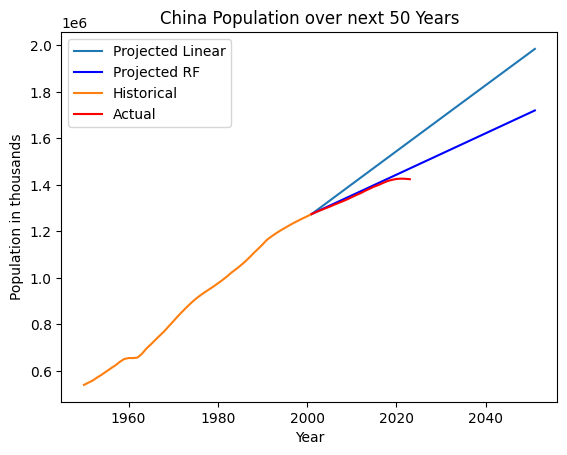

China, Hong Kong SAR
2654     1950
2891     1951
3128     1952
3365     1953
3602     1954
3839     1955
4150     1956
4387     1957
4624     1958
4935     1959
5172     1960
5483     1961
5720     1962
6031     1963
6268     1964
6505     1965
6742     1966
6979     1967
7364     1968
7601     1969
7912     1970
8149     1971
8460     1972
8697     1973
8934     1974
9245     1975
9482     1976
9719     1977
9956     1978
10267    1979
10504    1980
10741    1981
10978    1982
11215    1983
11600    1984
11837    1985
12074    1986
12385    1987
12622    1988
12859    1989
13096    1990
13333    1991
13644    1992
13881    1993
14118    1994
14355    1995
14592    1996
14903    1997
15140    1998
15377    1999
15762    2000
15999    2001
Name: Year, dtype: int64
China, Hong Kong SAR Linear RMSE: 666.0026405872799
China, Hong Kong SAR RF RMSE: 351.9484095434883


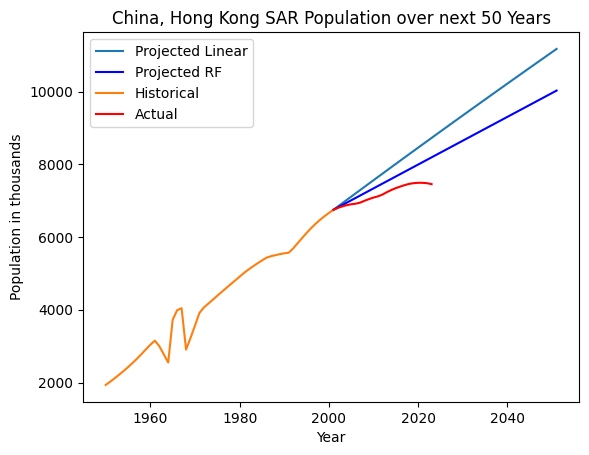

China, Macao SAR
2655     1950
2892     1951
3129     1952
3366     1953
3603     1954
3840     1955
4151     1956
4388     1957
4625     1958
4936     1959
5173     1960
5484     1961
5721     1962
6032     1963
6269     1964
6506     1965
6743     1966
6980     1967
7365     1968
7602     1969
7913     1970
8150     1971
8461     1972
8698     1973
8935     1974
9246     1975
9483     1976
9720     1977
9957     1978
10268    1979
10505    1980
10742    1981
10979    1982
11216    1983
11601    1984
11838    1985
12075    1986
12386    1987
12623    1988
12860    1989
13097    1990
13334    1991
13645    1992
13882    1993
14119    1994
14356    1995
14593    1996
14904    1997
15141    1998
15378    1999
15763    2000
16000    2001
Name: Year, dtype: int64
China, Macao SAR Linear RMSE: 9.055031205644957
China, Macao SAR RF RMSE: 54.95380236803658


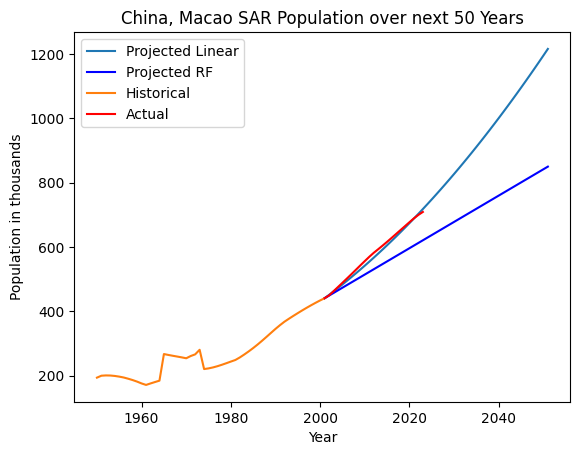

China, Taiwan Province of China
2656     1950
2893     1951
3130     1952
3367     1953
3604     1954
3841     1955
4152     1956
4389     1957
4626     1958
4937     1959
5174     1960
5485     1961
5722     1962
6033     1963
6270     1964
6507     1965
6744     1966
6981     1967
7366     1968
7603     1969
7914     1970
8151     1971
8462     1972
8699     1973
8936     1974
9247     1975
9484     1976
9721     1977
9958     1978
10269    1979
10506    1980
10743    1981
10980    1982
11217    1983
11602    1984
11839    1985
12076    1986
12387    1987
12624    1988
12861    1989
13098    1990
13335    1991
13646    1992
13883    1993
14120    1994
14357    1995
14594    1996
14905    1997
15142    1998
15379    1999
15764    2000
16001    2001
Name: Year, dtype: int64
China, Taiwan Province of China Linear RMSE: 772.0099962108791
China, Taiwan Province of China RF RMSE: 732.4331973842148


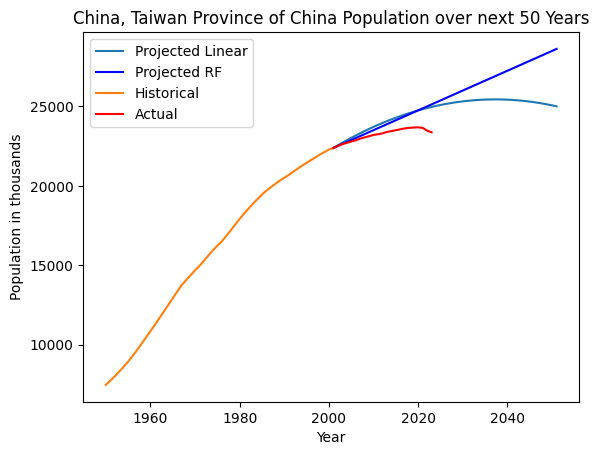

Dem. People's Republic of Korea
2657     1950
2894     1951
3131     1952
3368     1953
3605     1954
3842     1955
4153     1956
4390     1957
4627     1958
4938     1959
5175     1960
5486     1961
5723     1962
6034     1963
6271     1964
6508     1965
6745     1966
6982     1967
7367     1968
7604     1969
7915     1970
8152     1971
8463     1972
8700     1973
8937     1974
9248     1975
9485     1976
9722     1977
9959     1978
10270    1979
10507    1980
10744    1981
10981    1982
11218    1983
11603    1984
11840    1985
12077    1986
12388    1987
12625    1988
12862    1989
13099    1990
13336    1991
13647    1992
13884    1993
14121    1994
14358    1995
14595    1996
14906    1997
15143    1998
15380    1999
15765    2000
16002    2001
Name: Year, dtype: int64
Dem. People's Republic of Korea Linear RMSE: 3197.0273845622364
Dem. People's Republic of Korea RF RMSE: 324.12093710380117


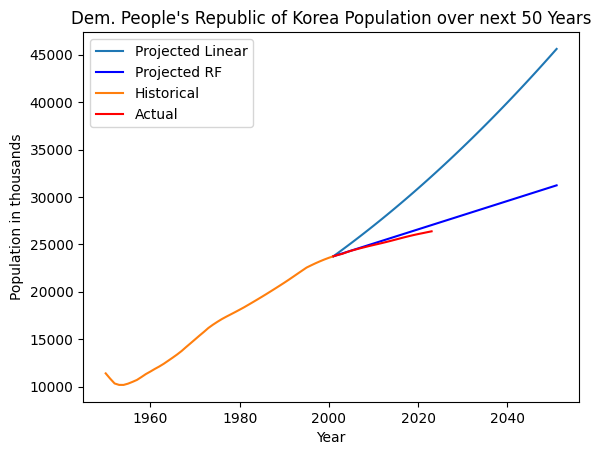

Japan
2658     1950
2895     1951
3132     1952
3369     1953
3606     1954
3843     1955
4154     1956
4391     1957
4628     1958
4939     1959
5176     1960
5487     1961
5724     1962
6035     1963
6272     1964
6509     1965
6746     1966
6983     1967
7368     1968
7605     1969
7916     1970
8153     1971
8464     1972
8701     1973
8938     1974
9249     1975
9486     1976
9723     1977
9960     1978
10271    1979
10508    1980
10745    1981
10982    1982
11219    1983
11604    1984
11841    1985
12078    1986
12389    1987
12626    1988
12863    1989
13100    1990
13337    1991
13648    1992
13885    1993
14122    1994
14359    1995
14596    1996
14907    1997
15144    1998
15381    1999
15766    2000
16003    2001
Name: Year, dtype: int64
Japan Linear RMSE: 2223.545119656138
Japan RF RMSE: 3341.2287819765797


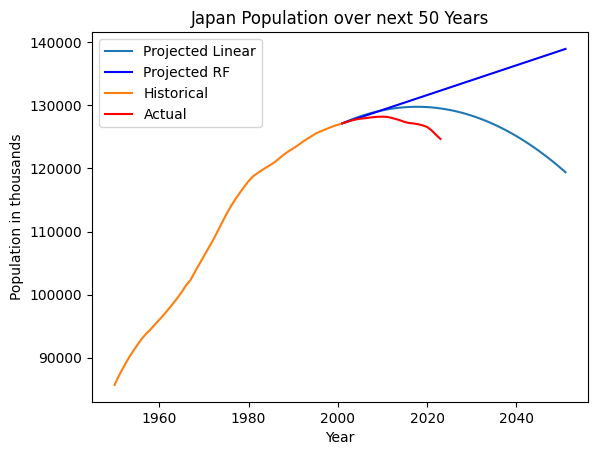

Mongolia
2659     1950
2896     1951
3133     1952
3370     1953
3607     1954
3844     1955
4155     1956
4392     1957
4629     1958
4940     1959
5177     1960
5488     1961
5725     1962
6036     1963
6273     1964
6510     1965
6747     1966
6984     1967
7369     1968
7606     1969
7917     1970
8154     1971
8465     1972
8702     1973
8939     1974
9250     1975
9487     1976
9724     1977
9961     1978
10272    1979
10509    1980
10746    1981
10983    1982
11220    1983
11605    1984
11842    1985
12079    1986
12390    1987
12627    1988
12864    1989
13101    1990
13338    1991
13649    1992
13886    1993
14123    1994
14360    1995
14597    1996
14908    1997
15145    1998
15382    1999
15767    2000
16004    2001
Name: Year, dtype: int64
Mongolia Linear RMSE: 99.50388434486506
Mongolia RF RMSE: 213.1439883728504


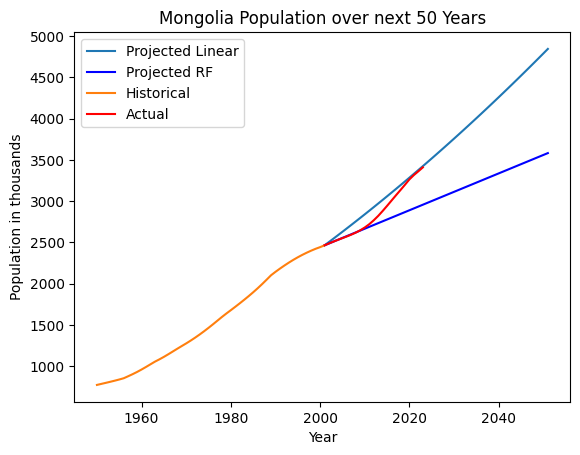

Republic of Korea
2660     1950
2897     1951
3134     1952
3371     1953
3608     1954
3845     1955
4156     1956
4393     1957
4630     1958
4941     1959
5178     1960
5489     1961
5726     1962
6037     1963
6274     1964
6511     1965
6748     1966
6985     1967
7370     1968
7607     1969
7918     1970
8155     1971
8466     1972
8703     1973
8940     1974
9251     1975
9488     1976
9725     1977
9962     1978
10273    1979
10510    1980
10747    1981
10984    1982
11221    1983
11606    1984
11843    1985
12080    1986
12391    1987
12628    1988
12865    1989
13102    1990
13339    1991
13650    1992
13887    1993
14124    1994
14361    1995
14598    1996
14909    1997
15146    1998
15383    1999
15768    2000
16005    2001
Name: Year, dtype: int64
Republic of Korea Linear RMSE: 732.0369979185091
Republic of Korea RF RMSE: 491.4068667564813


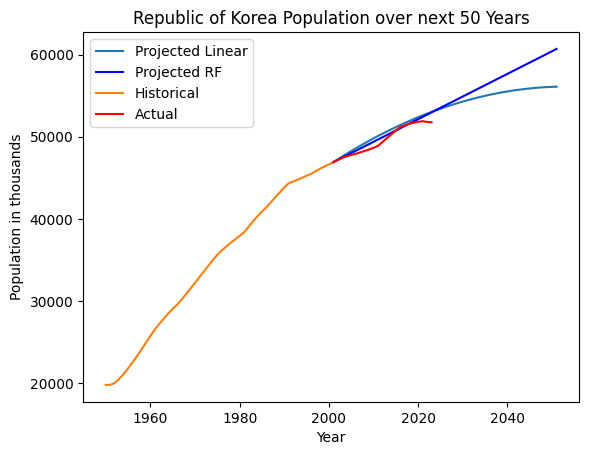

Afghanistan
2661     1950
2898     1951
3135     1952
3372     1953
3609     1954
3846     1955
4157     1956
4394     1957
4631     1958
4942     1959
5179     1960
5490     1961
5727     1962
6038     1963
6275     1964
6512     1965
6749     1966
6986     1967
7371     1968
7608     1969
7919     1970
8156     1971
8467     1972
8704     1973
8941     1974
9252     1975
9489     1976
9726     1977
9963     1978
10274    1979
10511    1980
10748    1981
10985    1982
11222    1983
11607    1984
11844    1985
12081    1986
12392    1987
12629    1988
12866    1989
13103    1990
13340    1991
13651    1992
13888    1993
14125    1994
14362    1995
14599    1996
14910    1997
15147    1998
15384    1999
15769    2000
16006    2001
Name: Year, dtype: int64
Afghanistan Linear RMSE: 4899.344947819877
Afghanistan RF RMSE: 7208.354663358213


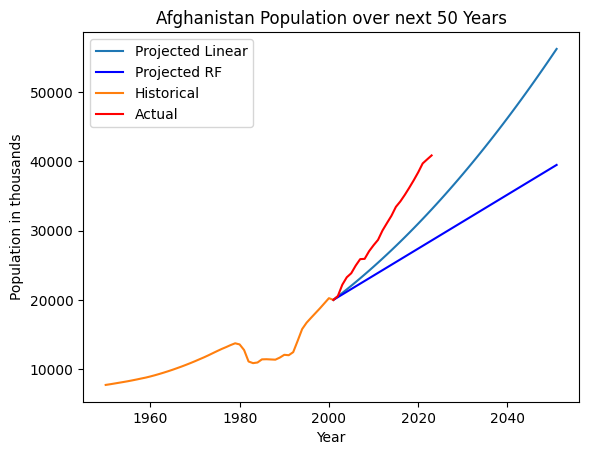

Bangladesh
2662     1950
2899     1951
3136     1952
3373     1953
3610     1954
3847     1955
4158     1956
4395     1957
4632     1958
4943     1959
5180     1960
5491     1961
5728     1962
6039     1963
6276     1964
6513     1965
6750     1966
6987     1967
7372     1968
7609     1969
7920     1970
8157     1971
8468     1972
8705     1973
8942     1974
9253     1975
9490     1976
9727     1977
9964     1978
10275    1979
10512    1980
10749    1981
10986    1982
11223    1983
11608    1984
11845    1985
12082    1986
12393    1987
12630    1988
12867    1989
13104    1990
13341    1991
13652    1992
13889    1993
14126    1994
14363    1995
14600    1996
14911    1997
15148    1998
15385    1999
15770    2000
16007    2001
Name: Year, dtype: int64
Bangladesh Linear RMSE: 16612.71692556344
Bangladesh RF RMSE: 8196.650030187166


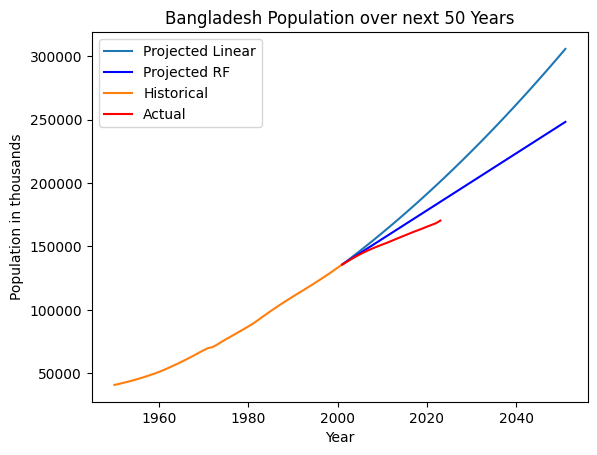

Bhutan
2663     1950
2900     1951
3137     1952
3374     1953
3611     1954
3848     1955
4159     1956
4396     1957
4633     1958
4944     1959
5181     1960
5492     1961
5729     1962
6040     1963
6277     1964
6514     1965
6751     1966
6988     1967
7373     1968
7610     1969
7921     1970
8158     1971
8469     1972
8706     1973
8943     1974
9254     1975
9491     1976
9728     1977
9965     1978
10276    1979
10513    1980
10750    1981
10987    1982
11224    1983
11609    1984
11846    1985
12083    1986
12394    1987
12631    1988
12868    1989
13105    1990
13342    1991
13653    1992
13890    1993
14127    1994
14364    1995
14601    1996
14912    1997
15149    1998
15386    1999
15771    2000
16008    2001
Name: Year, dtype: int64
Bhutan Linear RMSE: 15.450766064591448
Bhutan RF RMSE: 62.69647137878806


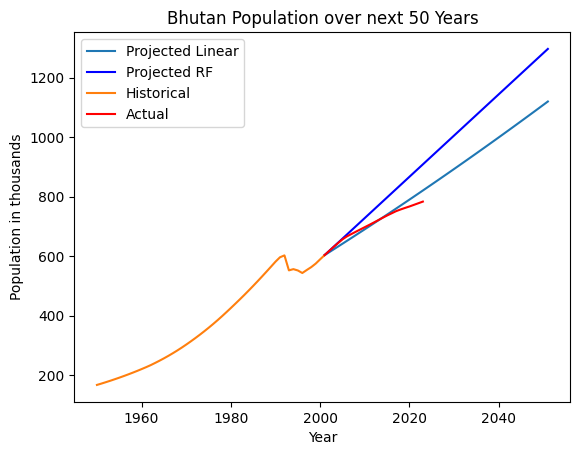

India
2664     1950
2901     1951
3138     1952
3375     1953
3612     1954
3849     1955
4160     1956
4397     1957
4634     1958
4945     1959
5182     1960
5493     1961
5730     1962
6041     1963
6278     1964
6515     1965
6752     1966
6989     1967
7374     1968
7611     1969
7922     1970
8159     1971
8470     1972
8707     1973
8944     1974
9255     1975
9492     1976
9729     1977
9966     1978
10277    1979
10514    1980
10751    1981
10988    1982
11225    1983
11610    1984
11847    1985
12084    1986
12395    1987
12632    1988
12869    1989
13106    1990
13343    1991
13654    1992
13891    1993
14128    1994
14365    1995
14602    1996
14913    1997
15150    1998
15387    1999
15772    2000
16009    2001
Name: Year, dtype: int64
India Linear RMSE: 79836.95312175946
India RF RMSE: 33024.38075260448


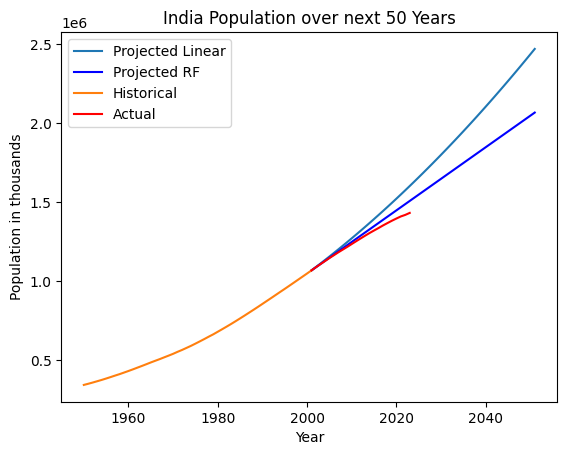

Iran (Islamic Republic of)
2665     1950
2902     1951
3139     1952
3376     1953
3613     1954
3850     1955
4161     1956
4398     1957
4635     1958
4946     1959
5183     1960
5494     1961
5731     1962
6042     1963
6279     1964
6516     1965
6753     1966
6990     1967
7375     1968
7612     1969
7923     1970
8160     1971
8471     1972
8708     1973
8945     1974
9256     1975
9493     1976
9730     1977
9967     1978
10278    1979
10515    1980
10752    1981
10989    1982
11226    1983
11611    1984
11848    1985
12085    1986
12396    1987
12633    1988
12870    1989
13107    1990
13344    1991
13655    1992
13892    1993
14129    1994
14366    1995
14603    1996
14914    1997
15151    1998
15388    1999
15773    2000
16010    2001
Name: Year, dtype: int64
Iran (Islamic Republic of) Linear RMSE: 5859.609873559807
Iran (Islamic Republic of) RF RMSE: 838.8504217905528


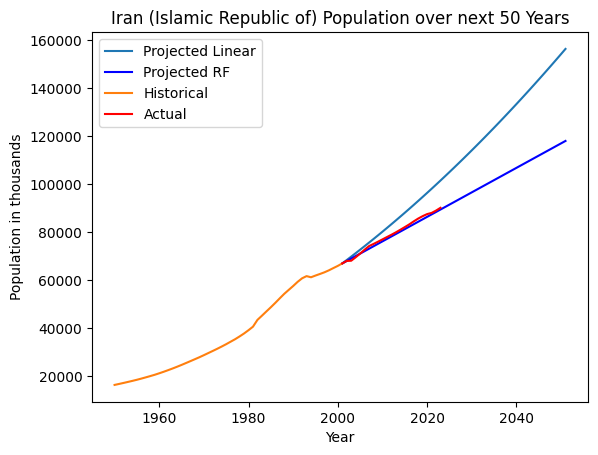

Maldives
2666     1950
2903     1951
3140     1952
3377     1953
3614     1954
3851     1955
4162     1956
4399     1957
4636     1958
4947     1959
5184     1960
5495     1961
5732     1962
6043     1963
6280     1964
6517     1965
6754     1966
6991     1967
7376     1968
7613     1969
7924     1970
8161     1971
8472     1972
8709     1973
8946     1974
9257     1975
9494     1976
9731     1977
9968     1978
10279    1979
10516    1980
10753    1981
10990    1982
11227    1983
11612    1984
11849    1985
12086    1986
12397    1987
12634    1988
12871    1989
13108    1990
13345    1991
13656    1992
13893    1993
14130    1994
14367    1995
14604    1996
14915    1997
15152    1998
15389    1999
15774    2000
16011    2001
Name: Year, dtype: int64
Maldives Linear RMSE: 36.84683777484337
Maldives RF RMSE: 72.58413231167347


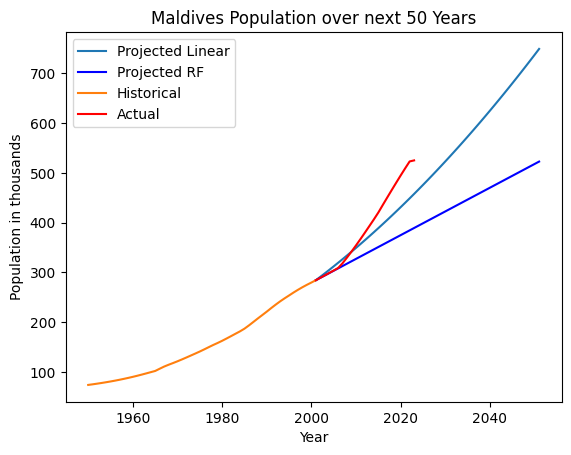

Nepal
2667     1950
2904     1951
3141     1952
3378     1953
3615     1954
3852     1955
4163     1956
4400     1957
4637     1958
4948     1959
5185     1960
5496     1961
5733     1962
6044     1963
6281     1964
6518     1965
6755     1966
6992     1967
7377     1968
7614     1969
7925     1970
8162     1971
8473     1972
8710     1973
8947     1974
9258     1975
9495     1976
9732     1977
9969     1978
10280    1979
10517    1980
10754    1981
10991    1982
11228    1983
11613    1984
11850    1985
12087    1986
12398    1987
12635    1988
12872    1989
13109    1990
13346    1991
13657    1992
13894    1993
14131    1994
14368    1995
14605    1996
14916    1997
15153    1998
15390    1999
15775    2000
16012    2001
Name: Year, dtype: int64
Nepal Linear RMSE: 4635.838291064294
Nepal RF RMSE: 2315.9623211542553


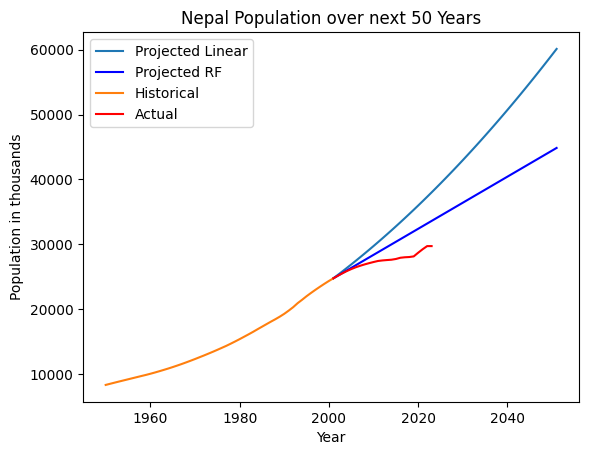

Pakistan
2668     1950
2905     1951
3142     1952
3379     1953
3616     1954
3853     1955
4164     1956
4401     1957
4638     1958
4949     1959
5186     1960
5497     1961
5734     1962
6045     1963
6282     1964
6519     1965
6756     1966
6993     1967
7378     1968
7615     1969
7926     1970
8163     1971
8474     1972
8711     1973
8948     1974
9259     1975
9496     1976
9733     1977
9970     1978
10281    1979
10518    1980
10755    1981
10992    1982
11229    1983
11614    1984
11851    1985
12088    1986
12399    1987
12636    1988
12873    1989
13110    1990
13347    1991
13658    1992
13895    1993
14132    1994
14369    1995
14606    1996
14917    1997
15154    1998
15391    1999
15776    2000
16013    2001
Name: Year, dtype: int64
Pakistan Linear RMSE: 13055.444723874733
Pakistan RF RMSE: 3173.877891508565


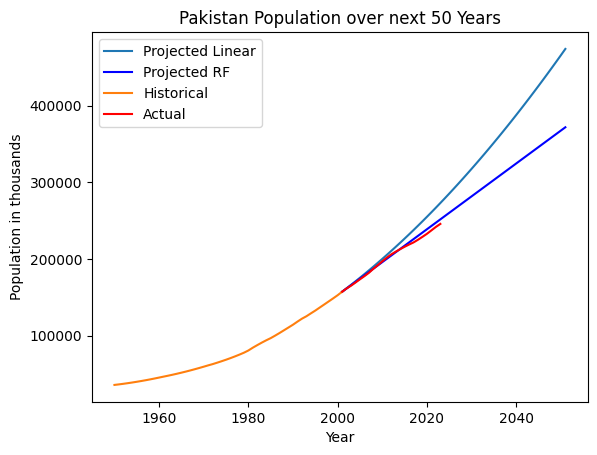

Sri Lanka
2669     1950
2906     1951
3143     1952
3380     1953
3617     1954
3854     1955
4165     1956
4402     1957
4639     1958
4950     1959
5187     1960
5498     1961
5735     1962
6046     1963
6283     1964
6520     1965
6757     1966
6994     1967
7379     1968
7616     1969
7927     1970
8164     1971
8475     1972
8712     1973
8949     1974
9260     1975
9497     1976
9734     1977
9971     1978
10282    1979
10519    1980
10756    1981
10993    1982
11230    1983
11615    1984
11852    1985
12089    1986
12400    1987
12637    1988
12874    1989
13111    1990
13348    1991
13659    1992
13896    1993
14133    1994
14370    1995
14607    1996
14918    1997
15155    1998
15392    1999
15777    2000
16014    2001
Name: Year, dtype: int64
Sri Lanka Linear RMSE: 1582.4389425218144
Sri Lanka RF RMSE: 1764.0420647647618


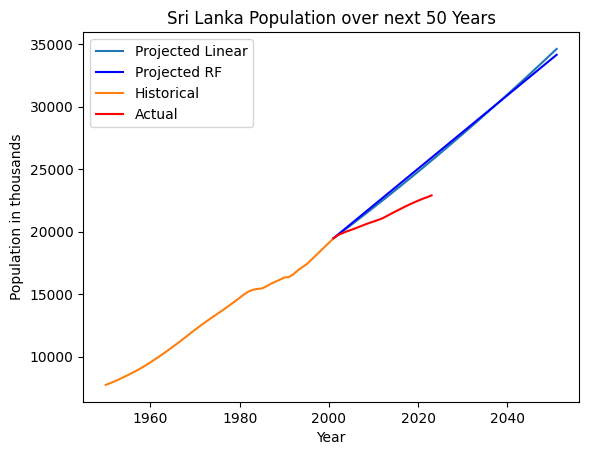

Brunei Darussalam
2670     1950
2907     1951
3144     1952
3381     1953
3618     1954
3855     1955
4166     1956
4403     1957
4640     1958
4951     1959
5188     1960
5499     1961
5736     1962
6047     1963
6284     1964
6521     1965
6758     1966
6995     1967
7380     1968
7617     1969
7928     1970
8165     1971
8476     1972
8713     1973
8950     1974
9261     1975
9498     1976
9735     1977
9972     1978
10283    1979
10520    1980
10757    1981
10994    1982
11231    1983
11616    1984
11853    1985
12090    1986
12401    1987
12638    1988
12875    1989
13112    1990
13349    1991
13660    1992
13897    1993
14134    1994
14371    1995
14608    1996
14919    1997
15156    1998
15393    1999
15778    2000
16015    2001
Name: Year, dtype: int64
Brunei Darussalam Linear RMSE: 30.108147300822868
Brunei Darussalam RF RMSE: 10.107452398476765


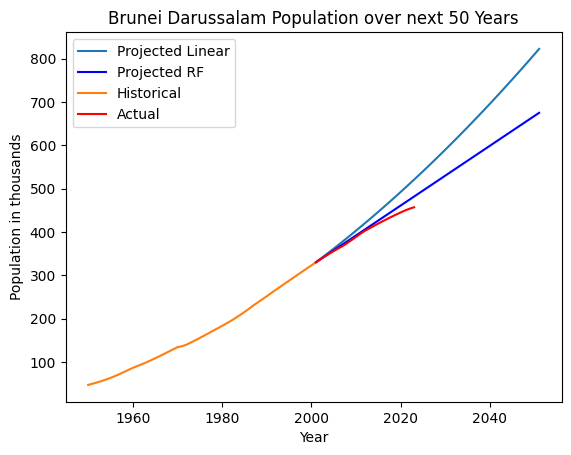

Cambodia
2671     1950
2908     1951
3145     1952
3382     1953
3619     1954
3856     1955
4167     1956
4404     1957
4641     1958
4952     1959
5189     1960
5500     1961
5737     1962
6048     1963
6285     1964
6522     1965
6759     1966
6996     1967
7381     1968
7618     1969
7929     1970
8166     1971
8477     1972
8714     1973
8951     1974
9262     1975
9499     1976
9736     1977
9973     1978
10284    1979
10521    1980
10758    1981
10995    1982
11232    1983
11617    1984
11854    1985
12091    1986
12402    1987
12639    1988
12876    1989
13113    1990
13350    1991
13661    1992
13898    1993
14135    1994
14372    1995
14609    1996
14920    1997
15157    1998
15394    1999
15779    2000
16016    2001
Name: Year, dtype: int64
Cambodia Linear RMSE: 2779.103152922686
Cambodia RF RMSE: 195.0827249407161


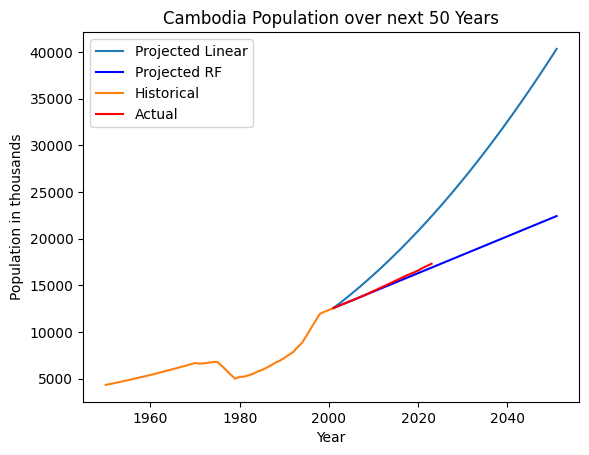

Indonesia
2672     1950
2909     1951
3146     1952
3383     1953
3620     1954
3857     1955
4168     1956
4405     1957
4642     1958
4953     1959
5190     1960
5501     1961
5738     1962
6049     1963
6286     1964
6523     1965
6760     1966
6997     1967
7382     1968
7619     1969
7930     1970
8167     1971
8478     1972
8715     1973
8952     1974
9263     1975
9500     1976
9737     1977
9974     1978
10285    1979
10522    1980
10759    1981
10996    1982
11233    1983
11618    1984
11855    1985
12092    1986
12403    1987
12640    1988
12877    1989
13114    1990
13351    1991
13662    1992
13899    1993
14136    1994
14373    1995
14610    1996
14921    1997
15158    1998
15395    1999
15780    2000
16017    2001
Name: Year, dtype: int64
Indonesia Linear RMSE: 13644.338239147108
Indonesia RF RMSE: 1298.1132112170278


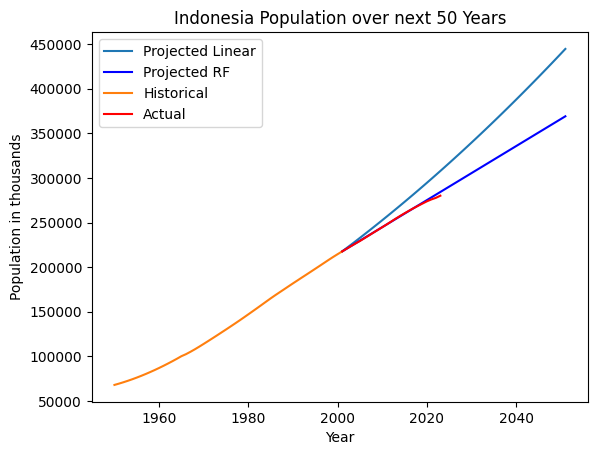

Lao People's Democratic Republic
2673     1950
2910     1951
3147     1952
3384     1953
3621     1954
3858     1955
4169     1956
4406     1957
4643     1958
4954     1959
5191     1960
5502     1961
5739     1962
6050     1963
6287     1964
6524     1965
6761     1966
6998     1967
7383     1968
7620     1969
7931     1970
8168     1971
8479     1972
8716     1973
8953     1974
9264     1975
9501     1976
9738     1977
9975     1978
10286    1979
10523    1980
10760    1981
10997    1982
11234    1983
11619    1984
11856    1985
12093    1986
12404    1987
12641    1988
12878    1989
13115    1990
13352    1991
13663    1992
13900    1993
14137    1994
14374    1995
14611    1996
14922    1997
15159    1998
15396    1999
15781    2000
16018    2001
Name: Year, dtype: int64
Lao People's Democratic Republic Linear RMSE: 494.50992903722647
Lao People's Democratic Republic RF RMSE: 56.61375562165742


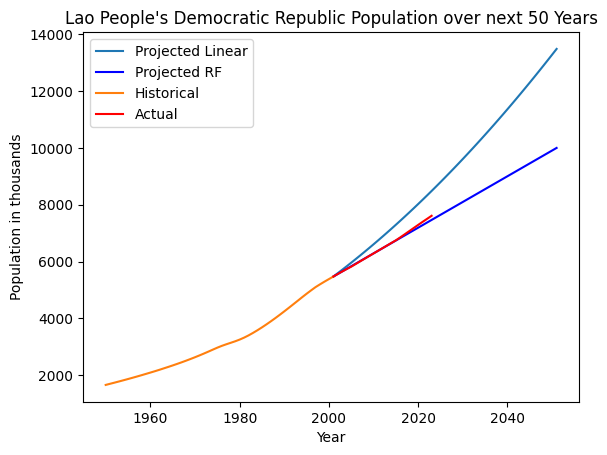

Malaysia
2674     1950
2911     1951
3148     1952
3385     1953
3622     1954
3859     1955
4170     1956
4407     1957
4644     1958
4955     1959
5192     1960
5503     1961
5740     1962
6051     1963
6288     1964
6525     1965
6762     1966
6999     1967
7384     1968
7621     1969
7932     1970
8169     1971
8480     1972
8717     1973
8954     1974
9265     1975
9502     1976
9739     1977
9976     1978
10287    1979
10524    1980
10761    1981
10998    1982
11235    1983
11620    1984
11857    1985
12094    1986
12405    1987
12642    1988
12879    1989
13116    1990
13353    1991
13664    1992
13901    1993
14138    1994
14375    1995
14612    1996
14923    1997
15160    1998
15397    1999
15782    2000
16019    2001
Name: Year, dtype: int64
Malaysia Linear RMSE: 1385.8319521344192
Malaysia RF RMSE: 223.07640209042827


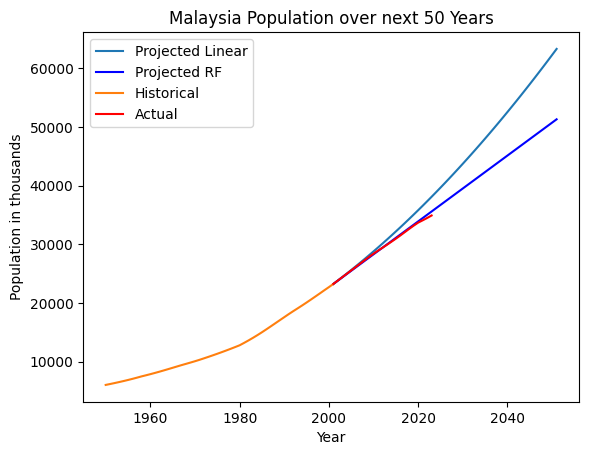

Myanmar
2675     1950
2912     1951
3149     1952
3386     1953
3623     1954
3860     1955
4171     1956
4408     1957
4645     1958
4956     1959
5193     1960
5504     1961
5741     1962
6052     1963
6289     1964
6526     1965
6763     1966
7000     1967
7385     1968
7622     1969
7933     1970
8170     1971
8481     1972
8718     1973
8955     1974
9266     1975
9503     1976
9740     1977
9977     1978
10288    1979
10525    1980
10762    1981
10999    1982
11236    1983
11621    1984
11858    1985
12095    1986
12406    1987
12643    1988
12880    1989
13117    1990
13354    1991
13665    1992
13902    1993
14139    1994
14376    1995
14613    1996
14924    1997
15161    1998
15398    1999
15783    2000
16020    2001
Name: Year, dtype: int64
Myanmar Linear RMSE: 3722.011572799687
Myanmar RF RMSE: 1270.0435587968786


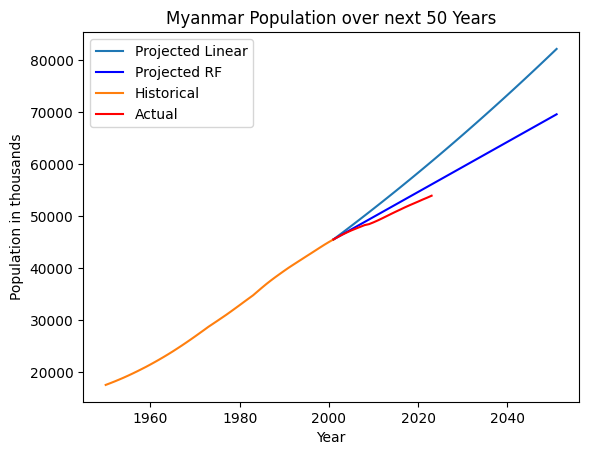

Philippines
2676     1950
2913     1951
3150     1952
3387     1953
3624     1954
3861     1955
4172     1956
4409     1957
4646     1958
4957     1959
5194     1960
5505     1961
5742     1962
6053     1963
6290     1964
6527     1965
6764     1966
7001     1967
7386     1968
7623     1969
7934     1970
8171     1971
8482     1972
8719     1973
8956     1974
9267     1975
9504     1976
9741     1977
9978     1978
10289    1979
10526    1980
10763    1981
11000    1982
11237    1983
11622    1984
11859    1985
12096    1986
12407    1987
12644    1988
12881    1989
13118    1990
13355    1991
13666    1992
13903    1993
14140    1994
14377    1995
14614    1996
14925    1997
15162    1998
15399    1999
15784    2000
16021    2001
Name: Year, dtype: int64
Philippines Linear RMSE: 4229.558585497534
Philippines RF RMSE: 1707.6925037207243


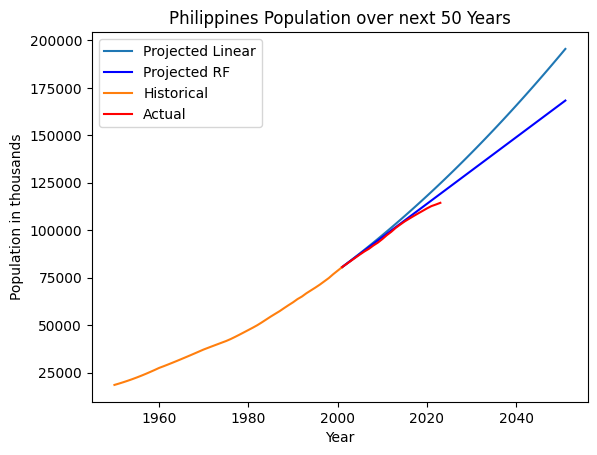

Singapore
2677     1950
2914     1951
3151     1952
3388     1953
3625     1954
3862     1955
4173     1956
4410     1957
4647     1958
4958     1959
5195     1960
5506     1961
5743     1962
6054     1963
6291     1964
6528     1965
6765     1966
7002     1967
7387     1968
7624     1969
7935     1970
8172     1971
8483     1972
8720     1973
8957     1974
9268     1975
9505     1976
9742     1977
9979     1978
10290    1979
10527    1980
10764    1981
11001    1982
11238    1983
11623    1984
11860    1985
12097    1986
12408    1987
12645    1988
12882    1989
13119    1990
13356    1991
13667    1992
13904    1993
14141    1994
14378    1995
14615    1996
14926    1997
15163    1998
15400    1999
15785    2000
16022    2001
Name: Year, dtype: int64
Singapore Linear RMSE: 192.10956276931515
Singapore RF RMSE: 231.27685929406402


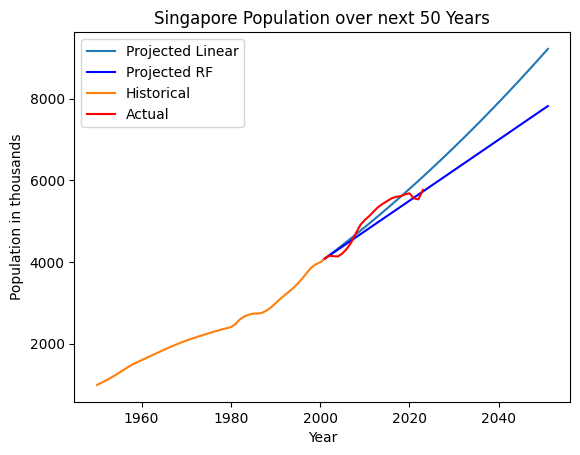

Thailand
2678     1950
2915     1951
3152     1952
3389     1953
3626     1954
3863     1955
4174     1956
4411     1957
4648     1958
4959     1959
5196     1960
5507     1961
5744     1962
6055     1963
6292     1964
6529     1965
6766     1966
7003     1967
7388     1968
7625     1969
7936     1970
8173     1971
8484     1972
8721     1973
8958     1974
9269     1975
9506     1976
9743     1977
9980     1978
10291    1979
10528    1980
10765    1981
11002    1982
11239    1983
11624    1984
11861    1985
12098    1986
12409    1987
12646    1988
12883    1989
13120    1990
13357    1991
13668    1992
13905    1993
14142    1994
14379    1995
14616    1996
14927    1997
15164    1998
15401    1999
15786    2000
16023    2001
Name: Year, dtype: int64
Thailand Linear RMSE: 6246.063020920487
Thailand RF RMSE: 2538.3075146162378


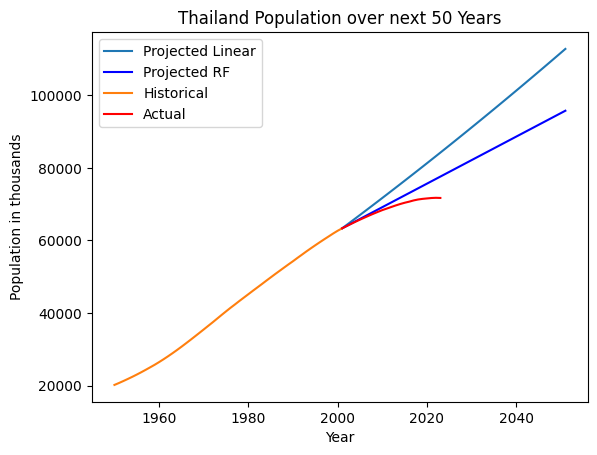

Timor-Leste
2679     1950
2916     1951
3153     1952
3390     1953
3627     1954
3864     1955
4175     1956
4412     1957
4649     1958
4960     1959
5197     1960
5508     1961
5745     1962
6056     1963
6293     1964
6530     1965
6767     1966
7004     1967
7389     1968
7626     1969
7937     1970
8174     1971
8485     1972
8722     1973
8959     1974
9270     1975
9507     1976
9744     1977
9981     1978
10292    1979
10529    1980
10766    1981
11003    1982
11240    1983
11625    1984
11862    1985
12099    1986
12410    1987
12647    1988
12884    1989
13121    1990
13358    1991
13669    1992
13906    1993
14143    1994
14380    1995
14617    1996
14928    1997
15165    1998
15402    1999
15787    2000
16024    2001
Name: Year, dtype: int64
Timor-Leste Linear RMSE: 252.37492152743891
Timor-Leste RF RMSE: 146.6487756554926


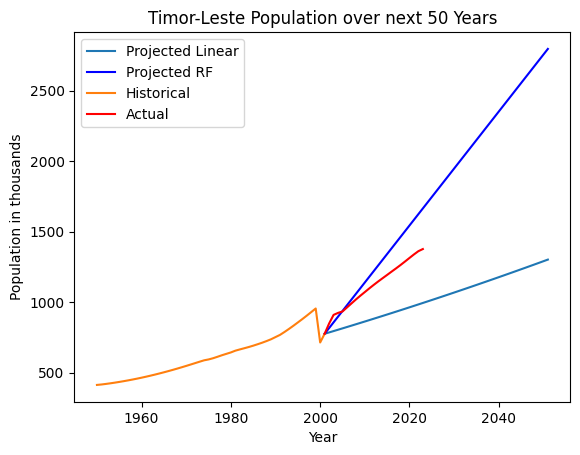

Viet Nam
2680     1950
2917     1951
3154     1952
3391     1953
3628     1954
3865     1955
4176     1956
4413     1957
4650     1958
4961     1959
5198     1960
5509     1961
5746     1962
6057     1963
6294     1964
6531     1965
6768     1966
7005     1967
7390     1968
7627     1969
7938     1970
8175     1971
8486     1972
8723     1973
8960     1974
9271     1975
9508     1976
9745     1977
9982     1978
10293    1979
10530    1980
10767    1981
11004    1982
11241    1983
11626    1984
11863    1985
12100    1986
12411    1987
12648    1988
12885    1989
13122    1990
13359    1991
13670    1992
13907    1993
14144    1994
14381    1995
14618    1996
14929    1997
15166    1998
15403    1999
15788    2000
16025    2001
Name: Year, dtype: int64
Viet Nam Linear RMSE: 4586.499782225017
Viet Nam RF RMSE: 2778.1296719268967


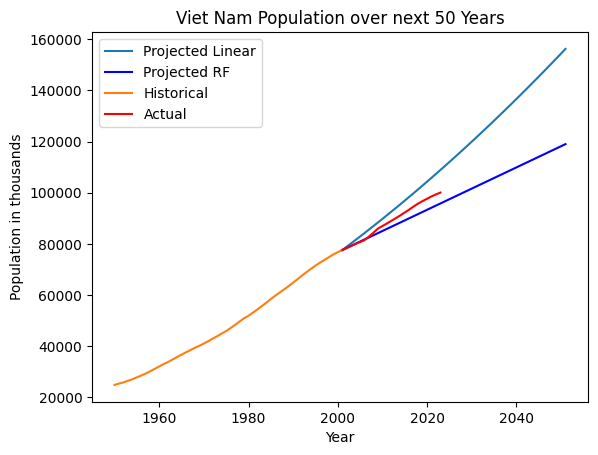

Armenia
2681     1950
2918     1951
3155     1952
3392     1953
3629     1954
3866     1955
4177     1956
4414     1957
4651     1958
4962     1959
5199     1960
5510     1961
5747     1962
6058     1963
6295     1964
6532     1965
6769     1966
7006     1967
7391     1968
7628     1969
7939     1970
8176     1971
8487     1972
8724     1973
8961     1974
9272     1975
9509     1976
9746     1977
9983     1978
10294    1979
10531    1980
10768    1981
11005    1982
11242    1983
11627    1984
11864    1985
12101    1986
12412    1987
12649    1988
12886    1989
13123    1990
13360    1991
13671    1992
13908    1993
14145    1994
14382    1995
14619    1996
14930    1997
15167    1998
15404    1999
15789    2000
16026    2001
Name: Year, dtype: int64
Armenia Linear RMSE: 265.4860672865474
Armenia RF RMSE: 369.23977300822094


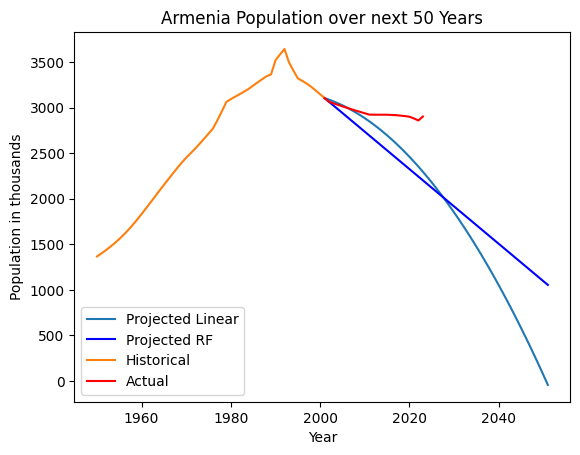

Azerbaijan
2682     1950
2919     1951
3156     1952
3393     1953
3630     1954
3867     1955
4178     1956
4415     1957
4652     1958
4963     1959
5200     1960
5511     1961
5748     1962
6059     1963
6296     1964
6533     1965
6770     1966
7007     1967
7392     1968
7629     1969
7940     1970
8177     1971
8488     1972
8725     1973
8962     1974
9273     1975
9510     1976
9747     1977
9984     1978
10295    1979
10532    1980
10769    1981
11006    1982
11243    1983
11628    1984
11865    1985
12102    1986
12413    1987
12650    1988
12887    1989
13124    1990
13361    1991
13672    1992
13909    1993
14146    1994
14383    1995
14620    1996
14931    1997
15168    1998
15405    1999
15790    2000
16027    2001
Name: Year, dtype: int64
Azerbaijan Linear RMSE: 74.66246640130782
Azerbaijan RF RMSE: 335.8568755584439


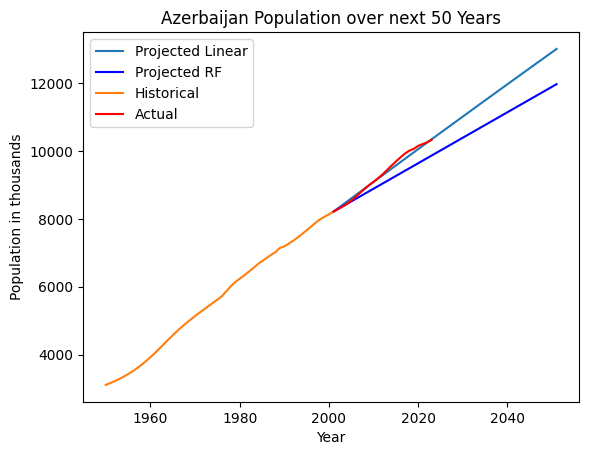

Bahrain
2683     1950
2920     1951
3157     1952
3394     1953
3631     1954
3868     1955
4179     1956
4416     1957
4653     1958
4964     1959
5201     1960
5512     1961
5749     1962
6060     1963
6297     1964
6534     1965
6771     1966
7008     1967
7393     1968
7630     1969
7941     1970
8178     1971
8489     1972
8726     1973
8963     1974
9274     1975
9511     1976
9748     1977
9985     1978
10296    1979
10533    1980
10770    1981
11007    1982
11244    1983
11629    1984
11866    1985
12103    1986
12414    1987
12651    1988
12888    1989
13125    1990
13362    1991
13673    1992
13910    1993
14147    1994
14384    1995
14621    1996
14932    1997
15169    1998
15406    1999
15791    2000
16028    2001
Name: Year, dtype: int64
Bahrain Linear RMSE: 284.0310874458358
Bahrain RF RMSE: 148.3063259304379


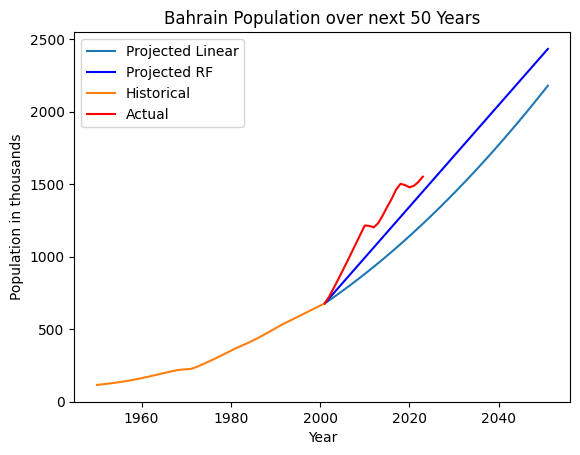

Cyprus
2684     1950
2921     1951
3158     1952
3395     1953
3632     1954
3869     1955
4180     1956
4417     1957
4654     1958
4965     1959
5202     1960
5513     1961
5750     1962
6061     1963
6298     1964
6535     1965
6772     1966
7009     1967
7394     1968
7631     1969
7942     1970
8179     1971
8490     1972
8727     1973
8964     1974
9275     1975
9512     1976
9749     1977
9986     1978
10297    1979
10534    1980
10771    1981
11008    1982
11245    1983
11630    1984
11867    1985
12104    1986
12415    1987
12652    1988
12889    1989
13126    1990
13363    1991
13674    1992
13911    1993
14148    1994
14385    1995
14622    1996
14933    1997
15170    1998
15407    1999
15792    2000
16029    2001
Name: Year, dtype: int64
Cyprus Linear RMSE: 28.534415083780047
Cyprus RF RMSE: 17.603261379639154


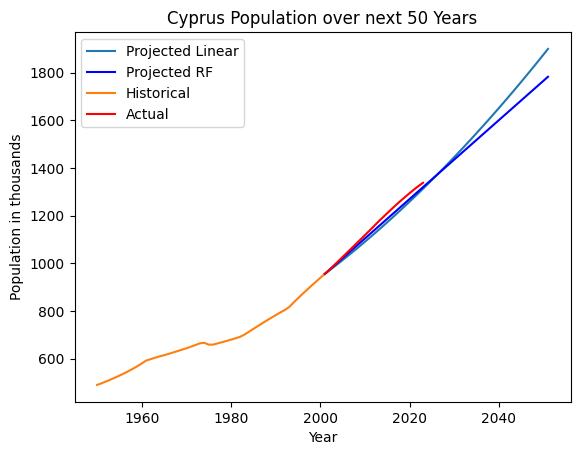

Georgia
2685     1950
2922     1951
3159     1952
3396     1953
3633     1954
3870     1955
4181     1956
4418     1957
4655     1958
4966     1959
5203     1960
5514     1961
5751     1962
6062     1963
6299     1964
6536     1965
6773     1966
7010     1967
7395     1968
7632     1969
7943     1970
8180     1971
8491     1972
8728     1973
8965     1974
9276     1975
9513     1976
9750     1977
9987     1978
10298    1979
10535    1980
10772    1981
11009    1982
11246    1983
11631    1984
11868    1985
12105    1986
12416    1987
12653    1988
12890    1989
13127    1990
13364    1991
13675    1992
13912    1993
14149    1994
14386    1995
14623    1996
14934    1997
15171    1998
15408    1999
15793    2000
16030    2001
Name: Year, dtype: int64
Georgia Linear RMSE: 1152.0239073525424
Georgia RF RMSE: 1106.338136094996


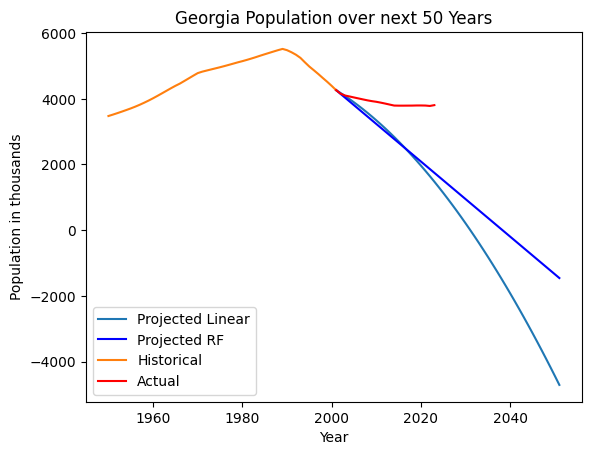

Iraq
2686     1950
2923     1951
3160     1952
3397     1953
3634     1954
3871     1955
4182     1956
4419     1957
4656     1958
4967     1959
5204     1960
5515     1961
5752     1962
6063     1963
6300     1964
6537     1965
6774     1966
7011     1967
7396     1968
7633     1969
7944     1970
8181     1971
8492     1972
8729     1973
8966     1974
9277     1975
9514     1976
9751     1977
9988     1978
10299    1979
10536    1980
10773    1981
11010    1982
11247    1983
11632    1984
11869    1985
12106    1986
12417    1987
12654    1988
12891    1989
13128    1990
13365    1991
13676    1992
13913    1993
14150    1994
14387    1995
14624    1996
14935    1997
15172    1998
15409    1999
15794    2000
16031    2001
Name: Year, dtype: int64
Iraq Linear RMSE: 994.9541469226538
Iraq RF RMSE: 1589.9030460101696


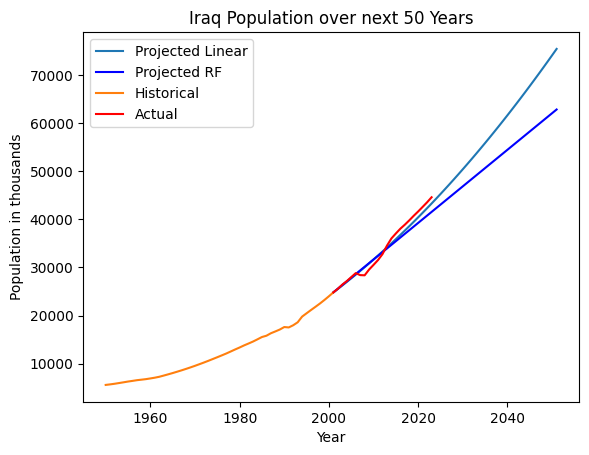

Israel
2687     1950
2924     1951
3161     1952
3398     1953
3635     1954
3872     1955
4183     1956
4420     1957
4657     1958
4968     1959
5205     1960
5516     1961
5753     1962
6064     1963
6301     1964
6538     1965
6775     1966
7012     1967
7397     1968
7634     1969
7945     1970
8182     1971
8493     1972
8730     1973
8967     1974
9278     1975
9515     1976
9752     1977
9989     1978
10300    1979
10537    1980
10774    1981
11011    1982
11248    1983
11633    1984
11870    1985
12107    1986
12418    1987
12655    1988
12892    1989
13129    1990
13366    1991
13677    1992
13914    1993
14151    1994
14388    1995
14625    1996
14936    1997
15173    1998
15410    1999
15795    2000
16032    2001
Name: Year, dtype: int64
Israel Linear RMSE: 333.9580166032035
Israel RF RMSE: 202.20145719196233


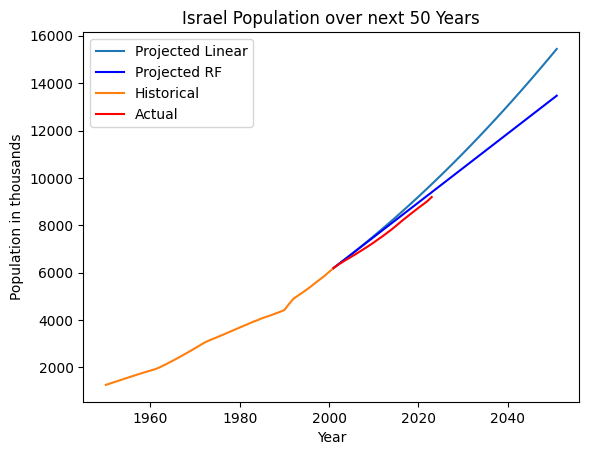

Jordan
2688     1950
2925     1951
3162     1952
3399     1953
3636     1954
3873     1955
4184     1956
4421     1957
4658     1958
4969     1959
5206     1960
5517     1961
5754     1962
6065     1963
6302     1964
6539     1965
6776     1966
7013     1967
7398     1968
7635     1969
7946     1970
8183     1971
8494     1972
8731     1973
8968     1974
9279     1975
9516     1976
9753     1977
10064    1978
10301    1979
10538    1980
10775    1981
11012    1982
11249    1983
11634    1984
11871    1985
12108    1986
12419    1987
12656    1988
12893    1989
13130    1990
13367    1991
13678    1992
13915    1993
14152    1994
14389    1995
14626    1996
14937    1997
15174    1998
15411    1999
15796    2000
16033    2001
Name: Year, dtype: int64
Jordan Linear RMSE: 859.1395539940788
Jordan RF RMSE: 1972.2018300298341


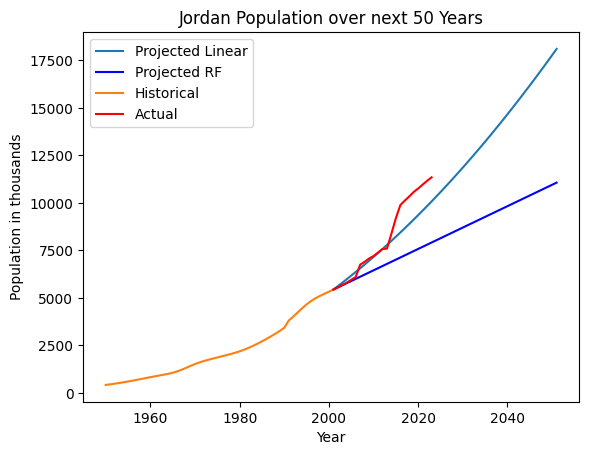

Kuwait
2689     1950
2926     1951
3163     1952
3400     1953
3637     1954
3874     1955
4185     1956
4422     1957
4659     1958
4970     1959
5207     1960
5518     1961
5755     1962
6066     1963
6303     1964
6540     1965
6777     1966
7014     1967
7399     1968
7636     1969
7947     1970
8184     1971
8495     1972
8732     1973
8969     1974
9280     1975
9517     1976
9754     1977
10065    1978
10302    1979
10539    1980
10776    1981
11013    1982
11250    1983
11635    1984
11872    1985
12109    1986
12420    1987
12657    1988
12894    1989
13131    1990
13368    1991
13679    1992
13916    1993
14153    1994
14390    1995
14627    1996
14938    1997
15175    1998
15412    1999
15797    2000
16034    2001
Name: Year, dtype: int64
Kuwait Linear RMSE: 1138.7482751845957
Kuwait RF RMSE: 897.6249906318099


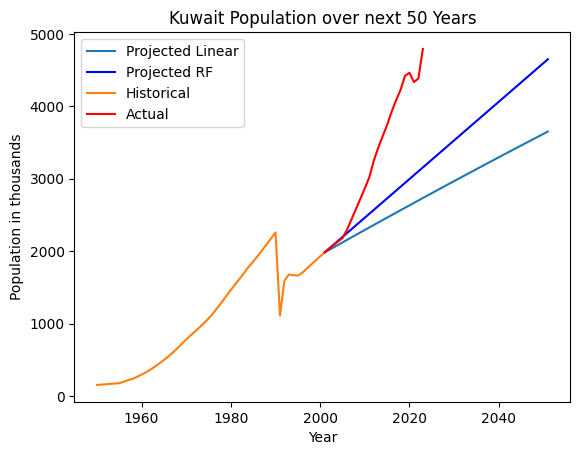

Lebanon
2690     1950
2927     1951
3164     1952
3401     1953
3638     1954
3875     1955
4186     1956
4423     1957
4660     1958
4971     1959
5208     1960
5519     1961
5756     1962
6067     1963
6304     1964
6541     1965
6778     1966
7015     1967
7400     1968
7637     1969
7948     1970
8185     1971
8496     1972
8733     1973
8970     1974
9281     1975
9518     1976
9755     1977
10066    1978
10303    1979
10540    1980
10777    1981
11014    1982
11251    1983
11636    1984
11873    1985
12110    1986
12421    1987
12658    1988
12895    1989
13132    1990
13369    1991
13680    1992
13917    1993
14154    1994
14391    1995
14628    1996
14939    1997
15176    1998
15413    1999
15798    2000
16035    2001
Name: Year, dtype: int64
Lebanon Linear RMSE: 377.37963048296933
Lebanon RF RMSE: 408.41075091085344


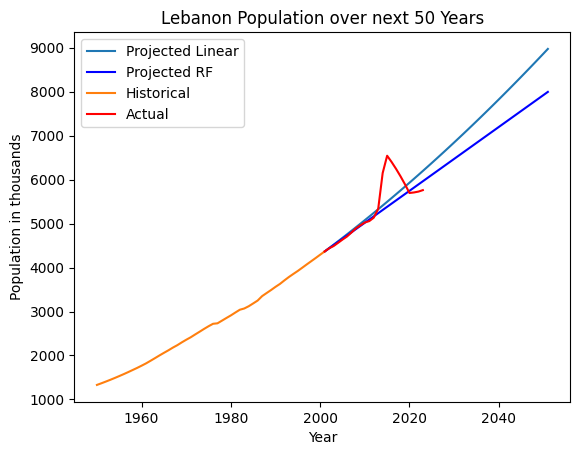

Oman
2691     1950
2928     1951
3165     1952
3402     1953
3639     1954
3876     1955
4187     1956
4424     1957
4661     1958
4972     1959
5209     1960
5520     1961
5757     1962
6068     1963
6305     1964
6542     1965
6779     1966
7016     1967
7401     1968
7638     1969
7949     1970
8186     1971
8497     1972
8734     1973
8971     1974
9282     1975
9519     1976
9756     1977
10067    1978
10304    1979
10541    1980
10778    1981
11015    1982
11252    1983
11637    1984
11874    1985
12111    1986
12422    1987
12659    1988
12896    1989
13133    1990
13370    1991
13681    1992
13918    1993
14155    1994
14392    1995
14629    1996
14940    1997
15177    1998
15414    1999
15799    2000
16036    2001
Name: Year, dtype: int64
Oman Linear RMSE: 511.8024526978263
Oman RF RMSE: 1140.2264748635055


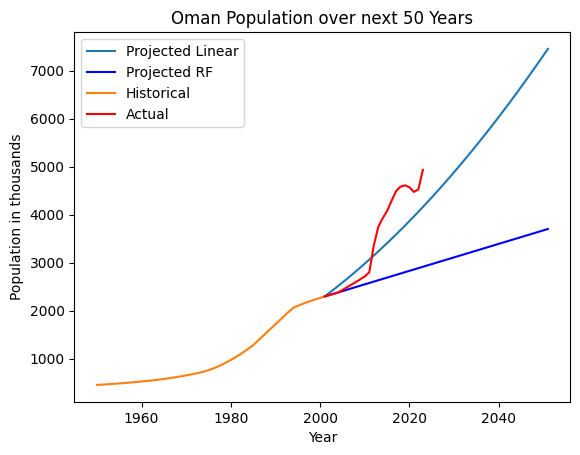

Qatar
2692     1950
2929     1951
3166     1952
3403     1953
3640     1954
3877     1955
4188     1956
4425     1957
4662     1958
4973     1959
5210     1960
5521     1961
5758     1962
6069     1963
6306     1964
6543     1965
6780     1966
7017     1967
7402     1968
7639     1969
7950     1970
8187     1971
8498     1972
8735     1973
8972     1974
9283     1975
9520     1976
9757     1977
10068    1978
10305    1979
10542    1980
10779    1981
11016    1982
11253    1983
11638    1984
11875    1985
12112    1986
12423    1987
12660    1988
12897    1989
13134    1990
13371    1991
13682    1992
13919    1993
14156    1994
14393    1995
14630    1996
14941    1997
15178    1998
15415    1999
15800    2000
16037    2001
Name: Year, dtype: int64
Qatar Linear RMSE: 1045.9034111696037
Qatar RF RMSE: 1011.9954770529893


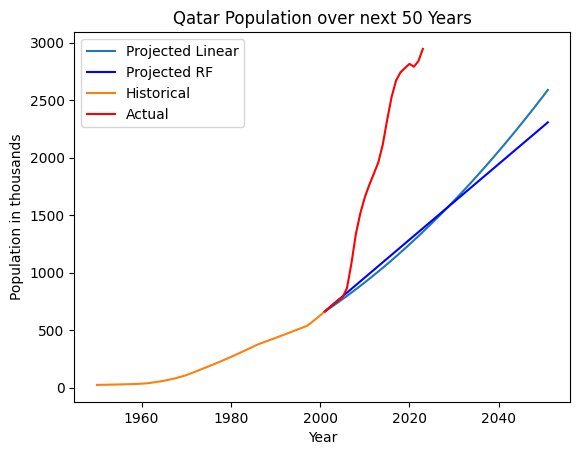

Saudi Arabia
2693     1950
2930     1951
3167     1952
3404     1953
3641     1954
3878     1955
4189     1956
4426     1957
4663     1958
4974     1959
5211     1960
5522     1961
5759     1962
6070     1963
6307     1964
6544     1965
6781     1966
7018     1967
7403     1968
7640     1969
7951     1970
8188     1971
8499     1972
8736     1973
8973     1974
9284     1975
9521     1976
9758     1977
10069    1978
10306    1979
10543    1980
10780    1981
11017    1982
11254    1983
11639    1984
11876    1985
12113    1986
12424    1987
12661    1988
12898    1989
13135    1990
13372    1991
13683    1992
13920    1993
14157    1994
14394    1995
14631    1996
14942    1997
15179    1998
15416    1999
15801    2000
16038    2001
Name: Year, dtype: int64
Saudi Arabia Linear RMSE: 1475.8126720215084
Saudi Arabia RF RMSE: 1101.0825604882814


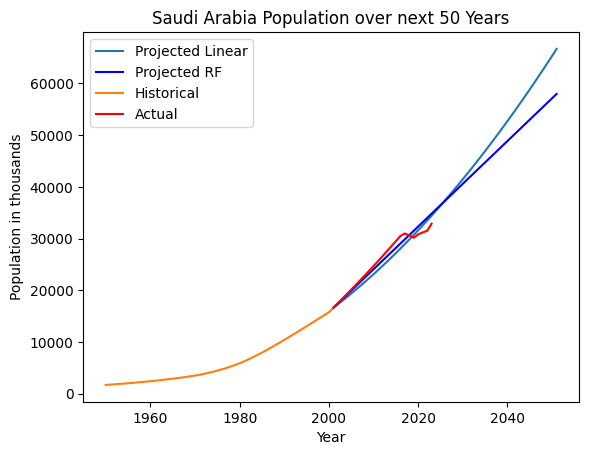

State of Palestine
2694     1950
2931     1951
3168     1952
3405     1953
3642     1954
3879     1955
4190     1956
4427     1957
4664     1958
4975     1959
5212     1960
5523     1961
5760     1962
6071     1963
6308     1964
6545     1965
6782     1966
7019     1967
7404     1968
7641     1969
7952     1970
8189     1971
8500     1972
8737     1973
8974     1974
9285     1975
9522     1976
9759     1977
10070    1978
10307    1979
10544    1980
10781    1981
11018    1982
11255    1983
11640    1984
11877    1985
12114    1986
12425    1987
12662    1988
12899    1989
13136    1990
13373    1991
13684    1992
13921    1993
14158    1994
14395    1995
14632    1996
14943    1997
15180    1998
15417    1999
15802    2000
16039    2001
Name: Year, dtype: int64
State of Palestine Linear RMSE: 379.2415114718804
State of Palestine RF RMSE: 88.34805552794337


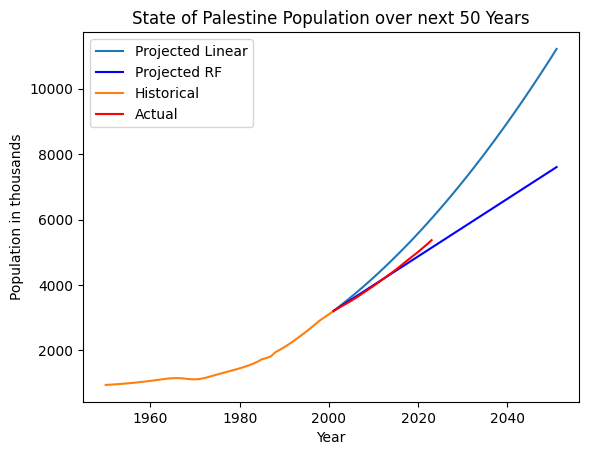

Syrian Arab Republic
2695     1950
2932     1951
3169     1952
3406     1953
3643     1954
3880     1955
4191     1956
4428     1957
4665     1958
4976     1959
5213     1960
5524     1961
5761     1962
6072     1963
6309     1964
6546     1965
6783     1966
7020     1967
7405     1968
7642     1969
7953     1970
8190     1971
8501     1972
8738     1973
8975     1974
9286     1975
9523     1976
9760     1977
10071    1978
10308    1979
10545    1980
10782    1981
11019    1982
11256    1983
11641    1984
11878    1985
12115    1986
12426    1987
12663    1988
12900    1989
13137    1990
13374    1991
13685    1992
13922    1993
14159    1994
14396    1995
14633    1996
14944    1997
15181    1998
15418    1999
15803    2000
16040    2001
Name: Year, dtype: int64
Syrian Arab Republic Linear RMSE: 3837.126173936871
Syrian Arab Republic RF RMSE: 2562.3219046478052


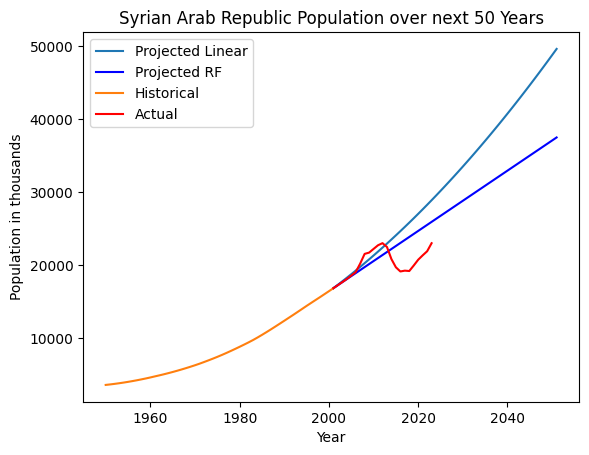

Türkiye
2696     1950
2933     1951
3170     1952
3407     1953
3644     1954
3881     1955
4192     1956
4429     1957
4666     1958
4977     1959
5214     1960
5525     1961
5762     1962
6073     1963
6310     1964
6547     1965
6784     1966
7021     1967
7406     1968
7643     1969
7954     1970
8191     1971
8502     1972
8739     1973
8976     1974
9287     1975
9524     1976
9761     1977
10072    1978
10309    1979
10546    1980
10783    1981
11020    1982
11257    1983
11642    1984
11879    1985
12116    1986
12427    1987
12664    1988
12901    1989
13138    1990
13375    1991
13686    1992
13923    1993
14160    1994
14397    1995
14634    1996
14945    1997
15182    1998
15419    1999
15804    2000
16041    2001
Name: Year, dtype: int64
Türkiye Linear RMSE: 1774.5298136327506
Türkiye RF RMSE: 2290.7712478754283


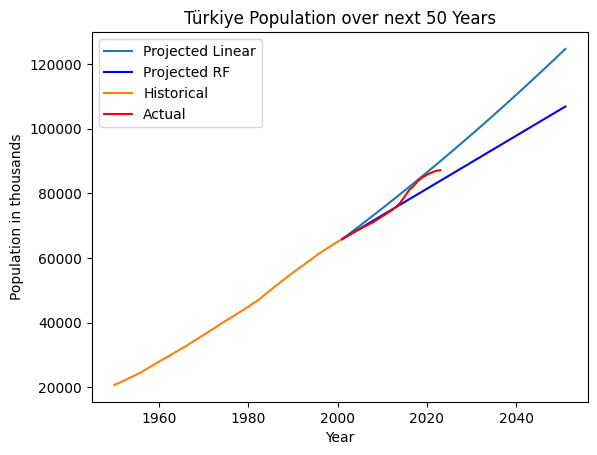

United Arab Emirates
2697     1950
2934     1951
3171     1952
3408     1953
3645     1954
3882     1955
4193     1956
4430     1957
4667     1958
4978     1959
5215     1960
5526     1961
5763     1962
6074     1963
6311     1964
6548     1965
6785     1966
7022     1967
7407     1968
7644     1969
7955     1970
8192     1971
8503     1972
8740     1973
8977     1974
9288     1975
9525     1976
9762     1977
10073    1978
10310    1979
10547    1980
10784    1981
11021    1982
11258    1983
11643    1984
11880    1985
12117    1986
12428    1987
12665    1988
12902    1989
13139    1990
13376    1991
13687    1992
13924    1993
14161    1994
14398    1995
14635    1996
14946    1997
15183    1998
15420    1999
15805    2000
16042    2001
Name: Year, dtype: int64
United Arab Emirates Linear RMSE: 1452.5358644831026
United Arab Emirates RF RMSE: 1223.8363475917672


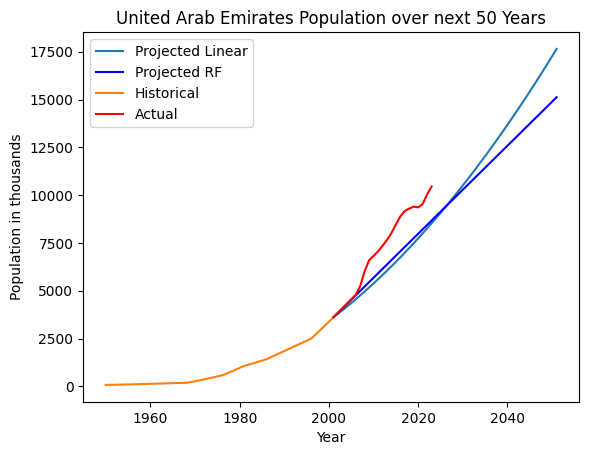

Yemen
2698     1950
2935     1951
3172     1952
3409     1953
3646     1954
3883     1955
4194     1956
4431     1957
4668     1958
4979     1959
5216     1960
5527     1961
5764     1962
6075     1963
6312     1964
6549     1965
6786     1966
7023     1967
7408     1968
7645     1969
7956     1970
8193     1971
8504     1972
8741     1973
8978     1974
9289     1975
9526     1976
9763     1977
10074    1978
10311    1979
10548    1980
10785    1981
11022    1982
11259    1983
11644    1984
11881    1985
12118    1986
12429    1987
12666    1988
12903    1989
13140    1990
13377    1991
13688    1992
13925    1993
14162    1994
14399    1995
14636    1996
14947    1997
15184    1998
15421    1999
15806    2000
16043    2001
Name: Year, dtype: int64
Yemen Linear RMSE: 975.8054265763333
Yemen RF RMSE: 2632.515254615811


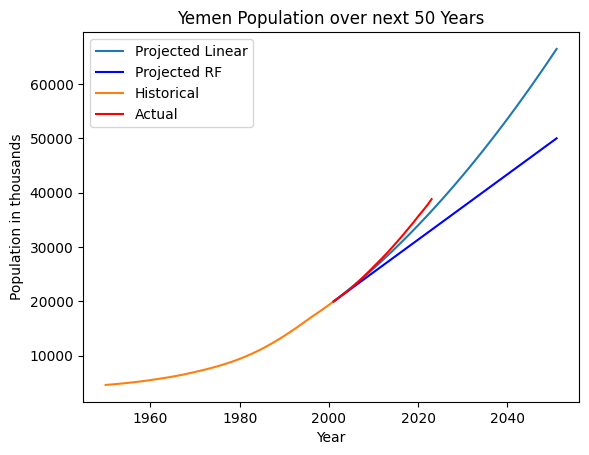

Belarus
2699     1950
2936     1951
3173     1952
3410     1953
3647     1954
3884     1955
4195     1956
4432     1957
4669     1958
4980     1959
5217     1960
5528     1961
5765     1962
6076     1963
6313     1964
6550     1965
6787     1966
7024     1967
7409     1968
7646     1969
7957     1970
8194     1971
8505     1972
8742     1973
8979     1974
9290     1975
9527     1976
9764     1977
10075    1978
10312    1979
10549    1980
10786    1981
11023    1982
11260    1983
11645    1984
11882    1985
12119    1986
12430    1987
12667    1988
12904    1989
13141    1990
13378    1991
13689    1992
13926    1993
14163    1994
14400    1995
14637    1996
14948    1997
15185    1998
15422    1999
15807    2000
16044    2001
Name: Year, dtype: int64
Belarus Linear RMSE: 190.10088557111007
Belarus RF RMSE: 259.1048050241712


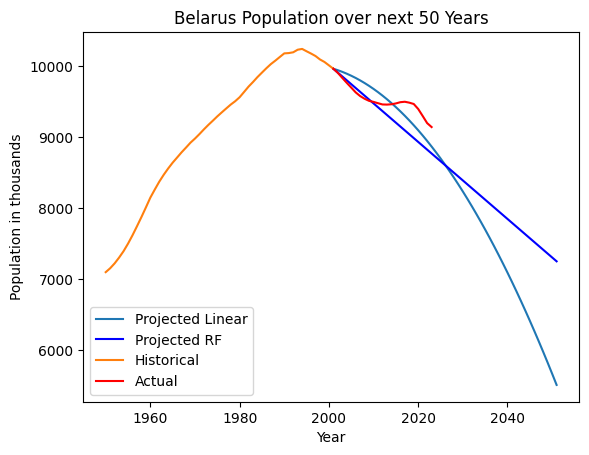

Bulgaria
2700     1950
2937     1951
3174     1952
3411     1953
3648     1954
3885     1955
4196     1956
4433     1957
4670     1958
4981     1959
5218     1960
5529     1961
5766     1962
6077     1963
6314     1964
6551     1965
6788     1966
7025     1967
7410     1968
7647     1969
7958     1970
8195     1971
8506     1972
8743     1973
8980     1974
9291     1975
9528     1976
9765     1977
10076    1978
10313    1979
10550    1980
10787    1981
11024    1982
11261    1983
11646    1984
11883    1985
12120    1986
12431    1987
12668    1988
12905    1989
13142    1990
13379    1991
13690    1992
13927    1993
14164    1994
14401    1995
14638    1996
14949    1997
15186    1998
15423    1999
15808    2000
16045    2001
Name: Year, dtype: int64
Bulgaria Linear RMSE: 668.7567012648396
Bulgaria RF RMSE: 240.30197839479766


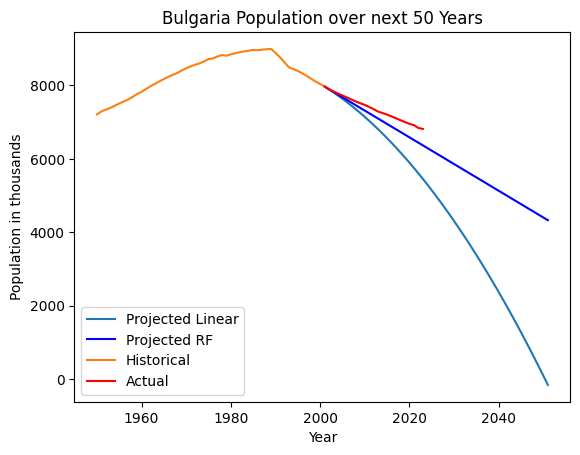

Czechia
2701     1950
2938     1951
3175     1952
3412     1953
3649     1954
3886     1955
4197     1956
4434     1957
4671     1958
4982     1959
5219     1960
5530     1961
5767     1962
6078     1963
6315     1964
6552     1965
6789     1966
7026     1967
7411     1968
7648     1969
7959     1970
8196     1971
8507     1972
8744     1973
8981     1974
9292     1975
9529     1976
9766     1977
10077    1978
10314    1979
10551    1980
10788    1981
11025    1982
11262    1983
11647    1984
11884    1985
12121    1986
12432    1987
12669    1988
12906    1989
13143    1990
13380    1991
13691    1992
13928    1993
14165    1994
14402    1995
14639    1996
14950    1997
15187    1998
15424    1999
15809    2000
16046    2001
Name: Year, dtype: int64
Czechia Linear RMSE: 630.083803856761
Czechia RF RMSE: 283.3631000527626


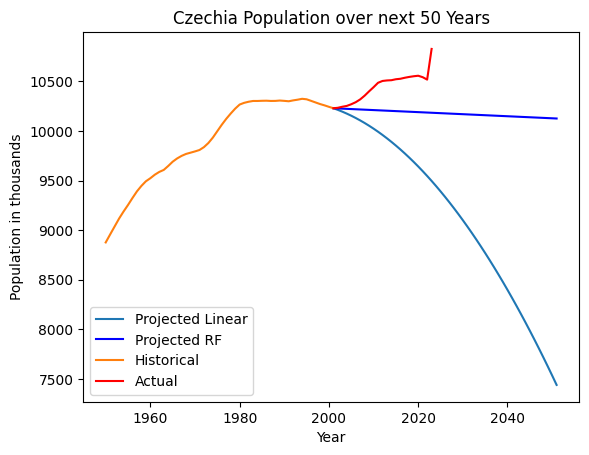

Hungary
2702     1950
2939     1951
3176     1952
3413     1953
3650     1954
3887     1955
4198     1956
4435     1957
4672     1958
4983     1959
5220     1960
5531     1961
5768     1962
6079     1963
6316     1964
6553     1965
6790     1966
7027     1967
7412     1968
7649     1969
7960     1970
8197     1971
8508     1972
8745     1973
8982     1974
9293     1975
9530     1976
9767     1977
10078    1978
10315    1979
10552    1980
10789    1981
11026    1982
11263    1983
11648    1984
11885    1985
12122    1986
12433    1987
12670    1988
12907    1989
13144    1990
13381    1991
13692    1992
13929    1993
14166    1994
14403    1995
14640    1996
14951    1997
15188    1998
15425    1999
15810    2000
16047    2001
Name: Year, dtype: int64
Hungary Linear RMSE: 506.67945851490686
Hungary RF RMSE: 30.363131132637566


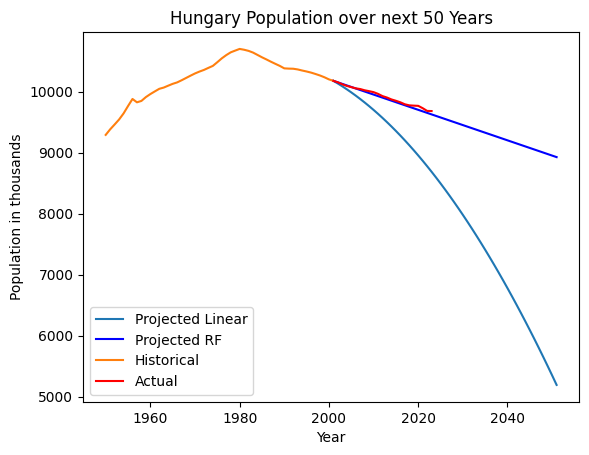

Poland
2703     1950
2940     1951
3177     1952
3414     1953
3651     1954
3888     1955
4199     1956
4436     1957
4673     1958
4984     1959
5221     1960
5532     1961
5769     1962
6080     1963
6317     1964
6554     1965
6791     1966
7028     1967
7413     1968
7650     1969
7961     1970
8198     1971
8509     1972
8746     1973
8983     1974
9294     1975
9531     1976
9768     1977
10079    1978
10316    1979
10553    1980
10790    1981
11027    1982
11264    1983
11649    1984
11886    1985
12123    1986
12434    1987
12671    1988
12908    1989
13145    1990
13382    1991
13693    1992
13930    1993
14167    1994
14404    1995
14641    1996
14952    1997
15189    1998
15426    1999
15811    2000
16048    2001
Name: Year, dtype: int64
Poland Linear RMSE: 967.5744196655081
Poland RF RMSE: 246.02299896241607


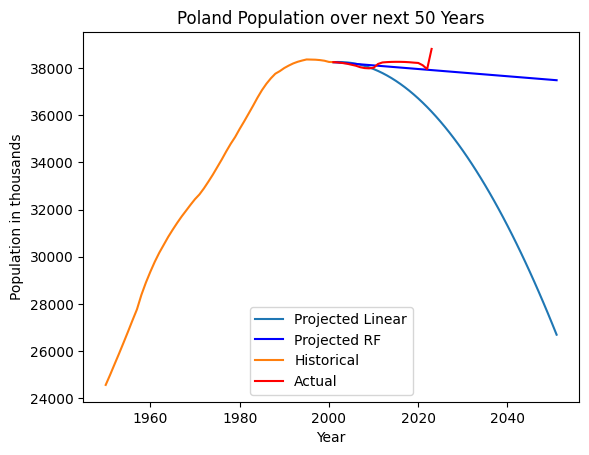

Republic of Moldova
2704     1950
2941     1951
3178     1952
3415     1953
3652     1954
3889     1955
4200     1956
4437     1957
4674     1958
4985     1959
5222     1960
5533     1961
5770     1962
6081     1963
6318     1964
6555     1965
6792     1966
7029     1967
7414     1968
7651     1969
7962     1970
8199     1971
8510     1972
8747     1973
8984     1974
9295     1975
9532     1976
9769     1977
10080    1978
10317    1979
10554    1980
10791    1981
11028    1982
11265    1983
11650    1984
11887    1985
12124    1986
12435    1987
12672    1988
12909    1989
13146    1990
13383    1991
13694    1992
13931    1993
14168    1994
14405    1995
14642    1996
14953    1997
15190    1998
15427    1999
15812    2000
16049    2001
Name: Year, dtype: int64
Republic of Moldova Linear RMSE: 402.44190769559276
Republic of Moldova RF RMSE: 189.29215610529906


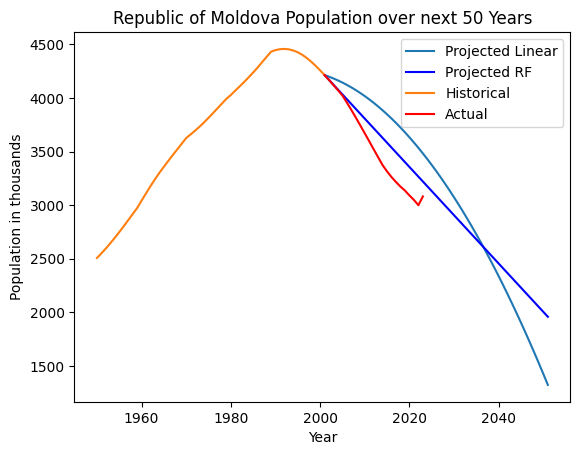

Romania
2705     1950
2942     1951
3179     1952
3416     1953
3653     1954
3890     1955
4201     1956
4438     1957
4675     1958
4986     1959
5223     1960
5534     1961
5771     1962
6082     1963
6319     1964
6556     1965
6793     1966
7030     1967
7415     1968
7652     1969
7963     1970
8200     1971
8511     1972
8748     1973
8985     1974
9296     1975
9533     1976
9770     1977
10081    1978
10318    1979
10555    1980
10792    1981
11029    1982
11266    1983
11651    1984
11888    1985
12125    1986
12436    1987
12673    1988
12910    1989
13147    1990
13384    1991
13695    1992
13932    1993
14169    1994
14406    1995
14643    1996
14954    1997
15191    1998
15428    1999
15813    2000
16050    2001
Name: Year, dtype: int64
Romania Linear RMSE: 436.41134609768915
Romania RF RMSE: 228.8313878820916


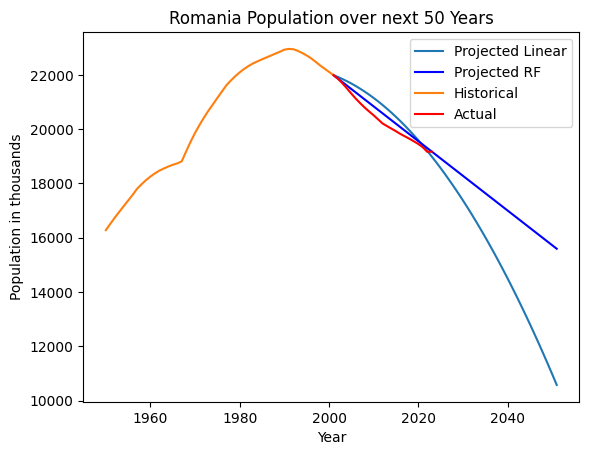

Russian Federation
2706     1950
2943     1951
3180     1952
3417     1953
3654     1954
3891     1955
4202     1956
4439     1957
4676     1958
4987     1959
5224     1960
5535     1961
5772     1962
6083     1963
6320     1964
6557     1965
6794     1966
7031     1967
7416     1968
7653     1969
7964     1970
8201     1971
8512     1972
8749     1973
8986     1974
9297     1975
9534     1976
9771     1977
10082    1978
10319    1979
10556    1980
10793    1981
11030    1982
11267    1983
11652    1984
11889    1985
12126    1986
12437    1987
12674    1988
12911    1989
13148    1990
13385    1991
13696    1992
13933    1993
14170    1994
14407    1995
14644    1996
14955    1997
15192    1998
15429    1999
15814    2000
16051    2001
Name: Year, dtype: int64
Russian Federation Linear RMSE: 5830.741902505704
Russian Federation RF RMSE: 7406.927238481195


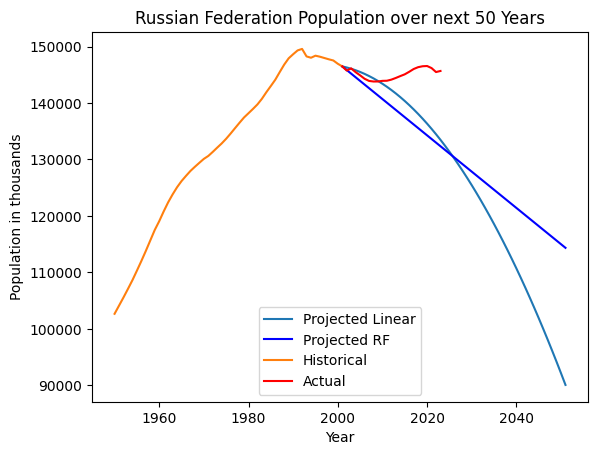

Slovakia
2707     1950
2944     1951
3181     1952
3418     1953
3655     1954
3892     1955
4203     1956
4440     1957
4677     1958
4988     1959
5225     1960
5536     1961
5773     1962
6084     1963
6321     1964
6558     1965
6795     1966
7032     1967
7417     1968
7654     1969
7965     1970
8202     1971
8513     1972
8750     1973
8987     1974
9298     1975
9535     1976
9772     1977
10083    1978
10320    1979
10557    1980
10794    1981
11031    1982
11268    1983
11653    1984
11890    1985
12127    1986
12438    1987
12675    1988
12912    1989
13149    1990
13386    1991
13697    1992
13934    1993
14171    1994
14408    1995
14645    1996
14956    1997
15193    1998
15430    1999
15815    2000
16052    2001
Name: Year, dtype: int64
Slovakia Linear RMSE: 114.7684909823527
Slovakia RF RMSE: 54.14582278662801


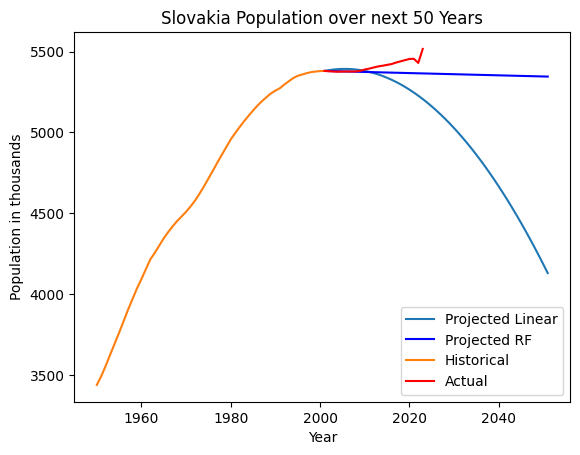

Ukraine
2708     1950
2945     1951
3182     1952
3419     1953
3656     1954
3893     1955
4204     1956
4441     1957
4678     1958
4989     1959
5226     1960
5537     1961
5774     1962
6085     1963
6322     1964
6559     1965
6796     1966
7033     1967
7418     1968
7655     1969
7966     1970
8203     1971
8514     1972
8751     1973
8988     1974
9299     1975
9536     1976
9773     1977
10084    1978
10321    1979
10558    1980
10795    1981
11032    1982
11269    1983
11654    1984
11891    1985
12128    1986
12439    1987
12676    1988
12913    1989
13150    1990
13387    1991
13698    1992
13935    1993
14172    1994
14409    1995
14646    1996
14957    1997
15194    1998
15431    1999
15816    2000
16053    2001
Name: Year, dtype: int64
Ukraine Linear RMSE: 2146.313503767801
Ukraine RF RMSE: 2413.6026789814364


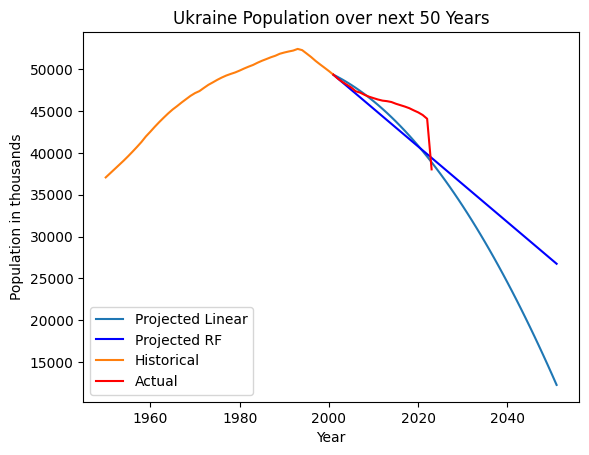

Denmark
2709     1950
2946     1951
3183     1952
3420     1953
3657     1954
3894     1955
4205     1956
4442     1957
4679     1958
4990     1959
5227     1960
5538     1961
5775     1962
6086     1963
6323     1964
6560     1965
6797     1966
7034     1967
7419     1968
7656     1969
7967     1970
8204     1971
8515     1972
8752     1973
8989     1974
9300     1975
9537     1976
9774     1977
10085    1978
10322    1979
10559    1980
10796    1981
11033    1982
11270    1983
11655    1984
11892    1985
12129    1986
12440    1987
12677    1988
12914    1989
13151    1990
13388    1991
13699    1992
13936    1993
14173    1994
14410    1995
14647    1996
14958    1997
15195    1998
15432    1999
15817    2000
16054    2001
Name: Year, dtype: int64
Denmark Linear RMSE: 261.5462421288598
Denmark RF RMSE: 71.63726268117097


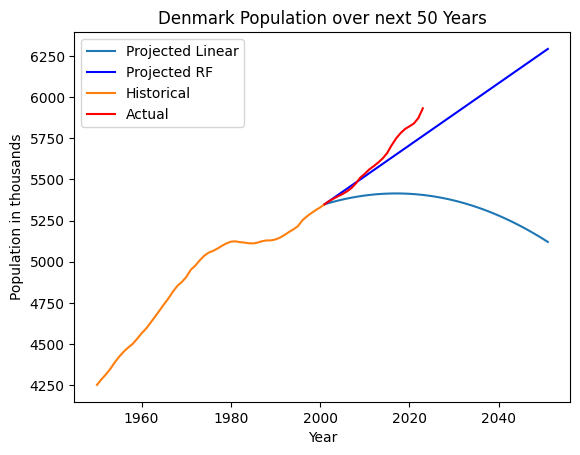

Estonia
2710     1950
2947     1951
3184     1952
3421     1953
3658     1954
3895     1955
4206     1956
4443     1957
4680     1958
4991     1959
5228     1960
5539     1961
5776     1962
6087     1963
6324     1964
6561     1965
6798     1966
7035     1967
7420     1968
7657     1969
7968     1970
8205     1971
8516     1972
8753     1973
8990     1974
9301     1975
9538     1976
9775     1977
10086    1978
10323    1979
10560    1980
10797    1981
11034    1982
11271    1983
11656    1984
11893    1985
12130    1986
12441    1987
12678    1988
12915    1989
13152    1990
13389    1991
13700    1992
13937    1993
14174    1994
14411    1995
14648    1996
14959    1997
15196    1998
15433    1999
15818    2000
16055    2001
Name: Year, dtype: int64
Estonia Linear RMSE: 143.34980510771416
Estonia RF RMSE: 62.44584451677296


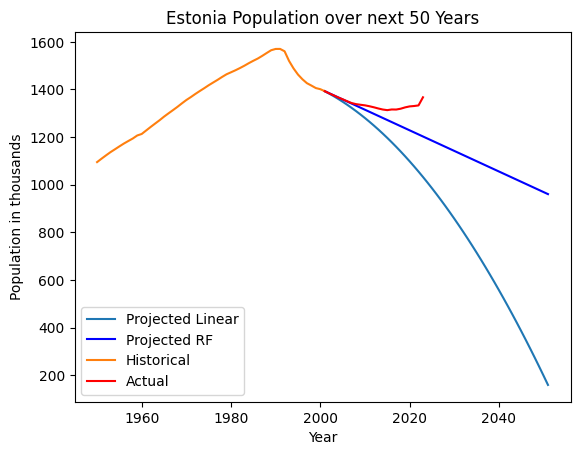

Faroe Islands
2711     1950
2948     1951
3185     1952
3422     1953
3659     1954
3896     1955
4207     1956
4444     1957
4681     1958
4992     1959
5229     1960
5540     1961
5777     1962
6088     1963
6325     1964
6562     1965
6799     1966
7036     1967
7421     1968
7658     1969
7969     1970
8206     1971
8517     1972
8754     1973
8991     1974
9302     1975
9539     1976
9776     1977
10087    1978
10324    1979
10561    1980
10798    1981
11035    1982
11272    1983
11657    1984
11894    1985
12131    1986
12442    1987
12679    1988
12916    1989
13153    1990
13390    1991
13701    1992
13938    1993
14175    1994
14412    1995
14649    1996
14960    1997
15197    1998
15434    1999
15819    2000
16056    2001
Name: Year, dtype: int64
Faroe Islands Linear RMSE: 2.499206053861433
Faroe Islands RF RMSE: 3.2655336937008426


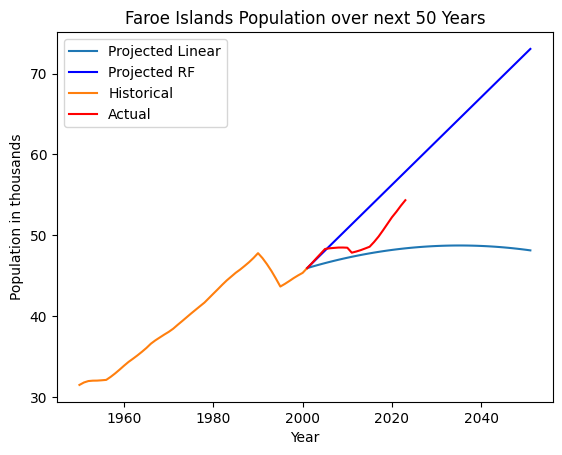

Finland
2712     1950
2949     1951
3186     1952
3423     1953
3660     1954
3897     1955
4208     1956
4445     1957
4682     1958
4993     1959
5230     1960
5541     1961
5778     1962
6089     1963
6326     1964
6563     1965
6800     1966
7037     1967
7422     1968
7659     1969
7970     1970
8207     1971
8518     1972
8755     1973
8992     1974
9303     1975
9540     1976
9777     1977
10088    1978
10325    1979
10562    1980
10799    1981
11036    1982
11273    1983
11658    1984
11895    1985
12132    1986
12443    1987
12680    1988
12917    1989
13154    1990
13391    1991
13702    1992
13939    1993
14176    1994
14413    1995
14650    1996
14961    1997
15198    1998
15435    1999
15820    2000
16057    2001
Name: Year, dtype: int64
Finland Linear RMSE: 163.01766889320044
Finland RF RMSE: 81.86647240802074


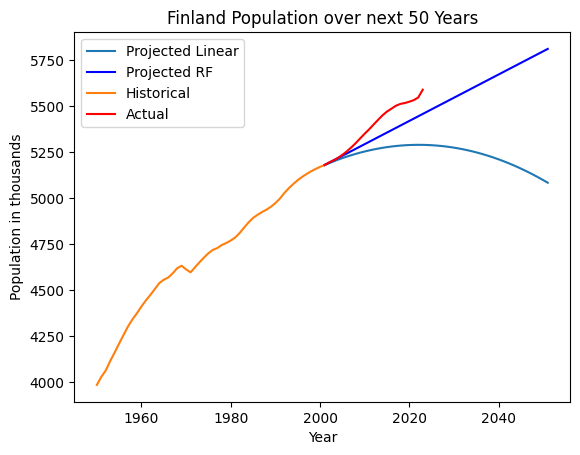

Guernsey
2713     1950
2950     1951
3187     1952
3424     1953
3661     1954
3898     1955
4209     1956
4446     1957
4683     1958
4994     1959
5231     1960
5542     1961
5779     1962
6090     1963
6327     1964
6564     1965
6801     1966
7038     1967
7423     1968
7660     1969
7971     1970
8208     1971
8519     1972
8756     1973
8993     1974
9304     1975
9541     1976
9778     1977
10089    1978
10326    1979
10563    1980
10800    1981
11037    1982
11274    1983
11659    1984
11896    1985
12133    1986
12444    1987
12681    1988
12918    1989
13155    1990
13392    1991
13703    1992
13940    1993
14177    1994
14414    1995
14651    1996
14962    1997
15199    1998
15436    1999
15821    2000
16058    2001
Name: Year, dtype: int64
Guernsey Linear RMSE: 0.5644386064497318
Guernsey RF RMSE: 0.6596721884192792


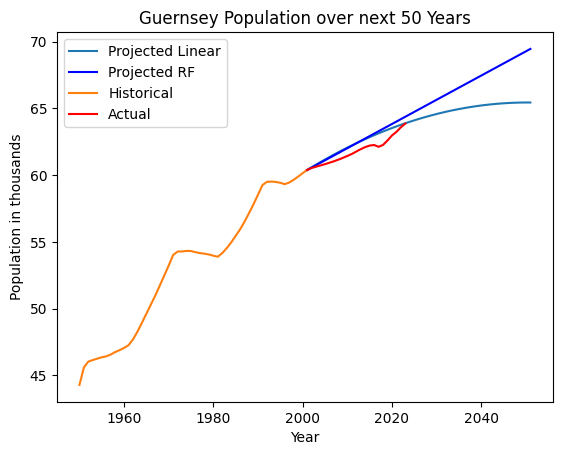

Iceland
2714     1950
2951     1951
3188     1952
3425     1953
3662     1954
3899     1955
4210     1956
4447     1957
4684     1958
4995     1959
5232     1960
5543     1961
5780     1962
6091     1963
6328     1964
6565     1965
6802     1966
7039     1967
7424     1968
7661     1969
7972     1970
8209     1971
8520     1972
8757     1973
8994     1974
9305     1975
9542     1976
9779     1977
10090    1978
10327    1979
10564    1980
10801    1981
11038    1982
11275    1983
11660    1984
11897    1985
12134    1986
12445    1987
12682    1988
12919    1989
13156    1990
13393    1991
13704    1992
13941    1993
14178    1994
14415    1995
14652    1996
14963    1997
15200    1998
15437    1999
15822    2000
16059    2001
Name: Year, dtype: int64
Iceland Linear RMSE: 21.052522625646283
Iceland RF RMSE: 8.806347734279127


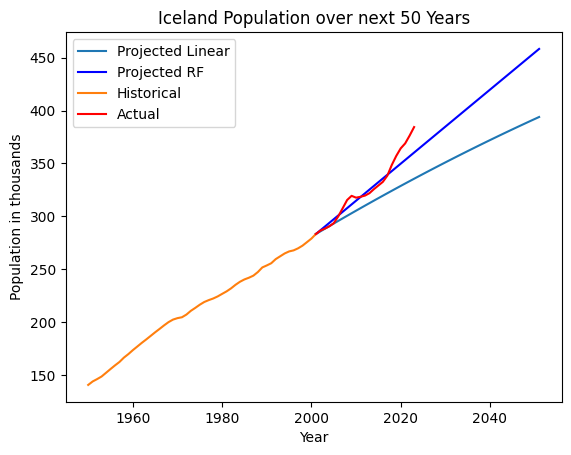

Ireland
2715     1950
2952     1951
3189     1952
3426     1953
3663     1954
3900     1955
4211     1956
4448     1957
4685     1958
4996     1959
5233     1960
5544     1961
5781     1962
6092     1963
6329     1964
6566     1965
6803     1966
7040     1967
7425     1968
7662     1969
7973     1970
8210     1971
8521     1972
8758     1973
8995     1974
9306     1975
9543     1976
9780     1977
10091    1978
10328    1979
10565    1980
10802    1981
11039    1982
11276    1983
11661    1984
11898    1985
12135    1986
12446    1987
12683    1988
12920    1989
13157    1990
13468    1991
13705    1992
13942    1993
14179    1994
14416    1995
14653    1996
14964    1997
15201    1998
15438    1999
15823    2000
16060    2001
Name: Year, dtype: int64
Ireland Linear RMSE: 250.9877464739399
Ireland RF RMSE: 86.0854674377335


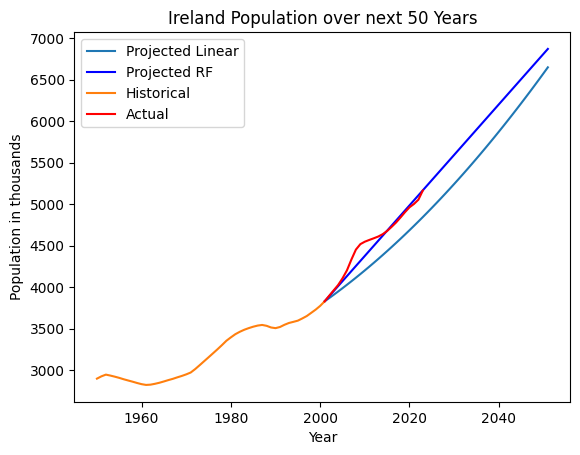

Isle of Man
2716     1950
2953     1951
3190     1952
3427     1953
3664     1954
3901     1955
4212     1956
4449     1957
4686     1958
4997     1959
5234     1960
5545     1961
5782     1962
6093     1963
6330     1964
6567     1965
6804     1966
7041     1967
7426     1968
7663     1969
7974     1970
8211     1971
8522     1972
8759     1973
8996     1974
9307     1975
9544     1976
9781     1977
10092    1978
10329    1979
10566    1980
10803    1981
11040    1982
11277    1983
11662    1984
11899    1985
12136    1986
12447    1987
12684    1988
12921    1989
13158    1990
13469    1991
13706    1992
13943    1993
14180    1994
14417    1995
14654    1996
14965    1997
15202    1998
15439    1999
15824    2000
16061    2001
Name: Year, dtype: int64
Isle of Man Linear RMSE: 9.982185846798552
Isle of Man RF RMSE: 4.6529341121676975


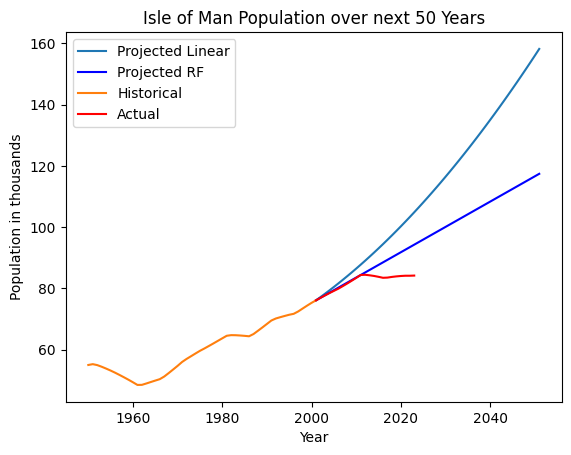

Jersey
2717     1950
2954     1951
3191     1952
3428     1953
3665     1954
3902     1955
4213     1956
4450     1957
4687     1958
4998     1959
5235     1960
5546     1961
5783     1962
6094     1963
6331     1964
6568     1965
6805     1966
7042     1967
7427     1968
7664     1969
7975     1970
8212     1971
8523     1972
8760     1973
8997     1974
9308     1975
9545     1976
9782     1977
10093    1978
10330    1979
10567    1980
10804    1981
11041    1982
11278    1983
11663    1984
11900    1985
12137    1986
12448    1987
12685    1988
12922    1989
13159    1990
13470    1991
13707    1992
13944    1993
14181    1994
14418    1995
14655    1996
14966    1997
15203    1998
15440    1999
15825    2000
16062    2001
Name: Year, dtype: int64
Jersey Linear RMSE: 4.956361610540486
Jersey RF RMSE: 2.6127180832462527


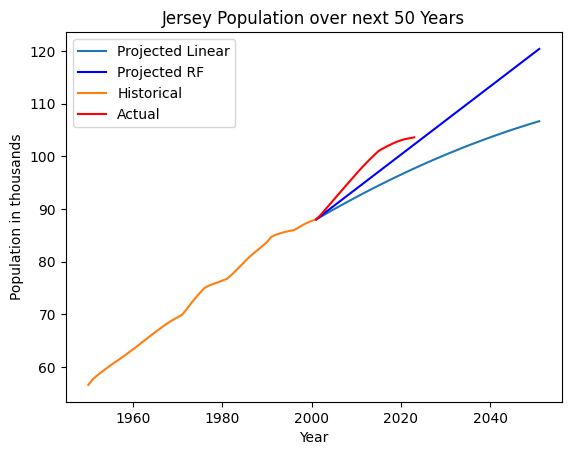

Latvia
2718     1950
2955     1951
3192     1952
3429     1953
3666     1954
3903     1955
4214     1956
4451     1957
4688     1958
4999     1959
5236     1960
5547     1961
5784     1962
6095     1963
6332     1964
6569     1965
6806     1966
7043     1967
7428     1968
7665     1969
7976     1970
8213     1971
8524     1972
8761     1973
8998     1974
9309     1975
9546     1976
9783     1977
10094    1978
10331    1979
10568    1980
10805    1981
11042    1982
11279    1983
11664    1984
11901    1985
12138    1986
12449    1987
12686    1988
12923    1989
13160    1990
13471    1991
13708    1992
13945    1993
14182    1994
14419    1995
14656    1996
14967    1997
15204    1998
15441    1999
15826    2000
16063    2001
Name: Year, dtype: int64
Latvia Linear RMSE: 74.21414718796589
Latvia RF RMSE: 71.24794472537876


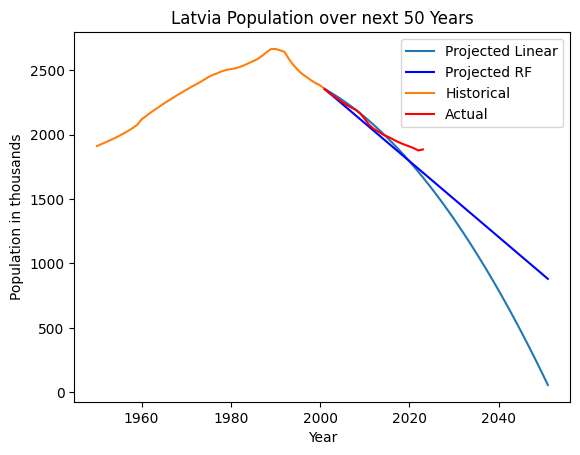

Lithuania
2719     1950
2956     1951
3193     1952
3430     1953
3667     1954
3904     1955
4215     1956
4452     1957
4689     1958
5000     1959
5237     1960
5548     1961
5785     1962
6096     1963
6333     1964
6570     1965
6807     1966
7044     1967
7429     1968
7666     1969
7977     1970
8214     1971
8525     1972
8762     1973
8999     1974
9310     1975
9547     1976
9784     1977
10095    1978
10332    1979
10569    1980
10806    1981
11043    1982
11280    1983
11665    1984
11902    1985
12139    1986
12450    1987
12687    1988
12924    1989
13161    1990
13472    1991
13709    1992
13946    1993
14183    1994
14420    1995
14657    1996
14968    1997
15205    1998
15442    1999
15827    2000
16064    2001
Name: Year, dtype: int64
Lithuania Linear RMSE: 224.6497833394371
Lithuania RF RMSE: 110.21240903014574


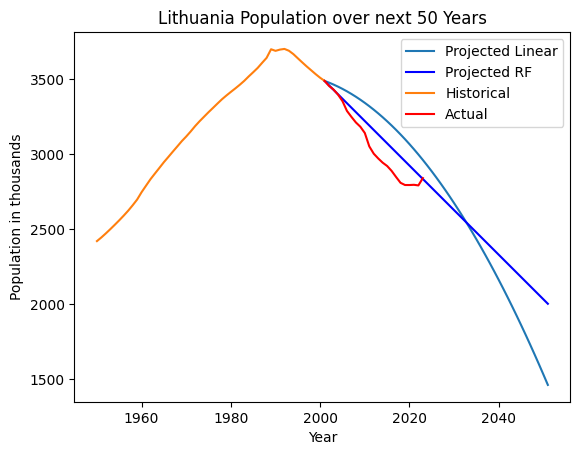

Norway
2720     1950
2957     1951
3194     1952
3431     1953
3668     1954
3905     1955
4216     1956
4453     1957
4690     1958
5001     1959
5238     1960
5549     1961
5786     1962
6097     1963
6334     1964
6571     1965
6808     1966
7045     1967
7430     1968
7667     1969
7978     1970
8215     1971
8526     1972
8763     1973
9000     1974
9311     1975
9548     1976
9785     1977
10096    1978
10333    1979
10570    1980
10807    1981
11044    1982
11281    1983
11666    1984
11903    1985
12140    1986
12451    1987
12688    1988
12925    1989
13162    1990
13473    1991
13710    1992
13947    1993
14184    1994
14421    1995
14658    1996
14969    1997
15206    1998
15443    1999
15828    2000
16065    2001
Name: Year, dtype: int64
Norway Linear RMSE: 372.46384656747193
Norway RF RMSE: 281.1765230243121


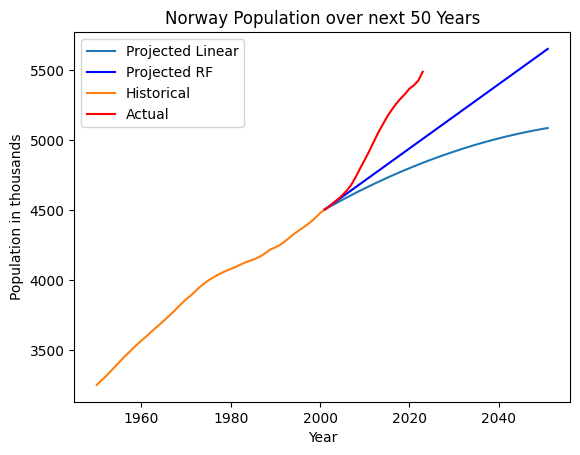

Sweden
2721     1950
2958     1951
3195     1952
3432     1953
3669     1954
3906     1955
4217     1956
4454     1957
4691     1958
5002     1959
5239     1960
5550     1961
5787     1962
6098     1963
6335     1964
6572     1965
6809     1966
7046     1967
7431     1968
7668     1969
7979     1970
8216     1971
8527     1972
8764     1973
9001     1974
9312     1975
9549     1976
9786     1977
10097    1978
10334    1979
10571    1980
10808    1981
11045    1982
11282    1983
11667    1984
11904    1985
12141    1986
12452    1987
12689    1988
12926    1989
13163    1990
13474    1991
13711    1992
13948    1993
14185    1994
14422    1995
14659    1996
14970    1997
15207    1998
15444    1999
15829    2000
16066    2001
Name: Year, dtype: int64
Sweden Linear RMSE: 681.2249556271349
Sweden RF RMSE: 594.3724121236633


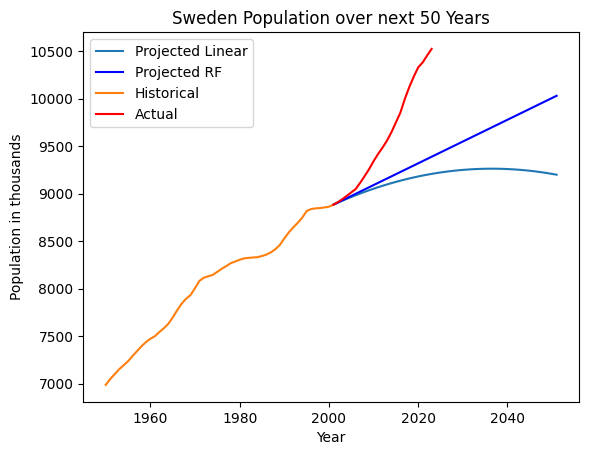

United Kingdom
2722     1950
2959     1951
3196     1952
3433     1953
3670     1954
3907     1955
4218     1956
4455     1957
4692     1958
5003     1959
5240     1960
5551     1961
5788     1962
6099     1963
6336     1964
6573     1965
6810     1966
7047     1967
7432     1968
7669     1969
7980     1970
8217     1971
8528     1972
8765     1973
9002     1974
9313     1975
9550     1976
9787     1977
10098    1978
10335    1979
10572    1980
10809    1981
11046    1982
11283    1983
11668    1984
11905    1985
12142    1986
12453    1987
12690    1988
12927    1989
13164    1990
13475    1991
13712    1992
13949    1993
14186    1994
14423    1995
14660    1996
14971    1997
15208    1998
15445    1999
15830    2000
16067    2001
Name: Year, dtype: int64
United Kingdom Linear RMSE: 4403.310525368012
United Kingdom RF RMSE: 2413.176528308108


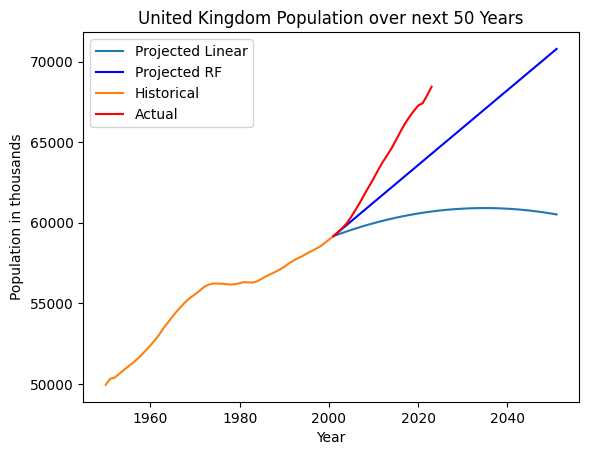

Albania
2723     1950
2960     1951
3197     1952
3434     1953
3671     1954
3908     1955
4219     1956
4456     1957
4693     1958
5004     1959
5241     1960
5552     1961
5789     1962
6100     1963
6337     1964
6574     1965
6811     1966
7048     1967
7433     1968
7670     1969
7981     1970
8218     1971
8529     1972
8766     1973
9003     1974
9314     1975
9551     1976
9788     1977
10099    1978
10336    1979
10573    1980
10810    1981
11047    1982
11284    1983
11669    1984
11906    1985
12143    1986
12454    1987
12691    1988
12928    1989
13165    1990
13476    1991
13713    1992
13950    1993
14187    1994
14424    1995
14661    1996
14972    1997
15209    1998
15446    1999
15831    2000
16068    2001
Name: Year, dtype: int64
Albania Linear RMSE: 232.299453862056
Albania RF RMSE: 34.53925614062545


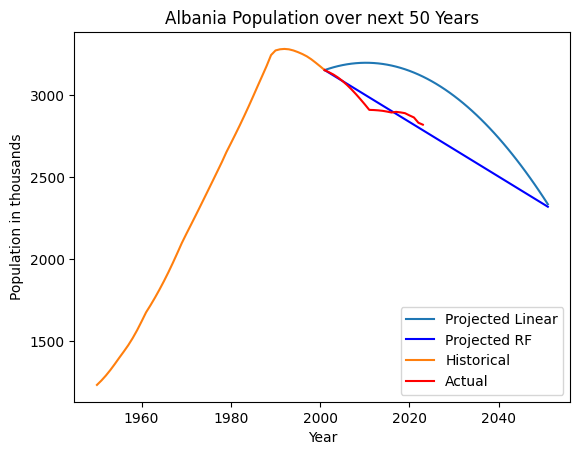

Andorra
2724     1950
2961     1951
3198     1952
3435     1953
3672     1954
3909     1955
4220     1956
4457     1957
4694     1958
5005     1959
5242     1960
5553     1961
5790     1962
6101     1963
6338     1964
6575     1965
6812     1966
7049     1967
7434     1968
7671     1969
7982     1970
8219     1971
8530     1972
8767     1973
9004     1974
9315     1975
9552     1976
9789     1977
10100    1978
10337    1979
10574    1980
10811    1981
11048    1982
11285    1983
11670    1984
11907    1985
12144    1986
12455    1987
12692    1988
12929    1989
13166    1990
13477    1991
13714    1992
13951    1993
14188    1994
14425    1995
14662    1996
14973    1997
15210    1998
15447    1999
15832    2000
16069    2001
Name: Year, dtype: int64
Andorra Linear RMSE: 14.888264982667367
Andorra RF RMSE: 8.351806391663242


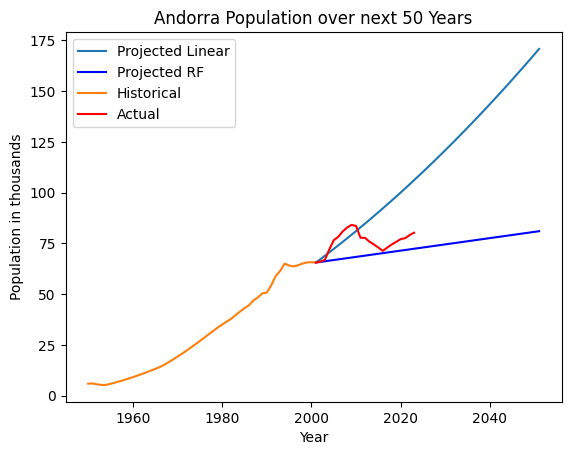

Bosnia and Herzegovina
2725     1950
2962     1951
3199     1952
3436     1953
3673     1954
3910     1955
4221     1956
4458     1957
4695     1958
5006     1959
5243     1960
5554     1961
5791     1962
6102     1963
6339     1964
6576     1965
6813     1966
7050     1967
7435     1968
7672     1969
7983     1970
8220     1971
8531     1972
8768     1973
9005     1974
9316     1975
9553     1976
9790     1977
10101    1978
10338    1979
10575    1980
10812    1981
11049    1982
11286    1983
11671    1984
11908    1985
12145    1986
12456    1987
12693    1988
12930    1989
13167    1990
13478    1991
13715    1992
13952    1993
14189    1994
14426    1995
14663    1996
14974    1997
15211    1998
15448    1999
15833    2000
16070    2001
Name: Year, dtype: int64
Bosnia and Herzegovina Linear RMSE: 268.22479378892234
Bosnia and Herzegovina RF RMSE: 840.8785778318836


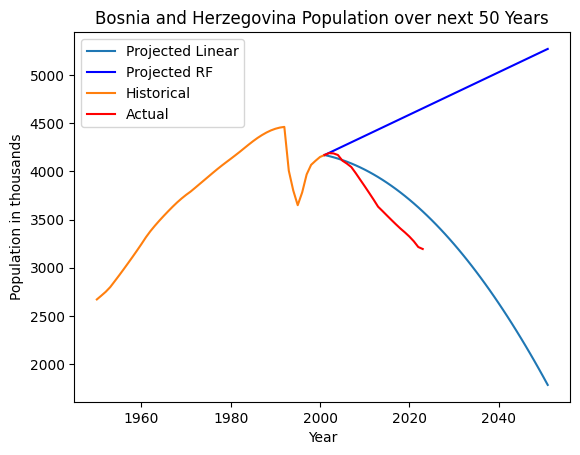

Croatia
2726     1950
2963     1951
3200     1952
3437     1953
3674     1954
3911     1955
4222     1956
4459     1957
4696     1958
5007     1959
5244     1960
5555     1961
5792     1962
6103     1963
6340     1964
6577     1965
6814     1966
7051     1967
7436     1968
7673     1969
7984     1970
8221     1971
8532     1972
8769     1973
9006     1974
9317     1975
9554     1976
9791     1977
10102    1978
10339    1979
10576    1980
10813    1981
11050    1982
11287    1983
11672    1984
11909    1985
12146    1986
12457    1987
12694    1988
12931    1989
13168    1990
13479    1991
13716    1992
13953    1993
14190    1994
14427    1995
14664    1996
14975    1997
15212    1998
15449    1999
15834    2000
16071    2001
Name: Year, dtype: int64
Croatia Linear RMSE: 474.54273354534115
Croatia RF RMSE: 93.2486732732477


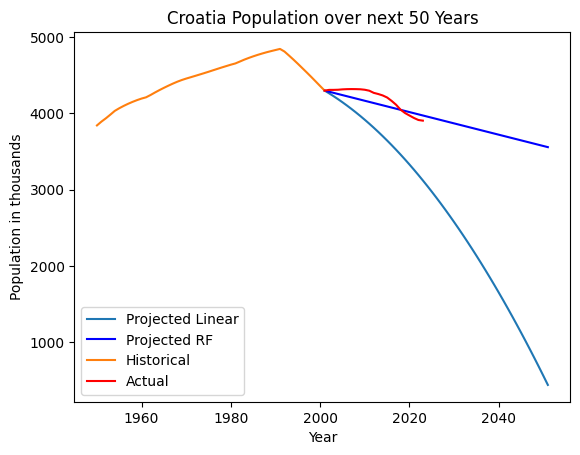

Gibraltar
2727     1950
2964     1951
3201     1952
3438     1953
3675     1954
3912     1955
4223     1956
4460     1957
4697     1958
5008     1959
5245     1960
5556     1961
5793     1962
6104     1963
6341     1964
6578     1965
6815     1966
7052     1967
7437     1968
7674     1969
7985     1970
8222     1971
8533     1972
8770     1973
9007     1974
9318     1975
9555     1976
9792     1977
10103    1978
10340    1979
10577    1980
10814    1981
11051    1982
11288    1983
11673    1984
11910    1985
12147    1986
12458    1987
12695    1988
12932    1989
13169    1990
13480    1991
13717    1992
13954    1993
14191    1994
14428    1995
14665    1996
14976    1997
15213    1998
15450    1999
15835    2000
16072    2001
Name: Year, dtype: int64
Gibraltar Linear RMSE: 6.159790484489639
Gibraltar RF RMSE: 6.130983631388031


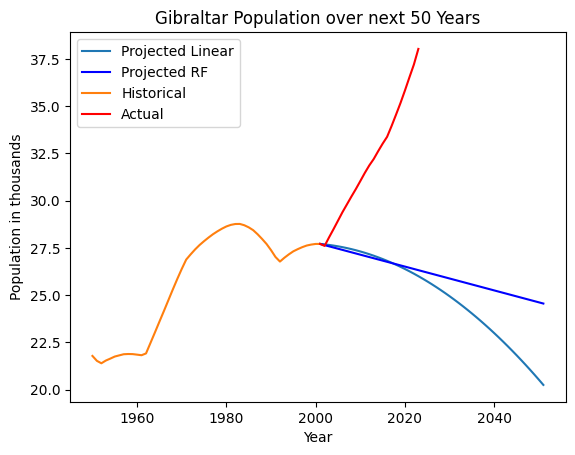

Greece
2728     1950
2965     1951
3202     1952
3439     1953
3676     1954
3913     1955
4224     1956
4461     1957
4698     1958
5009     1959
5246     1960
5557     1961
5794     1962
6105     1963
6342     1964
6579     1965
6816     1966
7053     1967
7438     1968
7675     1969
7986     1970
8223     1971
8534     1972
8771     1973
9008     1974
9319     1975
9556     1976
9793     1977
10104    1978
10341    1979
10578    1980
10815    1981
11052    1982
11289    1983
11674    1984
11911    1985
12148    1986
12459    1987
12696    1988
12933    1989
13170    1990
13481    1991
13718    1992
13955    1993
14192    1994
14429    1995
14666    1996
14977    1997
15214    1998
15451    1999
15836    2000
16073    2001
Name: Year, dtype: int64
Greece Linear RMSE: 802.1471179493216
Greece RF RMSE: 828.3742862894381


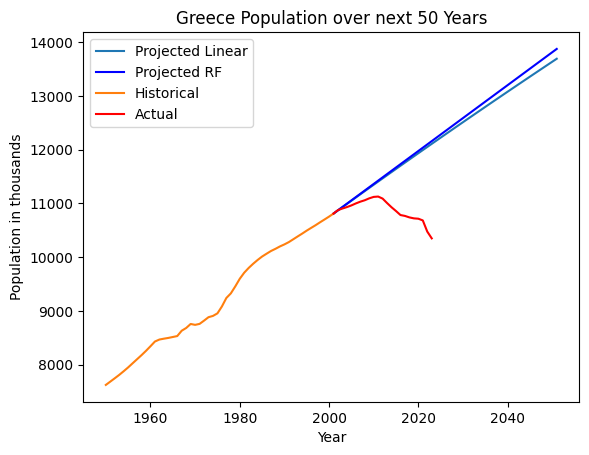

Holy See
2729     1950
2966     1951
3203     1952
3440     1953
3677     1954
3914     1955
4225     1956
4462     1957
4699     1958
5010     1959
5247     1960
5558     1961
5795     1962
6106     1963
6343     1964
6580     1965
6817     1966
7054     1967
7439     1968
7676     1969
7987     1970
8224     1971
8535     1972
8772     1973
9009     1974
9320     1975
9557     1976
9794     1977
10105    1978
10342    1979
10579    1980
10816    1981
11053    1982
11290    1983
11675    1984
11912    1985
12149    1986
12460    1987
12697    1988
12934    1989
13171    1990
13482    1991
13719    1992
13956    1993
14193    1994
14430    1995
14667    1996
14978    1997
15215    1998
15452    1999
15837    2000
16074    2001
Name: Year, dtype: int64
Holy See Linear RMSE: 0.03420617419728048
Holy See RF RMSE: 0.017026776227332504


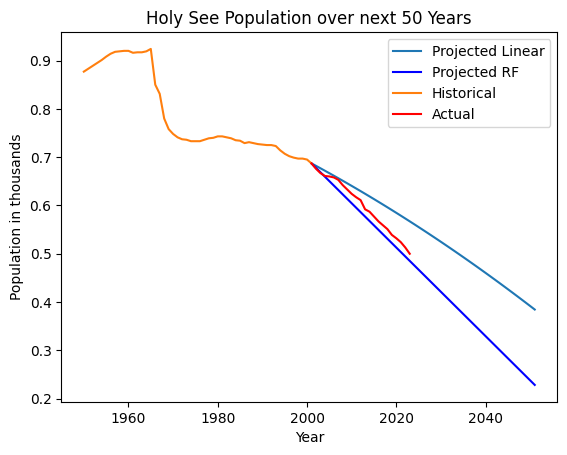

Italy
2730     1950
2967     1951
3204     1952
3441     1953
3678     1954
3915     1955
4226     1956
4463     1957
4700     1958
5011     1959
5248     1960
5559     1961
5796     1962
6107     1963
6344     1964
6581     1965
6818     1966
7055     1967
7440     1968
7677     1969
7988     1970
8225     1971
8536     1972
8773     1973
9010     1974
9321     1975
9558     1976
9795     1977
10106    1978
10343    1979
10580    1980
10817    1981
11054    1982
11291    1983
11676    1984
11913    1985
12150    1986
12461    1987
12698    1988
12935    1989
13172    1990
13483    1991
13720    1992
13957    1993
14194    1994
14431    1995
14668    1996
14979    1997
15216    1998
15453    1999
15838    2000
16075    2001
Name: Year, dtype: int64
Italy Linear RMSE: 3533.644222745832
Italy RF RMSE: 2100.496067481558


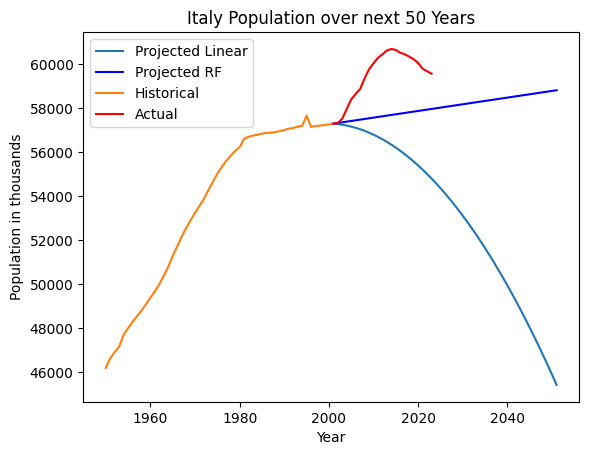

Kosovo (under UNSC res. 1244)
2731     1950
2968     1951
3205     1952
3442     1953
3679     1954
3916     1955
4227     1956
4464     1957
4701     1958
5012     1959
5249     1960
5560     1961
5797     1962
6108     1963
6345     1964
6582     1965
6819     1966
7056     1967
7441     1968
7678     1969
7989     1970
8226     1971
8537     1972
8774     1973
9011     1974
9322     1975
9559     1976
9796     1977
10107    1978
10344    1979
10581    1980
10818    1981
11055    1982
11292    1983
11677    1984
11914    1985
12151    1986
12462    1987
12699    1988
12936    1989
13173    1990
13484    1991
13721    1992
13958    1993
14195    1994
14432    1995
14669    1996
14980    1997
15217    1998
15454    1999
15839    2000
16076    2001
Name: Year, dtype: int64
Kosovo (under UNSC res. 1244) Linear RMSE: 16.240846524642464
Kosovo (under UNSC res. 1244) RF RMSE: 32.16083915514319


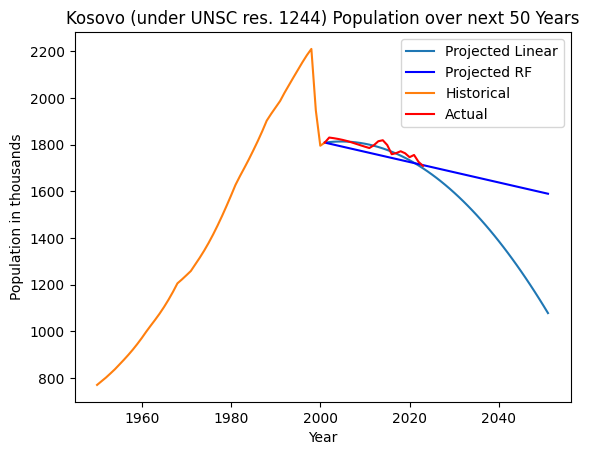

Malta
2732     1950
2969     1951
3206     1952
3443     1953
3680     1954
3917     1955
4228     1956
4465     1957
4702     1958
5013     1959
5250     1960
5561     1961
5798     1962
6109     1963
6346     1964
6583     1965
6820     1966
7057     1967
7442     1968
7679     1969
7990     1970
8227     1971
8538     1972
8775     1973
9012     1974
9323     1975
9560     1976
9797     1977
10108    1978
10345    1979
10582    1980
10819    1981
11056    1982
11293    1983
11678    1984
11915    1985
12152    1986
12463    1987
12700    1988
12937    1989
13174    1990
13485    1991
13722    1992
13959    1993
14196    1994
14433    1995
14670    1996
14981    1997
15218    1998
15455    1999
15840    2000
16077    2001
Name: Year, dtype: int64
Malta Linear RMSE: 30.215058497741683
Malta RF RMSE: 28.279678921351913


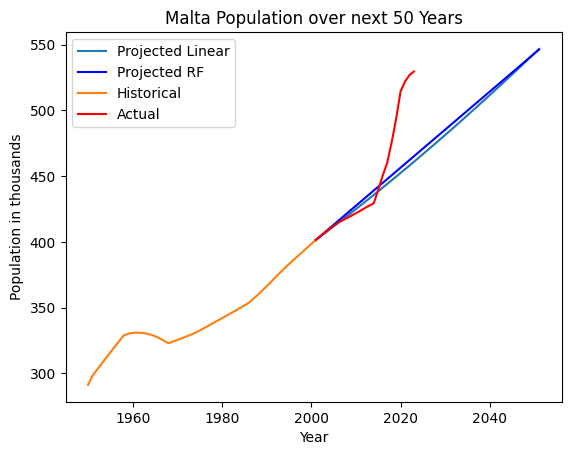

Montenegro
2733     1950
2970     1951
3207     1952
3444     1953
3681     1954
3918     1955
4229     1956
4466     1957
4703     1958
5014     1959
5251     1960
5562     1961
5799     1962
6110     1963
6347     1964
6584     1965
6821     1966
7058     1967
7443     1968
7680     1969
7991     1970
8228     1971
8539     1972
8776     1973
9013     1974
9324     1975
9561     1976
9798     1977
10109    1978
10346    1979
10583    1980
10820    1981
11057    1982
11294    1983
11679    1984
11916    1985
12153    1986
12464    1987
12701    1988
12938    1989
13175    1990
13486    1991
13723    1992
13960    1993
14197    1994
14434    1995
14671    1996
14982    1997
15219    1998
15456    1999
15841    2000
16078    2001
Name: Year, dtype: int64
Montenegro Linear RMSE: 8.829465261411944
Montenegro RF RMSE: 10.371106344940333


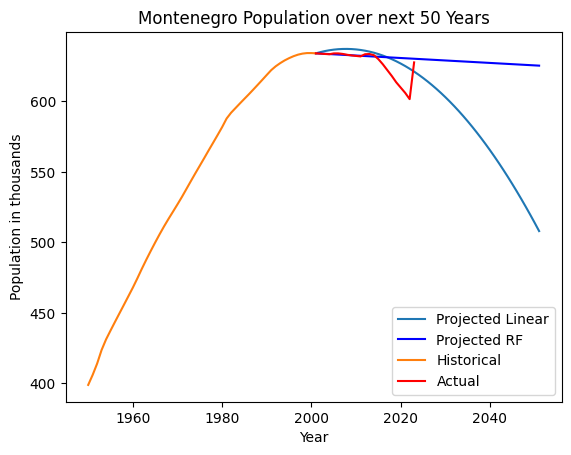

North Macedonia
2734     1950
2971     1951
3208     1952
3445     1953
3682     1954
3919     1955
4230     1956
4467     1957
4704     1958
5015     1959
5252     1960
5563     1961
5800     1962
6111     1963
6348     1964
6585     1965
6822     1966
7059     1967
7444     1968
7681     1969
7992     1970
8229     1971
8540     1972
8777     1973
9014     1974
9325     1975
9562     1976
9799     1977
10110    1978
10347    1979
10584    1980
10821    1981
11058    1982
11295    1983
11680    1984
11917    1985
12154    1986
12465    1987
12702    1988
12939    1989
13176    1990
13487    1991
13724    1992
13961    1993
14198    1994
14435    1995
14672    1996
14983    1997
15220    1998
15457    1999
15842    2000
16079    2001
Name: Year, dtype: int64
North Macedonia Linear RMSE: 116.0550946147687
North Macedonia RF RMSE: 215.4121201252167


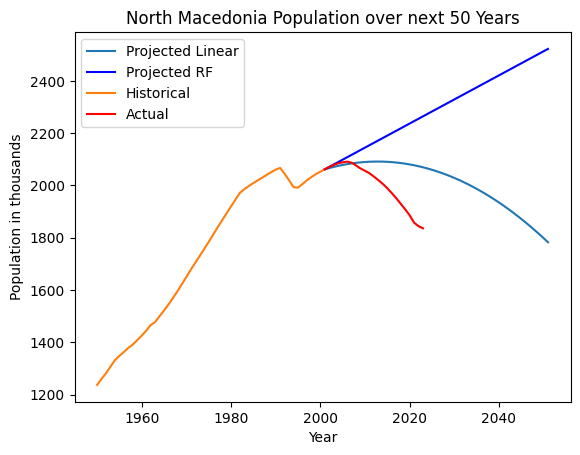

Portugal
2735     1950
2972     1951
3209     1952
3446     1953
3683     1954
3920     1955
4231     1956
4468     1957
4705     1958
5016     1959
5253     1960
5564     1961
5801     1962
6112     1963
6349     1964
6586     1965
6823     1966
7060     1967
7445     1968
7682     1969
7993     1970
8230     1971
8541     1972
8778     1973
9015     1974
9326     1975
9563     1976
9800     1977
10111    1978
10348    1979
10585    1980
10822    1981
11059    1982
11296    1983
11681    1984
11918    1985
12155    1986
12466    1987
12703    1988
12940    1989
13177    1990
13488    1991
13725    1992
13962    1993
14199    1994
14436    1995
14673    1996
14984    1997
15221    1998
15458    1999
15843    2000
16080    2001
Name: Year, dtype: int64
Portugal Linear RMSE: 474.8587448077813
Portugal RF RMSE: 785.737146218117


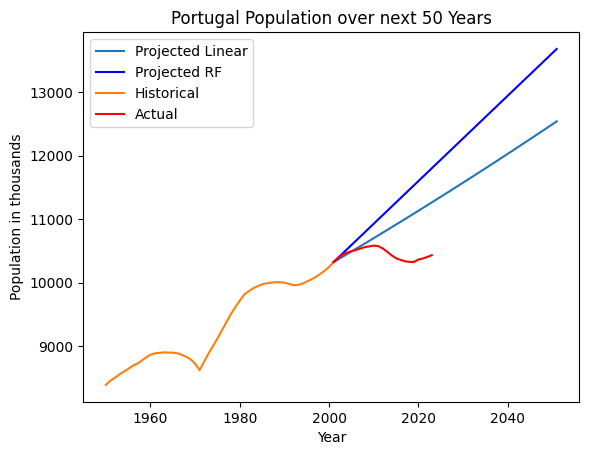

San Marino
2736     1950
2973     1951
3210     1952
3447     1953
3684     1954
3921     1955
4232     1956
4469     1957
4706     1958
5017     1959
5254     1960
5565     1961
5802     1962
6113     1963
6350     1964
6587     1965
6824     1966
7061     1967
7446     1968
7683     1969
7994     1970
8231     1971
8542     1972
8779     1973
9016     1974
9327     1975
9564     1976
9801     1977
10112    1978
10349    1979
10586    1980
10823    1981
11060    1982
11297    1983
11682    1984
11919    1985
12156    1986
12467    1987
12704    1988
12941    1989
13178    1990
13489    1991
13726    1992
13963    1993
14200    1994
14437    1995
14674    1996
14985    1997
15222    1998
15459    1999
15844    2000
16081    2001
Name: Year, dtype: int64
San Marino Linear RMSE: 1.4830027918486672
San Marino RF RMSE: 1.2671101473603166


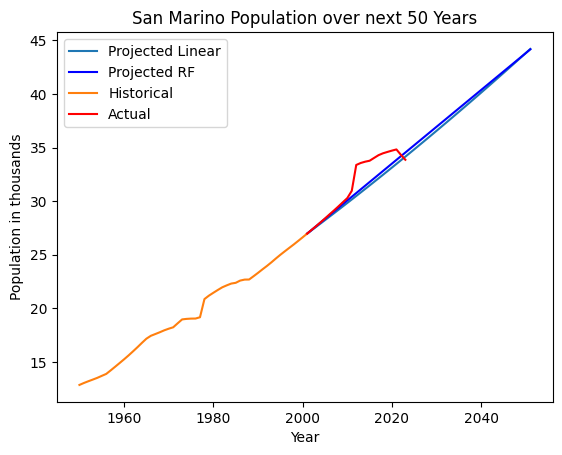

Serbia
2737     1950
2974     1951
3211     1952
3448     1953
3685     1954
3922     1955
4233     1956
4470     1957
4707     1958
5018     1959
5255     1960
5566     1961
5803     1962
6114     1963
6351     1964
6588     1965
6825     1966
7062     1967
7447     1968
7684     1969
7995     1970
8232     1971
8543     1972
8780     1973
9017     1974
9328     1975
9565     1976
9802     1977
10113    1978
10350    1979
10587    1980
10824    1981
11061    1982
11298    1983
11683    1984
11920    1985
12157    1986
12468    1987
12705    1988
12942    1989
13179    1990
13490    1991
13727    1992
13964    1993
14201    1994
14438    1995
14675    1996
14986    1997
15223    1998
15460    1999
15845    2000
16082    2001
Name: Year, dtype: int64
Serbia Linear RMSE: 136.6209631246915
Serbia RF RMSE: 83.00681732116388


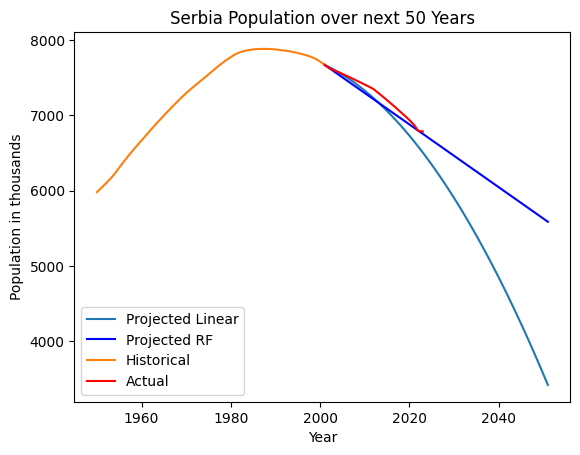

Slovenia
2738     1950
2975     1951
3212     1952
3449     1953
3686     1954
3923     1955
4234     1956
4471     1957
4708     1958
5019     1959
5256     1960
5567     1961
5804     1962
6115     1963
6352     1964
6589     1965
6826     1966
7063     1967
7448     1968
7685     1969
7996     1970
8233     1971
8544     1972
8781     1973
9018     1974
9329     1975
9566     1976
9803     1977
10114    1978
10351    1979
10588    1980
10825    1981
11062    1982
11299    1983
11684    1984
11921    1985
12158    1986
12469    1987
12706    1988
12943    1989
13180    1990
13491    1991
13728    1992
13965    1993
14202    1994
14439    1995
14676    1996
14987    1997
15224    1998
15461    1999
15846    2000
16083    2001
Name: Year, dtype: int64
Slovenia Linear RMSE: 91.54883602762898
Slovenia RF RMSE: 28.21108318062597


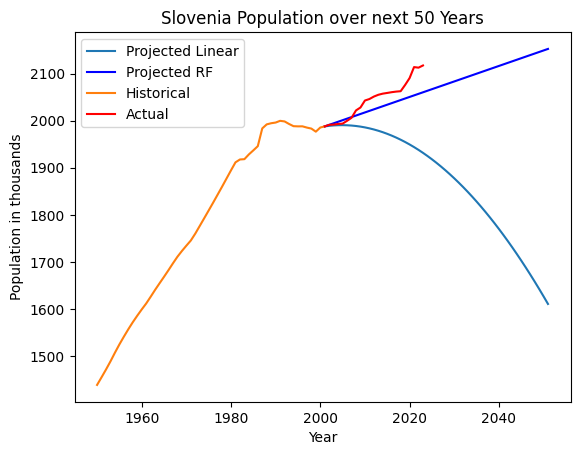

Spain
2739     1950
2976     1951
3213     1952
3450     1953
3687     1954
3924     1955
4235     1956
4472     1957
4709     1958
5020     1959
5257     1960
5568     1961
5805     1962
6116     1963
6353     1964
6590     1965
6827     1966
7064     1967
7449     1968
7686     1969
7997     1970
8234     1971
8545     1972
8782     1973
9019     1974
9330     1975
9567     1976
9804     1977
10115    1978
10352    1979
10589    1980
10826    1981
11063    1982
11300    1983
11685    1984
11922    1985
12159    1986
12470    1987
12707    1988
12944    1989
13181    1990
13492    1991
13729    1992
13966    1993
14203    1994
14440    1995
14677    1996
14988    1997
15225    1998
15462    1999
15847    2000
16084    2001
Name: Year, dtype: int64
Spain Linear RMSE: 2912.0349650504045
Spain RF RMSE: 2398.8455782618194


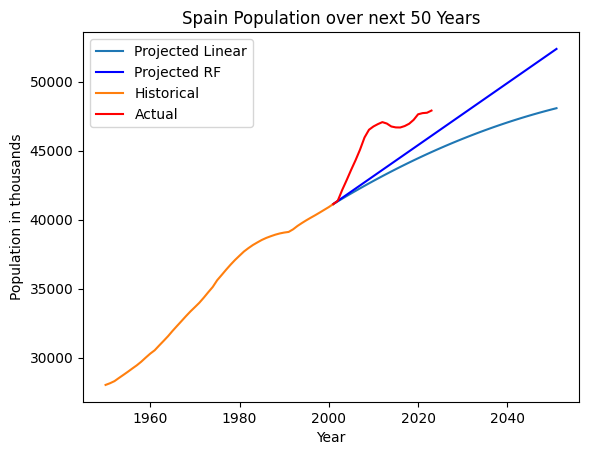

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'data' is a pandas DataFrame
actual = data[data['Year'] > 2000]
s_data = data[data['Year'] <= 2001]

def fit_linear_trend(data, country):
    # Fit a linear model to the annual population changes
    country_data = data[data['Region, subregion, country or area *'] == country]
    years = np.arange(len(country_data)).reshape(-1, 1)
    annual_changes = country_data['Population Change (thousands)']

    model = LinearRegression()
    model.fit(years, annual_changes)
    return model

def project_population_with_trend(data, country, years_to_project):
    # Get the most recent population data for the specified country
    latest_population_data = data[data['Region, subregion, country or area *'] == country]
    current_population = latest_population_data['Total Population, as of 1 January (thousands)'].iloc[-1]

    # Fit a linear trend model to the historical data
    model = fit_linear_trend(data, country)

    # Initialize a list to store the projected populations
    future_populations = [current_population]

    # Calculate the population for each future year
    for year in range(1, years_to_project + 1):
        # Predict the annual increase for the year
        year_index = len(latest_population_data) + year - 1
        annual_increase = model.predict([[year_index]])

        # Calculate the population for the year and add it to the list
        next_year_population = future_populations[-1] + annual_increase[0]
        future_populations.append(next_year_population)

    return future_populations

def fit_random_forest(data, country):
    # Fit a Random Forest model to the annual population changes
    country_data = data[data['Region, subregion, country or area *'] == country]
    years = np.arange(len(country_data)).reshape(-1, 1)
    annual_changes = country_data['Population Change (thousands)']

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(years, annual_changes)
    return model

def project_population_with_random_forest(data, country, years_to_project):
    # Get the most recent population data for the specified country
    latest_population_data = data[data['Region, subregion, country or area *'] == country]
    current_population = latest_population_data['Total Population, as of 1 January (thousands)'].iloc[-1]

    # Fit a Random Forest model to the historical data
    model = fit_random_forest(data, country)

    # Initialize a list to store the projected populations
    future_populations = [current_population]

    # Calculate the population for each future year
    for year in range(1, years_to_project + 1):
        # Predict the annual increase for the year
        year_index = len(latest_population_data) + year - 1
        annual_increase = model.predict([[year_index]])

        # Calculate the population for the year and add it to the list
        next_year_population = future_populations[-1] + annual_increase[0]
        future_populations.append(next_year_population)

    return future_populations

projection_length = 50
countries = s_data['Region, subregion, country or area *'].unique()
for country in countries:
    projected_populations_linear = project_population_with_trend(s_data, country, projection_length)
    projected_populations_rf = project_population_with_random_forest(s_data, country, projection_length)
    
    plt.plot(range(2001, 2002 + projection_length), projected_populations_linear, label='Projected Linear')
    plt.plot(range(2001, 2002 + projection_length), projected_populations_rf, label='Projected RF', color="blue")
    plt.title(f"{country} Population over next {projection_length} Years")
    plt.ylabel("Population in thousands")
    plt.xlabel("Year")
    
    country_data = s_data[s_data['Region, subregion, country or area *'] == country]
    years = country_data["Year"]
    population = country_data["Total Population, as of 1 January (thousands)"]
    plt.plot(years, population, label='Historical')
    
    country_actual = actual[actual['Region, subregion, country or area *'] == country]
    plt.plot(country_actual['Year'], country_actual["Total Population, as of 1 January (thousands)"], color='red', label='Actual')
    
    # Calculate RMSE for the years where actual data is available
    actual_years = range(2000, 2023)
    actual_populations = country_actual["Total Population, as of 1 January (thousands)"].values
    predicted_populations_linear = projected_populations_linear[:len(actual_years)]
    predicted_populations_rf = projected_populations_rf[:len(actual_years)]
    
    rmse_linear = np.sqrt(mean_squared_error(actual_populations, predicted_populations_linear))
    rmse_rf = np.sqrt(mean_squared_error(actual_populations, predicted_populations_rf))
    print(f"{country} Linear RMSE: {rmse_linear}")
    print(f"{country} RF RMSE: {rmse_rf}")
    
    plt.legend()
    plt.show()
    plt.close()


# regions = ["Latin America and the Caribbean", "Europe and Northern America", "Oceania (excluding Australia and New Zealand)","Sub-Saharan Africa", "Northern Africa and Western Asia", "Central and Southern Asia", "Eastern and South-Eastern Asia"]
# for region in regions:
#     projected_populations = project_population_with_trend(region_data, region, projection_length)
#     plt.plot(range(2021, 2022+ projection_length), projected_populations)
#     plt.title(f"{region} Population over next {projection_length} Years")
#     plt.ylabel("Population in thousands")
#     plt.xlabel("Year")
#     r_data = region_data[region_data['Region, subregion, country or area *'] == region]
#     years = r_data["Year"]
#     population = r_data["Total Population, as of 1 July (thousands)"]
#     plt.plot(years, population)
#     plt.ticklabel_format(style='plain')
#     plt.figure(dpi=250)
#     plt.show()

# projected_populations = project_population_with_trend(world_data, "WORLD", projection_length)
# plt.plot(range(2021, 2022+ projection_length), projected_populations)
# plt.title(f"World Population over next {projection_length} Years")
# plt.ylabel("Population in thousands")
# plt.xlabel("Year")
# plt.ticklabel_format(style='plain')
# years = world_data["Year"]
# population = world_data["Total Population, as of 1 July (thousands)"]
# plt.plot(years, population)
# plt.show()